In [1]:
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
pl.rcParams['figure.figsize'] = (20,6)
%matplotlib inline
import warnings
import time
warnings.filterwarnings("ignore", category = DeprecationWarning)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from explore import *
from preprocess import *
from classification import *

# Read Data:
For this assignment, assume input is CSV and write a function that can read a csv into python

In [3]:
#Had to paste it here. my system very weidly was not processing this function
def split_data(data, dependent_var, test_size):
    '''
    Split the data set into testing and training data

    data: data to be split_data
    dependent_var: variable that is to be predicted
    test_size: the ratio in which the test and training should be split_data

    returns the split data
    
    '''
        
    X = data.drop([dependent_var], 1)
    y = data[dependent_var]
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size= test_size)
        
    return X_train, X_test, y_train, y_test

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

def read_data(file_name, index_col = None):
    '''Read the data from the file location
        file_name = name of the file to be opened
        index_col = name of the col that we want to make our index
        returns pandas dataframe'''
    data = pd.read_csv(file_name, index_col = index_col)
    
    return data 


def split_data(data, dependent_var, test_size):
    '''
    Split the data set into testing and training data

    data: data to be split_data
    dependent_var: variable that is to be predicted
    test_size: the ratio in which the test and training should be split_data

    returns the split data
    
    '''
        
    X = data.drop([dependent_var], 1)
    y = data[dependent_var]
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size= test_size)
        
    return X_train, X_test, y_train, y_test

def plot_hist(df,df_cols):
    '''
    draw histograms for all the data

    df: our entire data
    df_cols: list of columns for which we need to graph the histograms

    draws the histograms
    '''
    for each in df_cols:
        print("\n")
        #df=data[each].value_counts()
        #meanval = int(data[[each]].mean())
        data[each].plot.hist(align = 'mid')
        print("Graph of ", each)
        plt.xlabel(each)
        #plt.ylabel("Num_people")
        plt.show()
        
def plot_bar(df,df_cols):
    '''
    plot bar chart for all the data

    df: our entire data
    df_cols: list of columns for which we need to graph the histograms

    plot bar charts
    
    '''
    for each in df_cols:
        print("\n")
        df=data[each].value_counts()
        df.plot.bar()
        print("Graph of ", each)
        plt.xlabel(each)
        #plt.ylabel("No_people")
        plt.show()

def plot_corr(df,size=10):
    '''
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr, vmin=-1, vmax=1, cmap = plt.cm.Greens)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);
    ticks = np.arange(0,9,1)
    plt.legend(prop={'size':5})
    plt.show()    
        
def basic_exploration(data, dependent_var):
    '''
    describe the data
    find average details depending on dependent_var
    
    dataset: data to be split_data
    dependent_var: variable that is to be predicted
    '''
    
    print(data.describe())
    
    print(data.groupby(dependent_var).mean().transpose())
    

In [4]:
data = read_data("credit-data.csv", "PersonID")
#data = X_train.join(y_train)
data.head()
dependent_var = 'SeriousDlqin2yrs'
X_train, X_test, y_train, y_test = split_data(data, dependent_var , 0.2)

# Explore Data: 
You can use the code you wrote for assignment 1 here to generate distributions and data summaries.

As we can see People  experienced 90 days past due delinquency or worse:
    - When they were younger (mean age = 45) vs older (mean age = 55)
    - Had lower debt ratio, income.

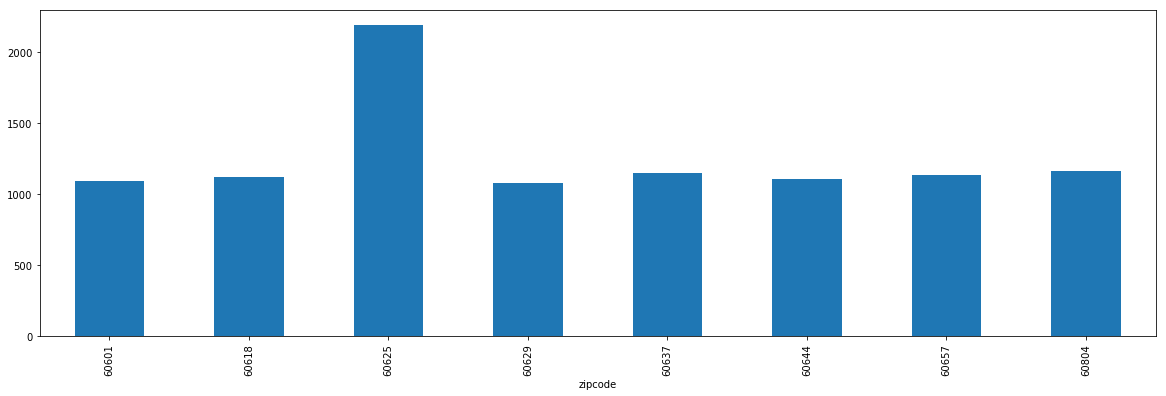

In [5]:
#Number of serious delinquents based on zipcodes
count_data = data[data["SeriousDlqin2yrs"] == 1].groupby(["zipcode"],axis = 0).count()["SeriousDlqin2yrs"]
count_data.plot(kind = "bar")

As we can see the number of delinquents is pretty much same in all areas except for 60625 (Lincon Park) where the number of people in their late 20s to early 40s is extremely large.



Graph of  NumberOfTime30-59DaysPastDueNotWorse


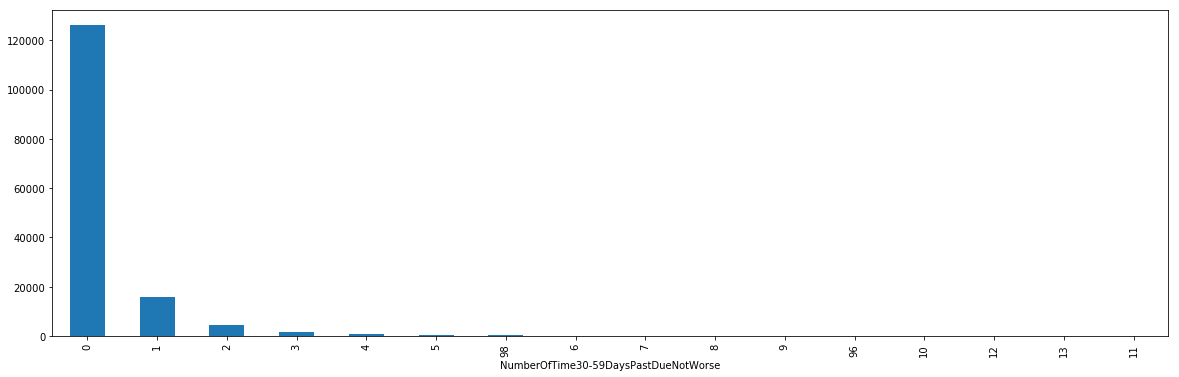



Graph of  NumberOfTimes90DaysLate


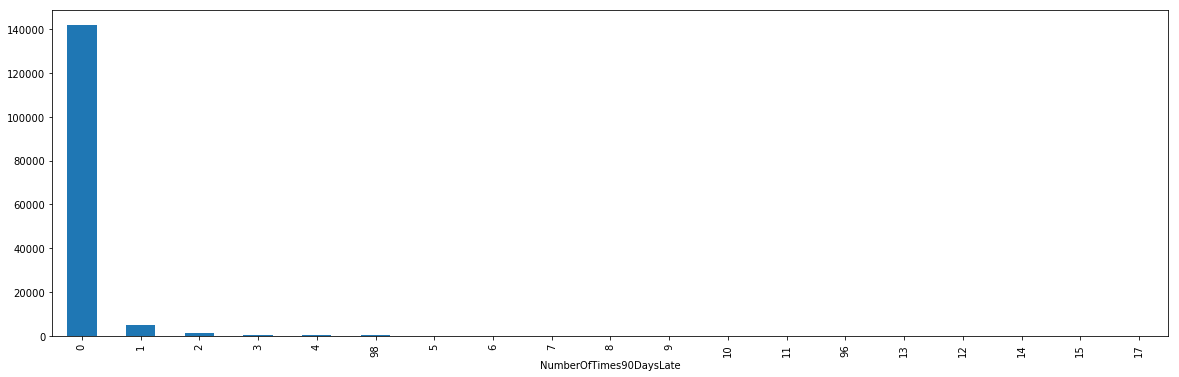



Graph of  NumberRealEstateLoansOrLines


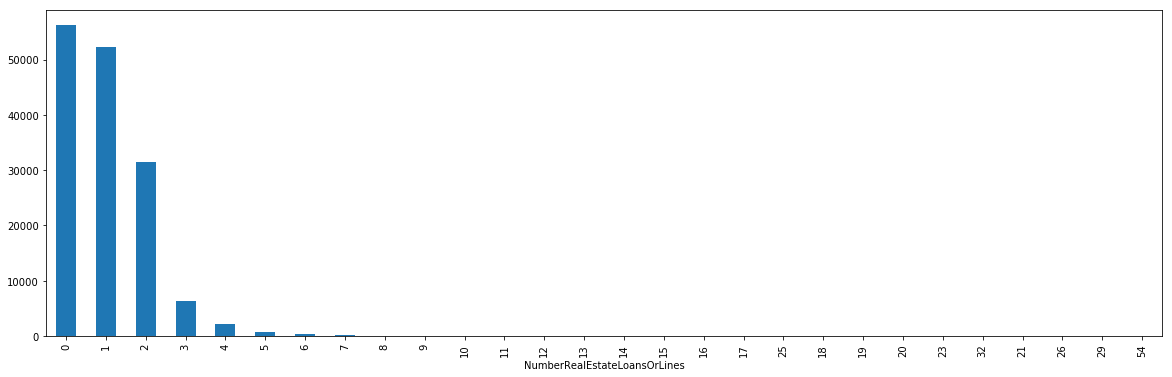



Graph of  NumberOfTime60-89DaysPastDueNotWorse


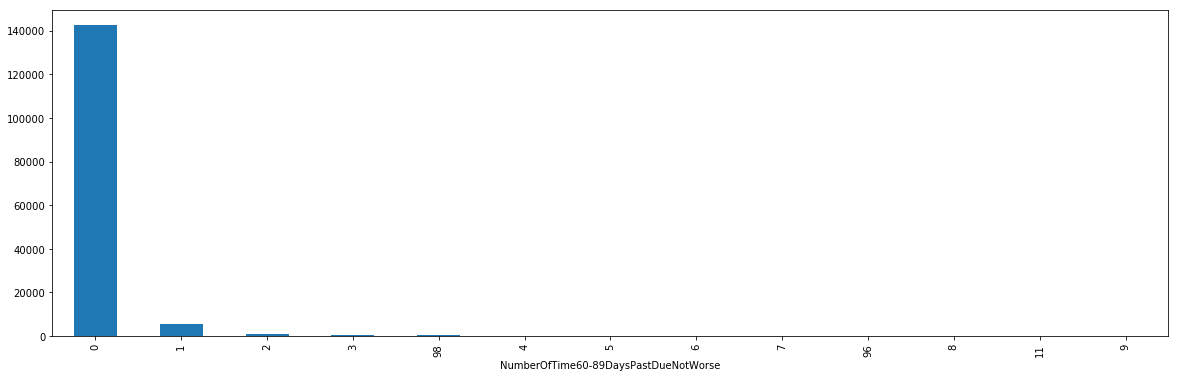



Graph of  NumberOfDependents


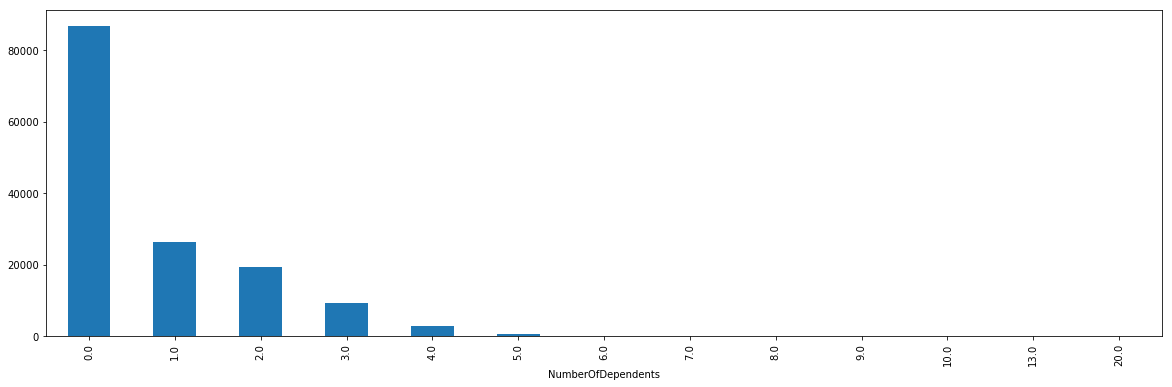

In [6]:
#plot bar chart
bar_chart_cols = ["NumberOfTime30-59DaysPastDueNotWorse", 
"NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse",
                  "NumberOfDependents"]
plot_bar(data, bar_chart_cols)


As we can see from the graphs:
- NumberOfTime30-59DaysPastDueNotWorse: Almost noone is late between 30-60 days
- NumberOfOpenCreditLinesAndLoans:  doesnt give clean data. so we check histogram for it.
- NumberOfTimes90DaysLate: Almost noone has been more than 90 days late
- As we can see from NumberOfTime60-89DaysPastDueNotWorse, most people have not been 60-89 days past due but no worse in the last 2 years
- NumberOfDependents: Most of the people do not have any dependents




Graph of  age


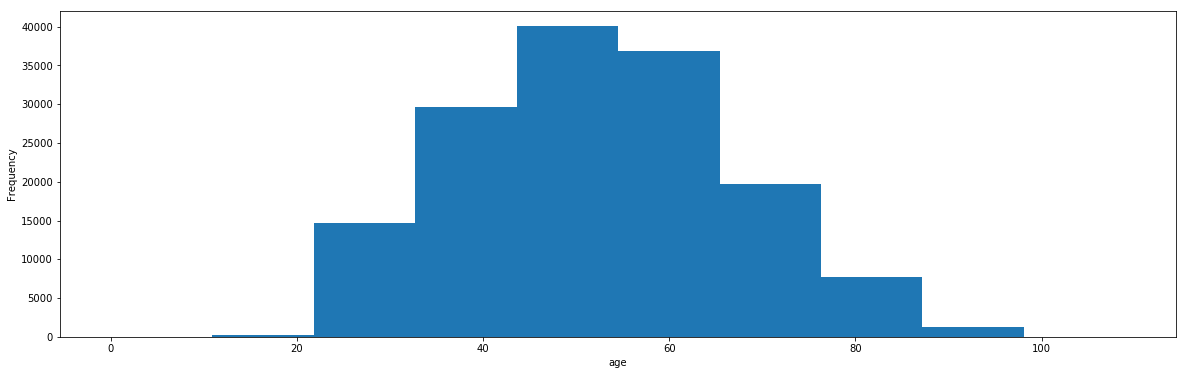

In [7]:
#Plot histograms
hist_cols = [ "age"]
plot_hist(data, hist_cols)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


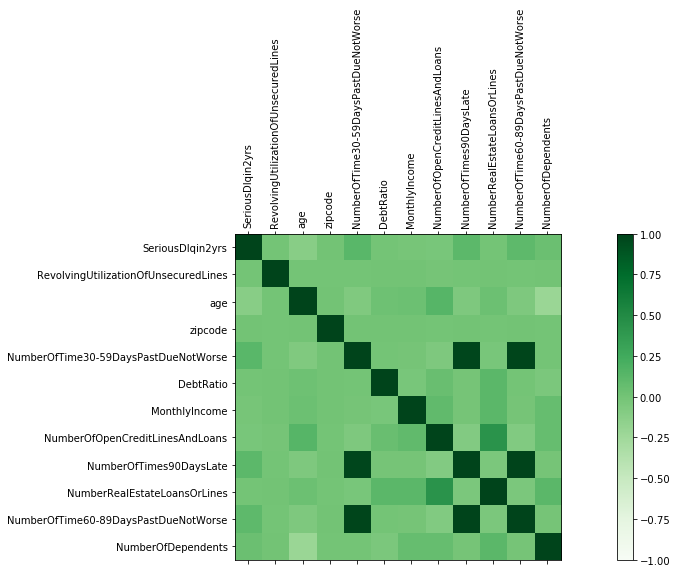

In [8]:
#plot correlation between different data
plot_corr(data)


Moderate positive correlation between our target variable SeriousDlqin2yrs and:
- NumberOfTime30-59DaysPastDueNotWorse
- NumberOfTime60-89DaysPastDueNotWorse
- NumberOfTime90DaysLate

Small positive correlation between our target variable SeriousDlqin2yrs and:
- NumberOfTime30-59DaysPastDueNotWorse
- NumberOfTime60-89DaysPastDueNotWorse
- NumberOfDependents

Small negative correlation between our target variable SeriousDlqin2yrs and:
- age

# Pre-Process Data: 
For this assignment, you can limit this to filling in missing values for the variables that have missing values. You can use any simple method to do it (use mean to fill in missing values).

In [9]:
#Gives the number of NaNs in our training set
print_null_freq(X_train)

value                                  False  True 
variable                                           
DebtRatio                             120000      0
MonthlyIncome                          96144  23856
NumberOfDependents                    116818   3182
NumberOfOpenCreditLinesAndLoans       120000      0
NumberOfTime30-59DaysPastDueNotWorse  120000      0
NumberOfTime60-89DaysPastDueNotWorse  120000      0
NumberOfTimes90DaysLate               120000      0
NumberRealEstateLoansOrLines          120000      0
RevolvingUtilizationOfUnsecuredLines  120000      0
age                                   120000      0
zipcode                               120000      0

In [10]:
#Imputing for the training set.
X_train["MonthlyIncome"] = fill_missing(X_train,"MonthlyIncome", 'median')
X_train["NumberOfDependents"] = fill_missing(X_train,"NumberOfDependents", 0)

#Binning the data for training set
dumm_zip = pd.get_dummies(X_train["zipcode"])
dumm_age = get_discrete_var(X_train["age"],"dummy_age",10)
X_train = pd.concat([X_train,dumm_zip,dumm_age], axis = 1)

In [11]:
#Imputing for the test set.
X_test["MonthlyIncome"] = fill_missing(X_test,"MonthlyIncome", 'median')
X_test["NumberOfDependents"] = fill_missing(X_test,"NumberOfDependents", 0)

#Binning the data for test set
dumm_zip = pd.get_dummies(X_test["zipcode"])
dumm_age = get_discrete_var(X_test["age"],"dummy_age",10)
X_test = pd.concat([X_test,dumm_zip,dumm_age], axis = 1)

RF


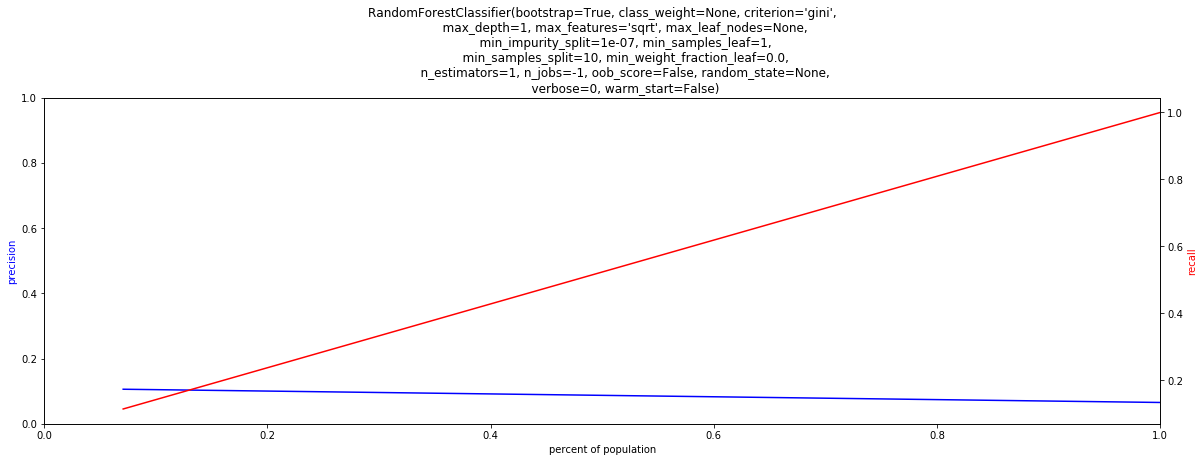

DT


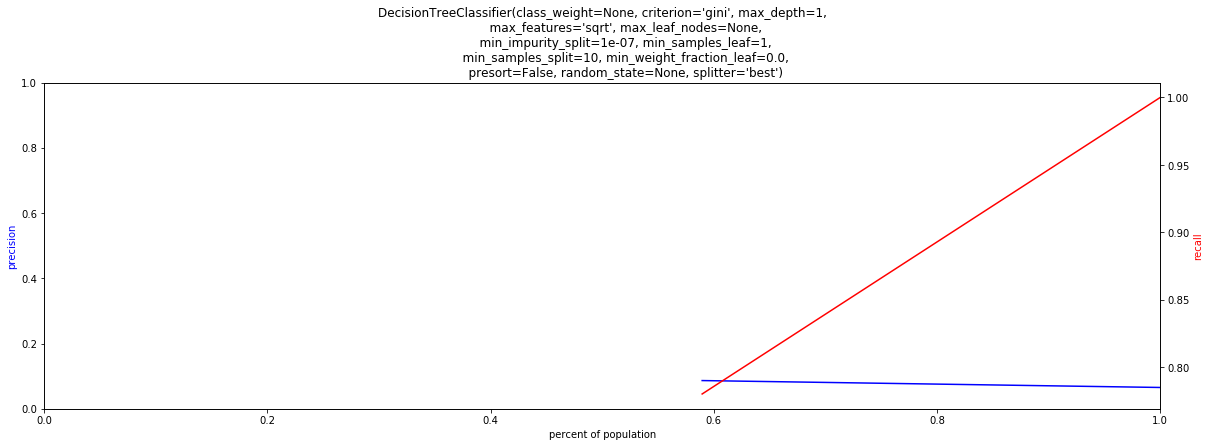

KNN


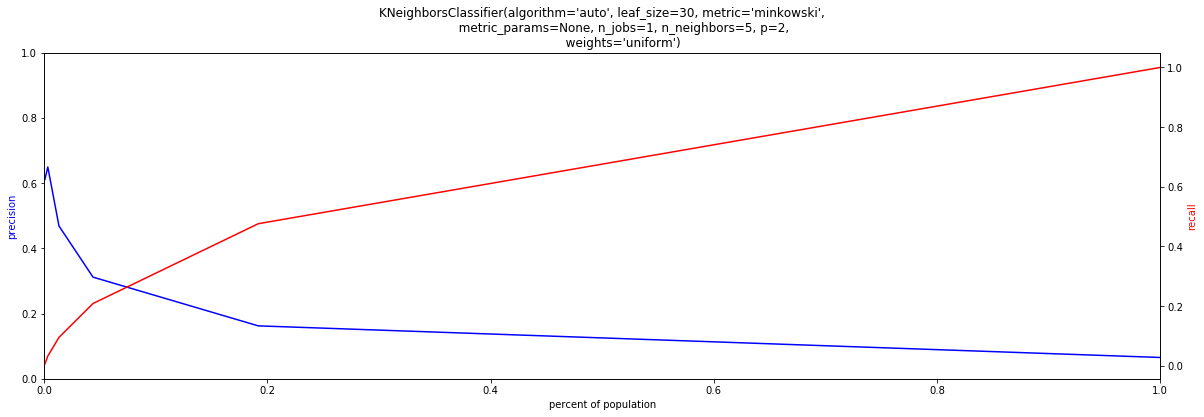

ET


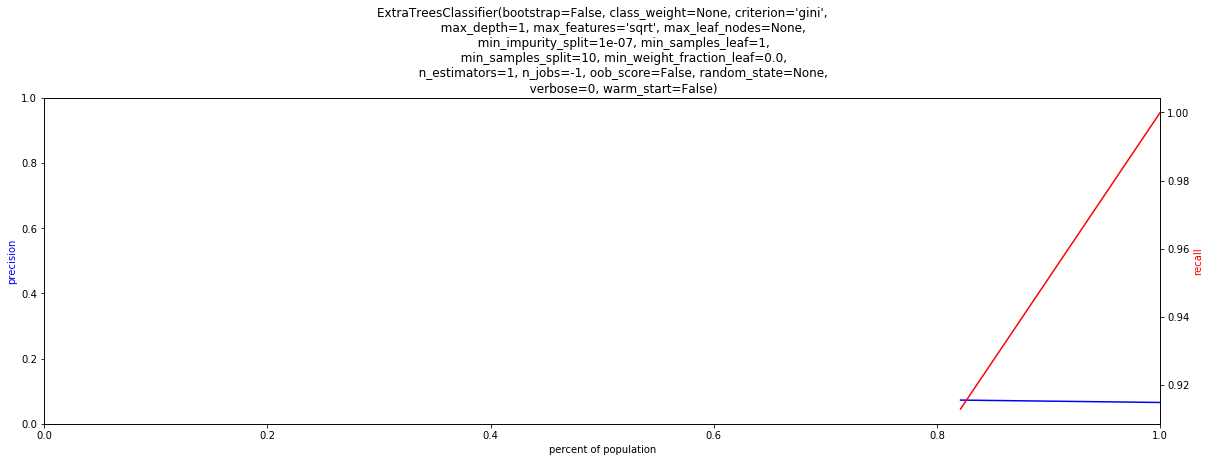

AB


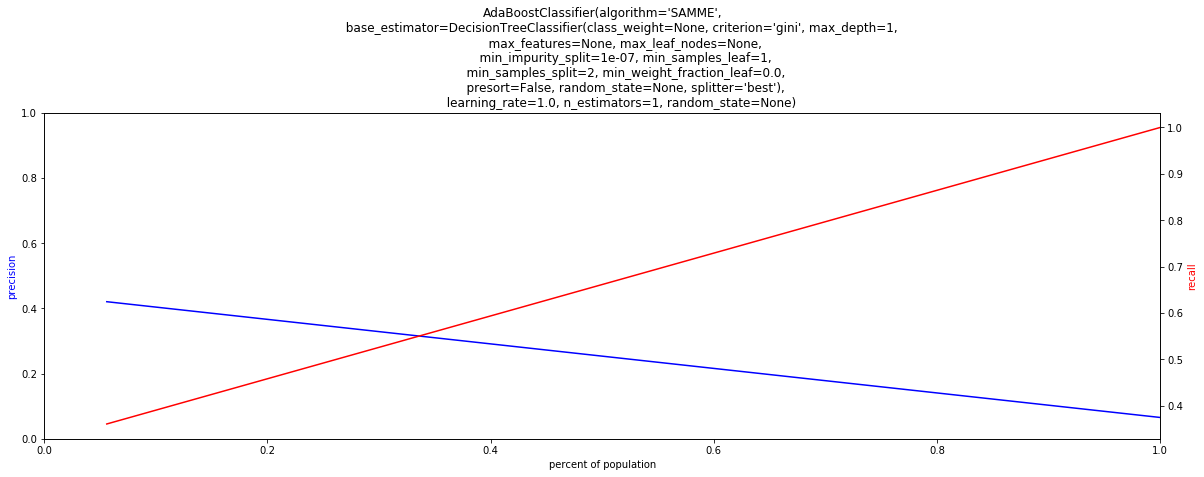

GB


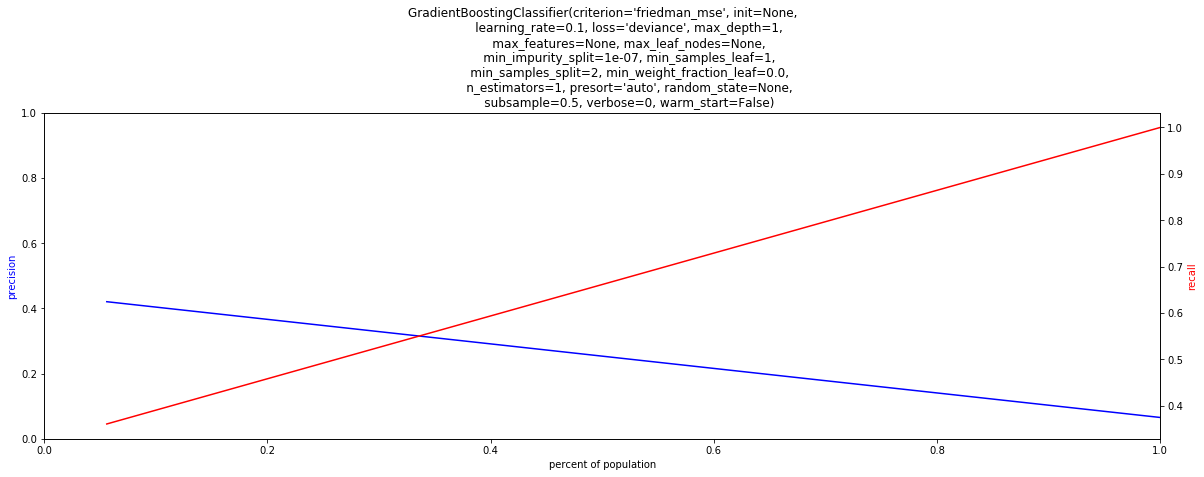

LR


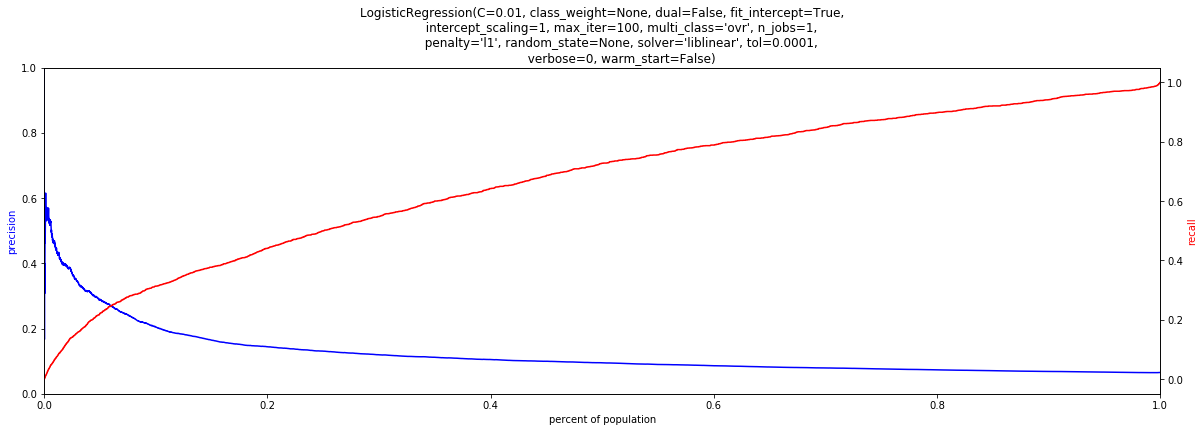

NB


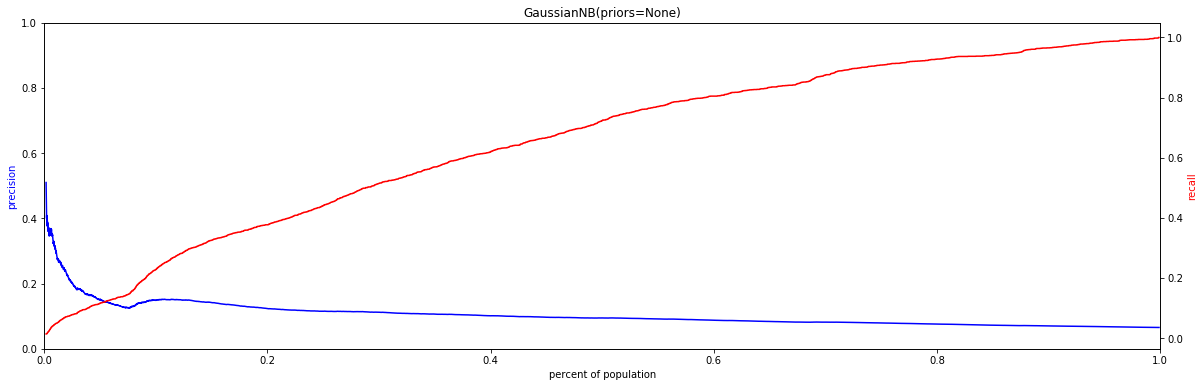

Total time taken to run the testing models without scaling:  44.909159660339355
Best_classifier as per AUC:              Model                                         Classifier  \
0              RF  (DecisionTreeClassifier(class_weight=None, cri...   
1              DT  DecisionTreeClassifier(class_weight=None, crit...   
2             KNN  KNeighborsClassifier(algorithm='auto', leaf_si...   
3              ET  (ExtraTreeClassifier(class_weight=None, criter...   
4              AB  (DecisionTreeClassifier(class_weight=None, cri...   
5              GB  ([DecisionTreeRegressor(criterion='friedman_ms...   
6              LR  LogisticRegression(C=0.01, class_weight=None, ...   
7              NB                            GaussianNB(priors=None)   
8  BASE_ZERO_CASE                                     BASE_ZERO_CASE   

                                          Parameters   AUC-ROC  f1_score_5  \
0  {'max_depth': 1, 'max_features': 'sqrt', 'min_...  0.523493    0.129983   
1  {'criterion

In [12]:
#Ran for testing set, with scaling them
start_time = time.time()
grid_size = 'test'
clfs, grid = define_clfs_params(grid_size)
models_to_run=['RF','DT','KNN', 'ET', 'AB', 'GB', 'LR', 'NB']
result_df  = clf_loop(models_to_run, clfs, grid, X_train, X_test, y_train, y_test)
result_df.to_csv('results_test_notscaled.csv', index=False)
end_time = time.time()
total_time = end_time - start_time
print("Total time taken to run the testing models without scaling: ", total_time)

print("Best_classifier as per AUC: ", find_best_classifier_by_model(result_df, "AUC-ROC"))
print("Best_classifier as per Accuracy: ", find_best_classifier_by_model(result_df, "Accuracy"))

# Build Classifier: 
For this assignment, select any classifier you feel comfortable with (Logistic Regression for example)

In [13]:
scalar = preprocessing.StandardScaler()
continous_var = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
X_train[continous_var] = scalar.fit_transform(X_train[continous_var])


In [14]:
#Since scalar object was fitted on X_train, X_test will be scaled (transformed) on the same scale
X_test[continous_var] = scalar.transform(X_test[continous_var])


In [15]:
'''temp2 = X_test.columns.values.tolist()
temp1 = X_train.columns.values.tolist()
[item for item in temp1 if item not in temp2]'''

'temp2 = X_test.columns.values.tolist()\ntemp1 = X_train.columns.values.tolist()\n[item for item in temp1 if item not in temp2]'

# Evaluate Classifier: 
you can use any metric you choose for this assignment (accuracy is the easiest one). Feel free to evaluate it on the same data you built the model on (this is not a good idea in general but for this assignment, it is fine). We haven't covered models and evaluation yet, so don't worry about creating validation sets or cross-validation. 



RF


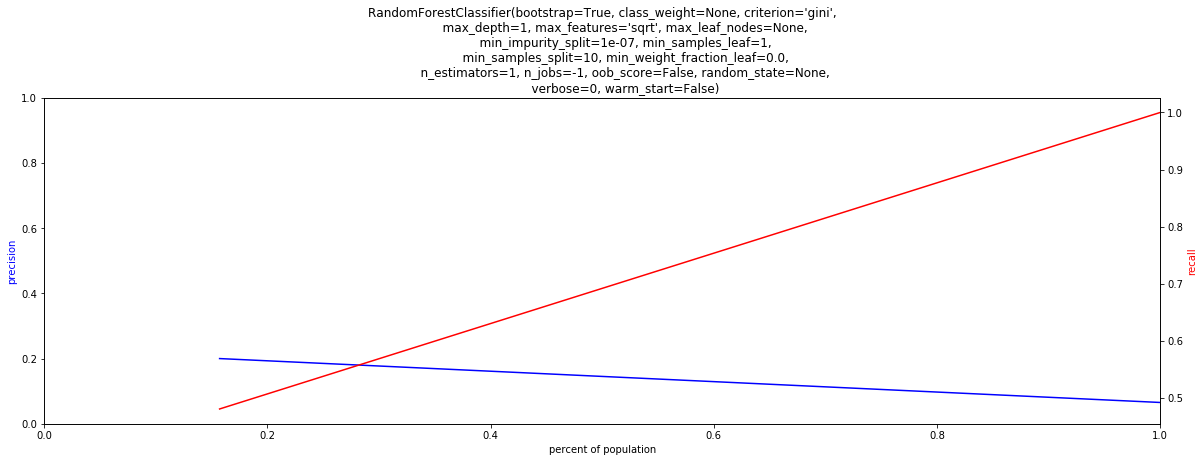

DT


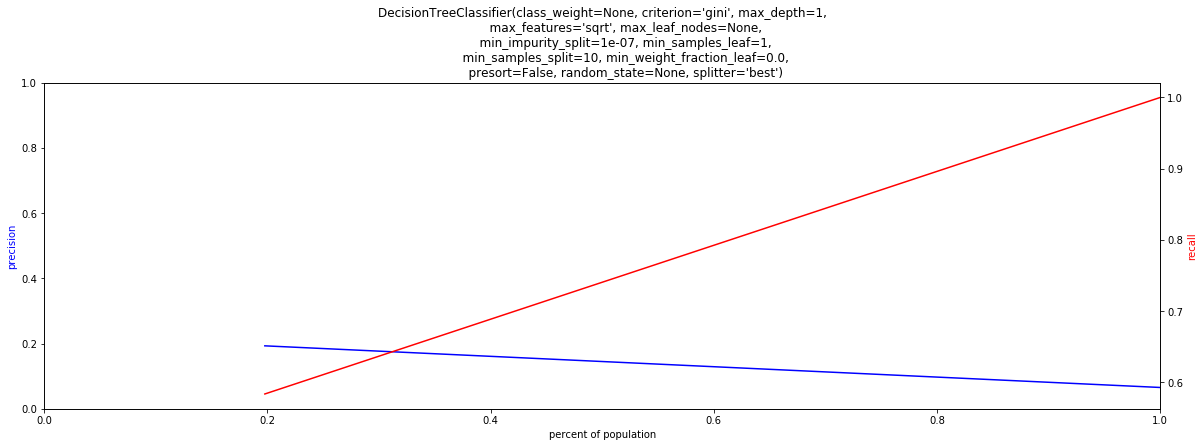

KNN


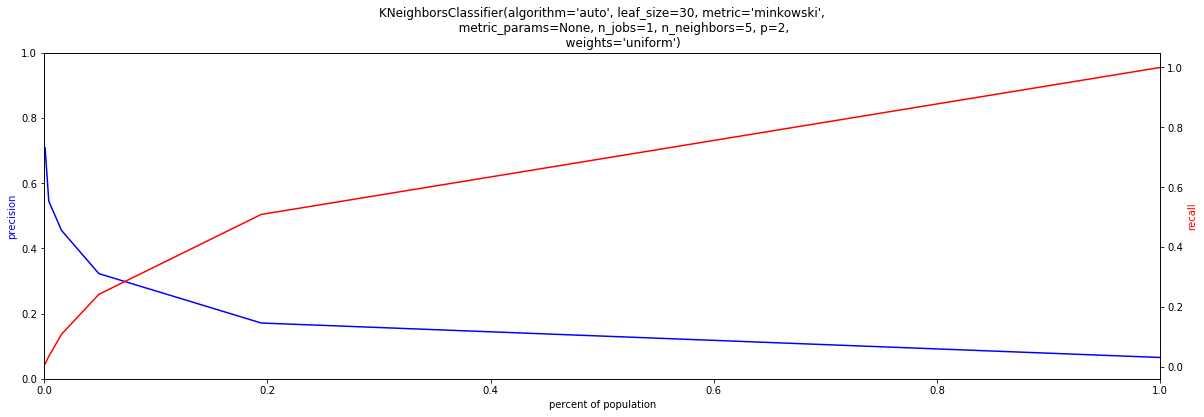

ET


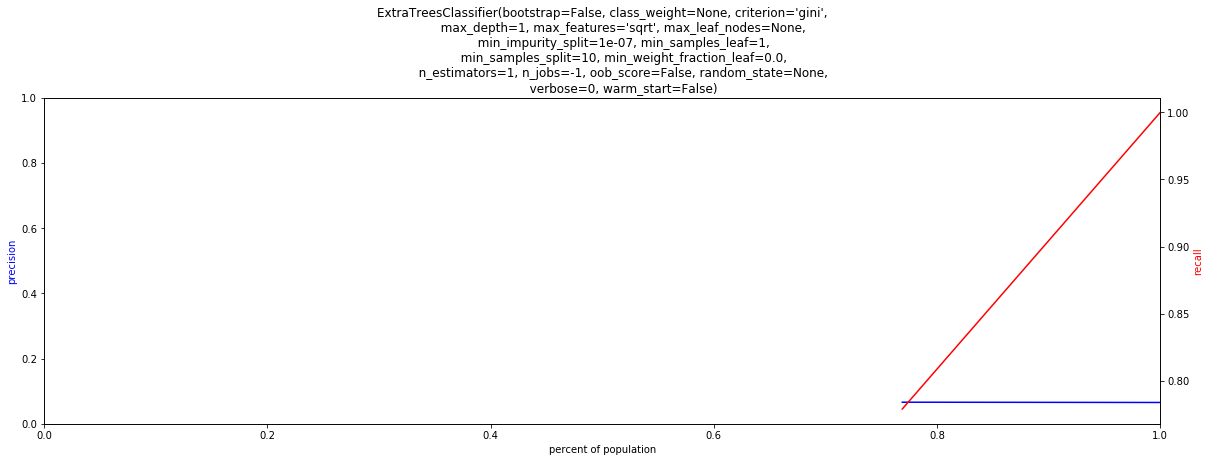

AB


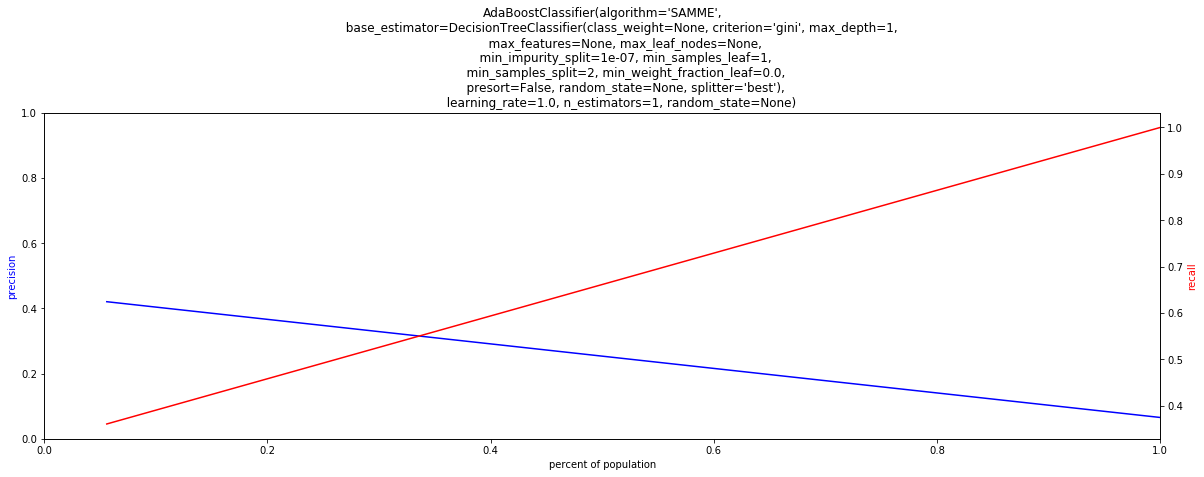

GB


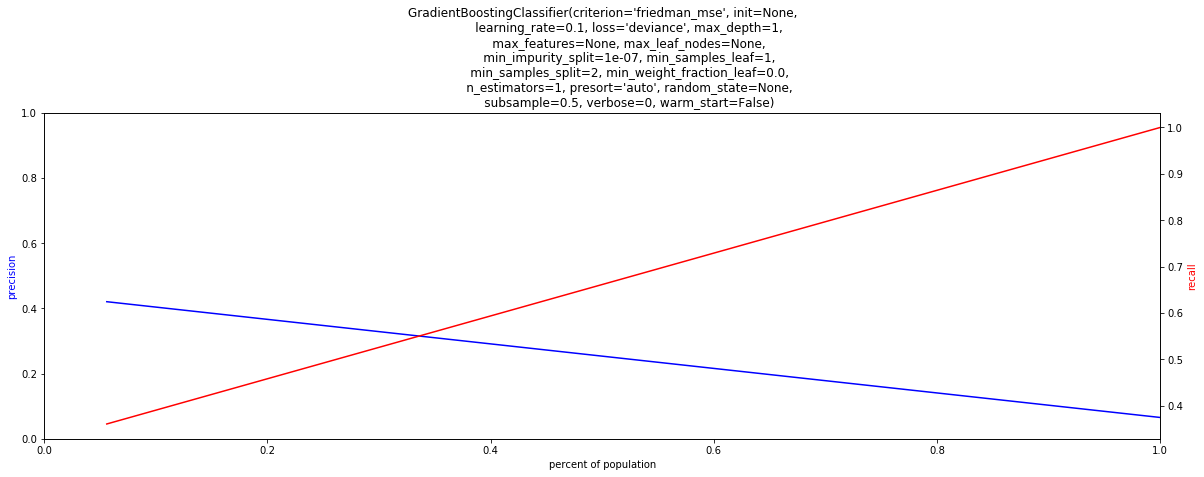

LR


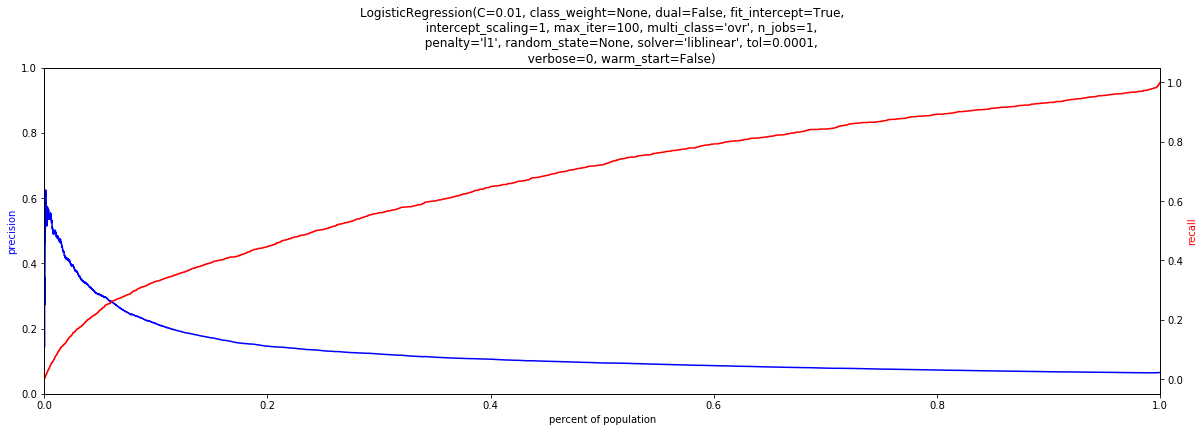

NB


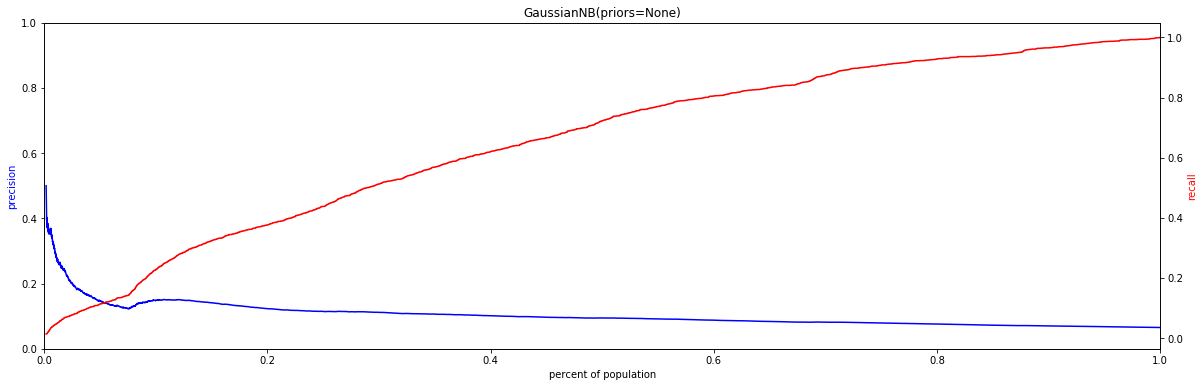

Total time taken to run the testing models:  81.3792781829834
Best_classifier as per AUC:              Model                                         Classifier  \
0              RF  (DecisionTreeClassifier(class_weight=None, cri...   
1              DT  DecisionTreeClassifier(class_weight=None, crit...   
2             KNN  KNeighborsClassifier(algorithm='auto', leaf_si...   
3              ET  (ExtraTreeClassifier(class_weight=None, criter...   
4              AB  (DecisionTreeClassifier(class_weight=None, cri...   
5              GB  ([DecisionTreeRegressor(criterion='friedman_ms...   
6              LR  LogisticRegression(C=0.01, class_weight=None, ...   
7              NB                            GaussianNB(priors=None)   
8  BASE_ZERO_CASE                                     BASE_ZERO_CASE   

                                          Parameters   AUC-ROC  f1_score_5  \
0  {'max_depth': 1, 'max_features': 'sqrt', 'min_...  0.673050    0.544772   
1  {'criterion': 'gini', 'max_de

In [16]:
#Ran for testing set, with scaling
start_time = time.time()
grid_size = 'test'
clfs, grid = define_clfs_params(grid_size)
models_to_run=['RF','DT','KNN', 'ET', 'AB', 'GB', 'LR', 'NB']
result_df  = clf_loop(models_to_run, clfs, grid, X_train, X_test, y_train, y_test )
result_df.to_csv('results_test_scaled.csv', index=False)
end_time = time.time()
total_time = end_time - start_time
print("Total time taken to run the testing models: ", total_time)

print("Best_classifier as per AUC: ", find_best_classifier_by_model(result_df, "AUC-ROC"))
print("Best_classifier as per Accuracy: ", find_best_classifier_by_model(result_df, "Accuracy"))

In [17]:
'''#Ran for small random sample
start_time = time.time()
grid_size = 'small'
clfs, grid = define_clfs_params(grid_size)
models_to_run=['RF','DT','KNN', 'ET', 'AB', 'GB', 'LR', 'NB']
thresholds = np.arange(0.1, 1.05, 0.05)
k_values = [1,10,50,500,'All']
result_df  = clf_loop(models_to_run, clfs, grid, X_train, y_train, X_test, y_test, k_values, thresholds, True )
end_time = time.time()
result_df.to_csv('results_small_grid.csv', index=False)
total_time = end_time - start_time
print("Total time taken to run the small models for random sample: ", total_time)'''

'#Ran for small random sample\nstart_time = time.time()\ngrid_size = \'small\'\nclfs, grid = define_clfs_params(grid_size)\nmodels_to_run=[\'RF\',\'DT\',\'KNN\', \'ET\', \'AB\', \'GB\', \'LR\', \'NB\']\nthresholds = np.arange(0.1, 1.05, 0.05)\nk_values = [1,10,50,500,\'All\']\nresult_df  = clf_loop(models_to_run, clfs, grid, X_train, y_train, X_test, y_test, k_values, thresholds, True )\nend_time = time.time()\nresult_df.to_csv(\'results_small_grid.csv\', index=False)\ntotal_time = end_time - start_time\nprint("Total time taken to run the small models for random sample: ", total_time)'

In [18]:
#Ran for small undersample
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
X_undersampled, y_undersampled, idx_resampled = rus.fit_sample(X_train, y_train)
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled= cross_validation.train_test_split(X_undersampled,y_undersampled, test_size = 0.2)

RF


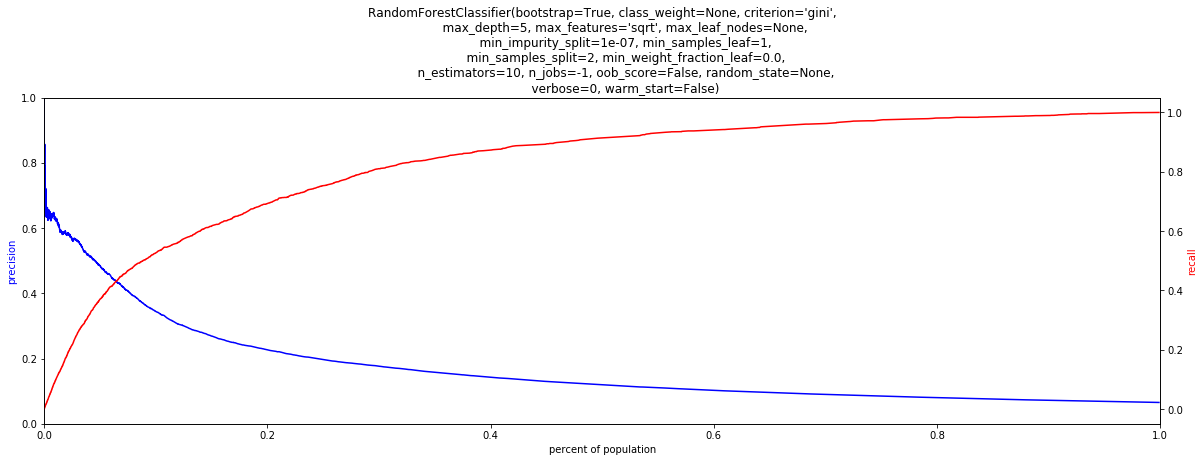

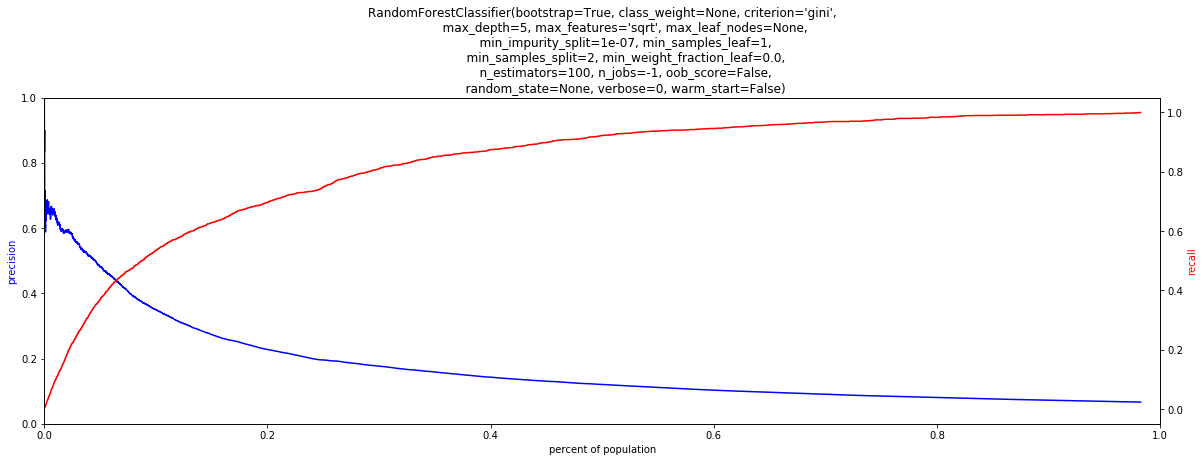

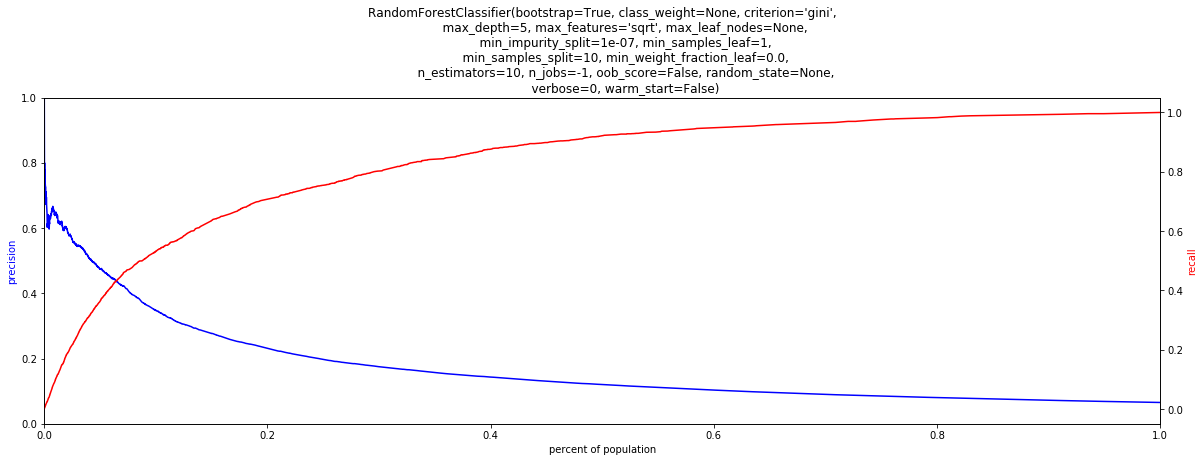

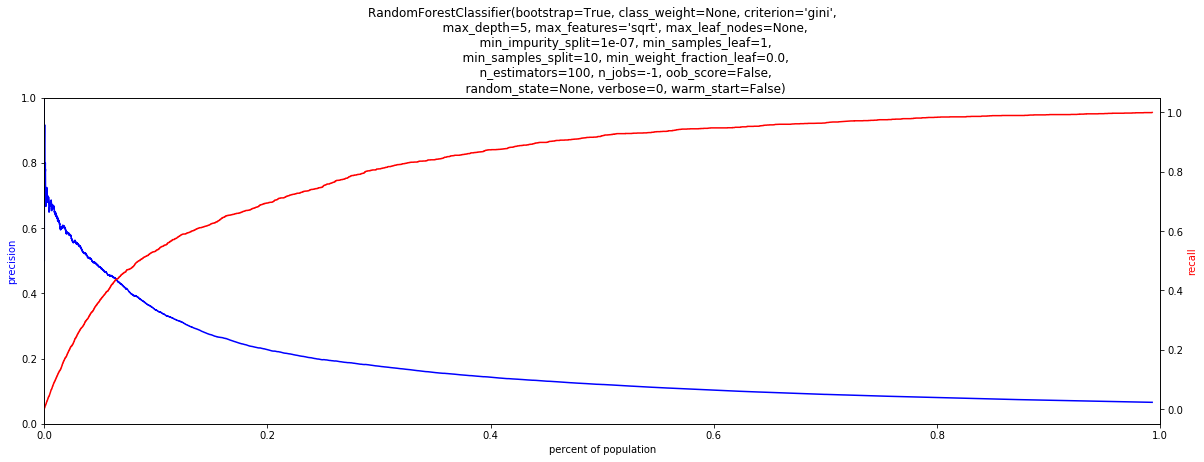

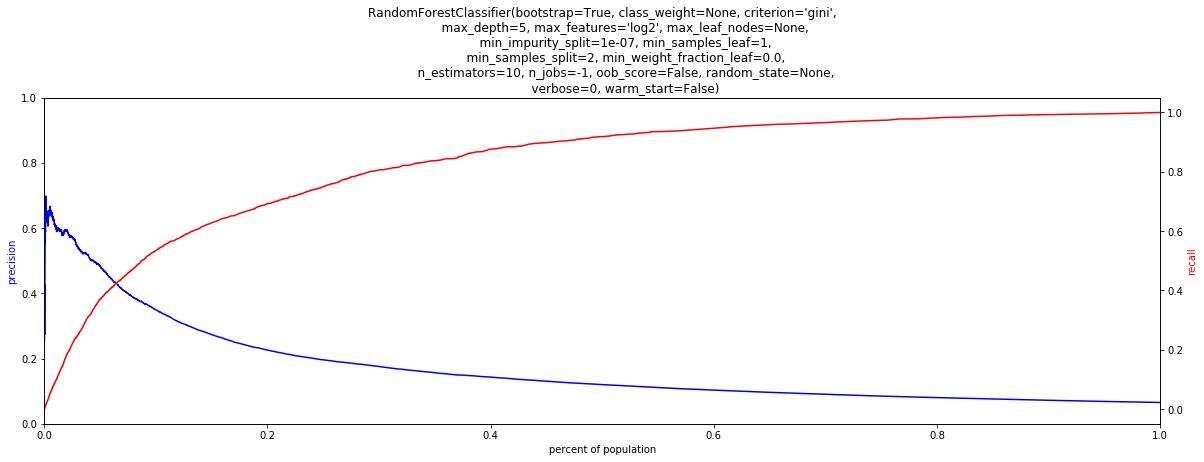

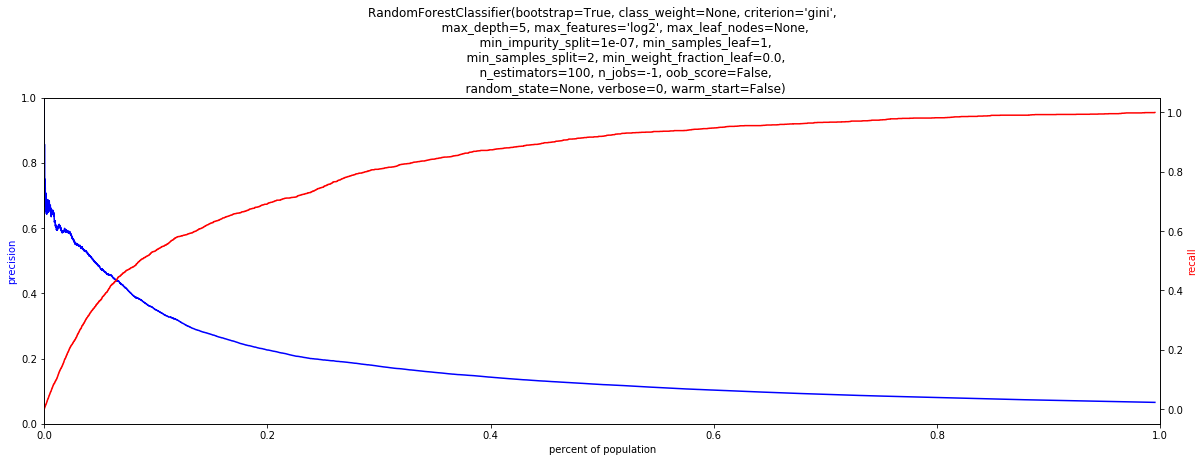

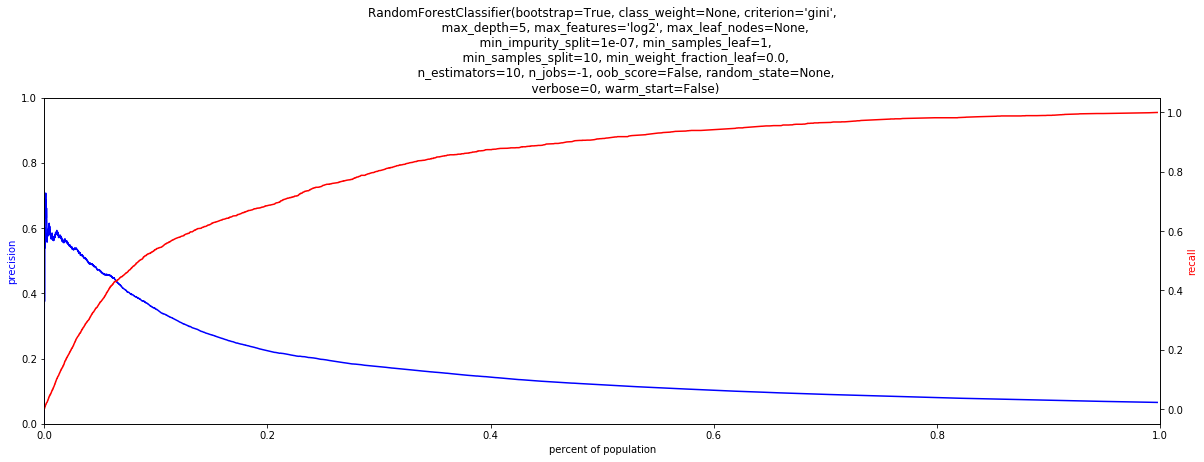

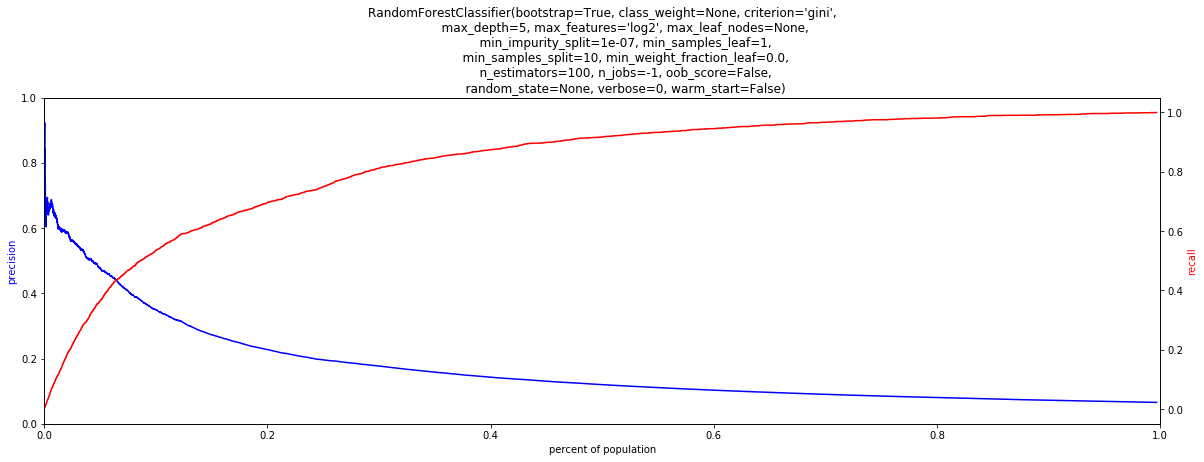

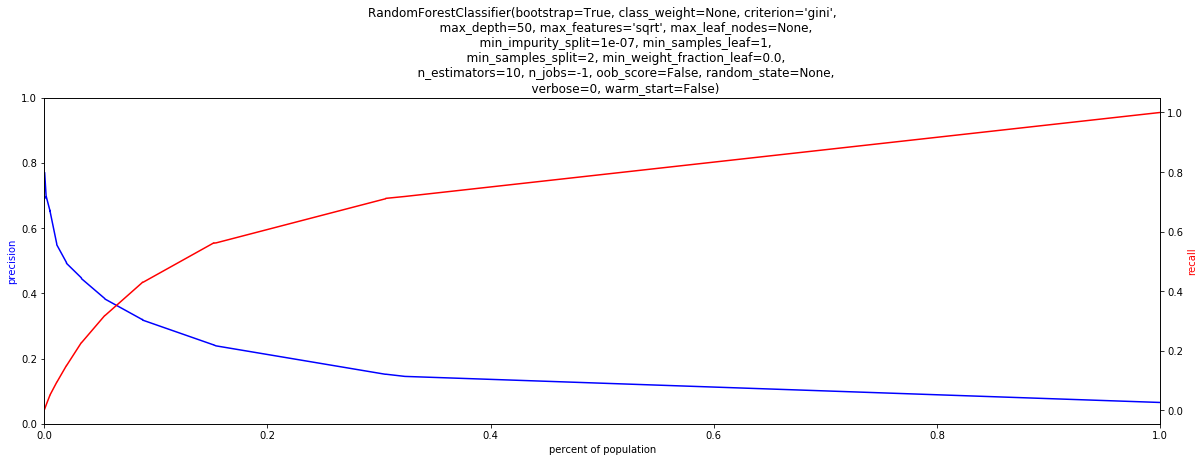

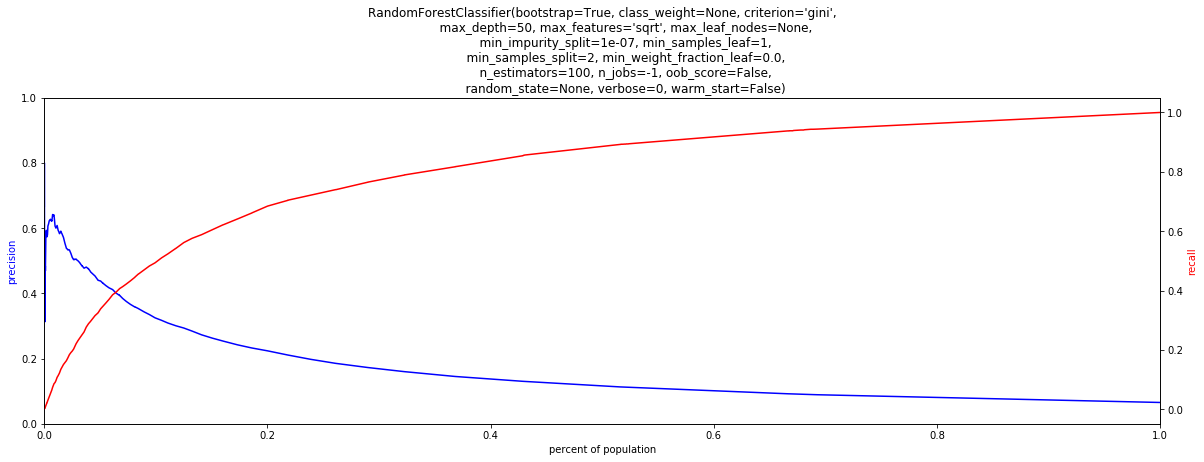

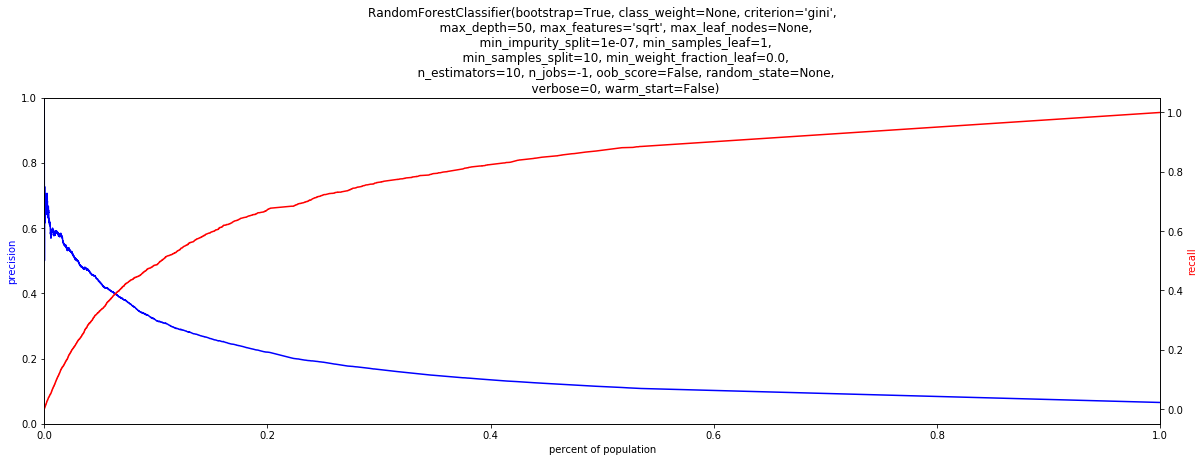

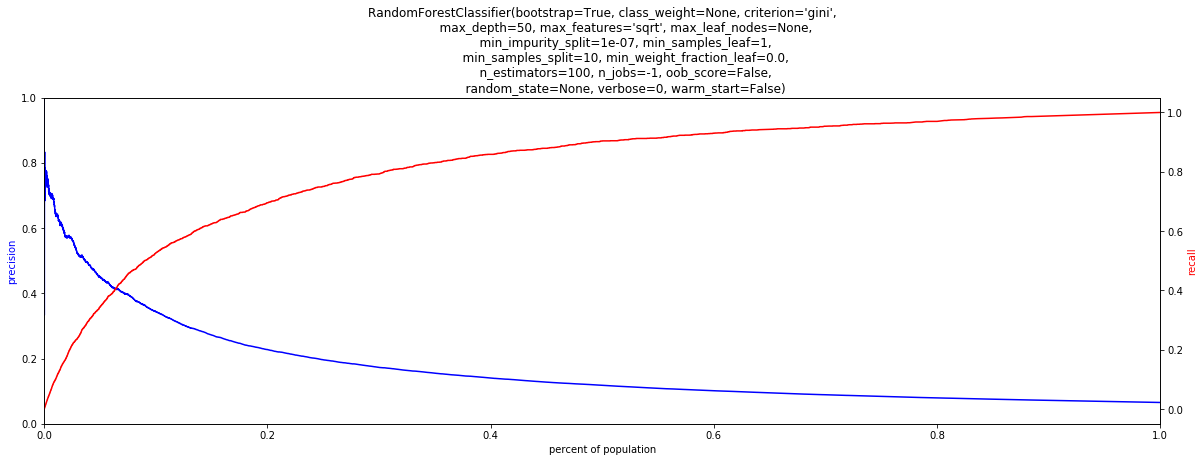

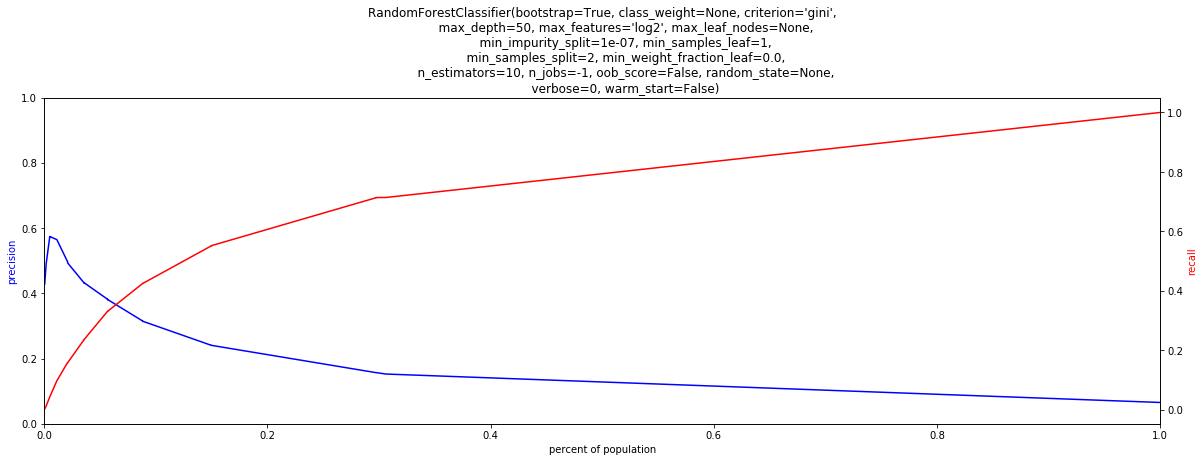

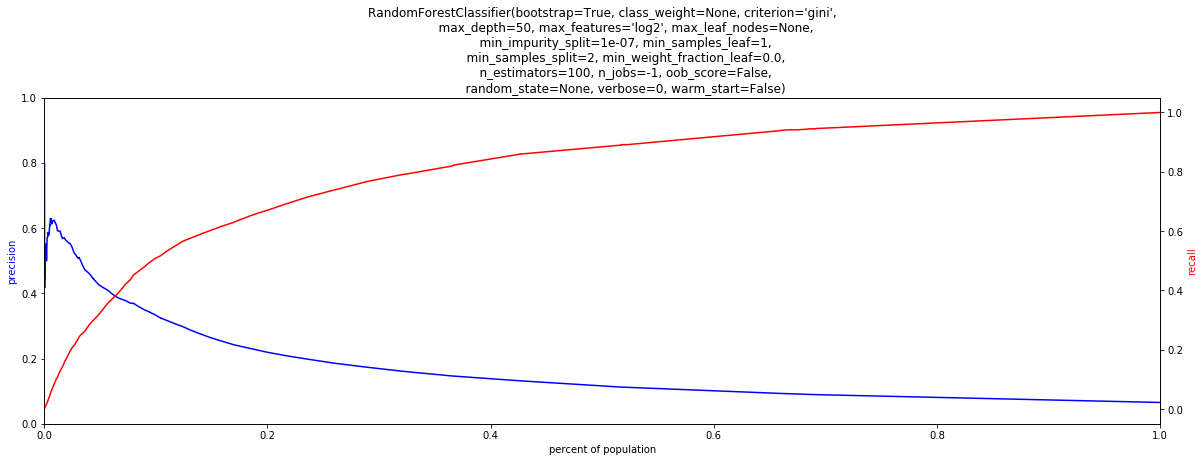

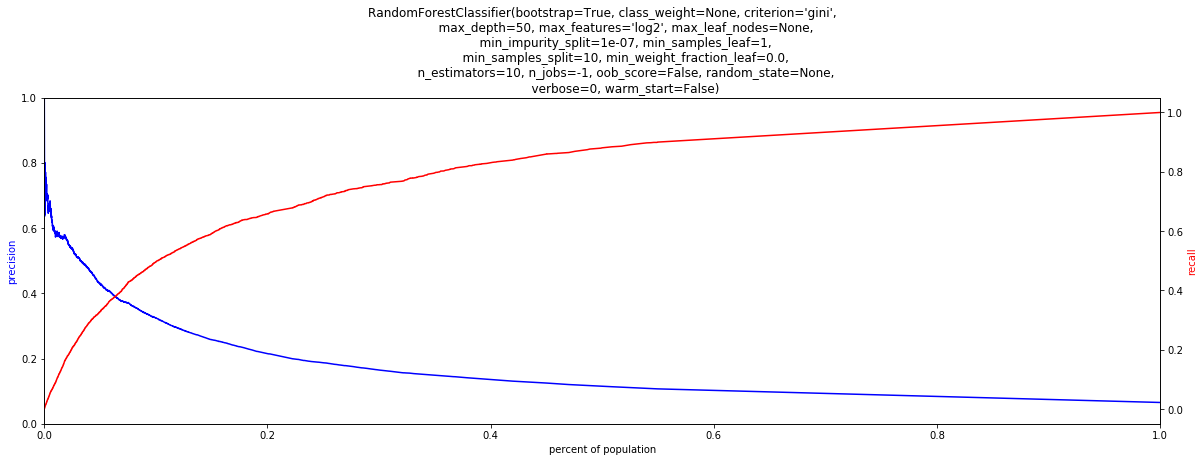

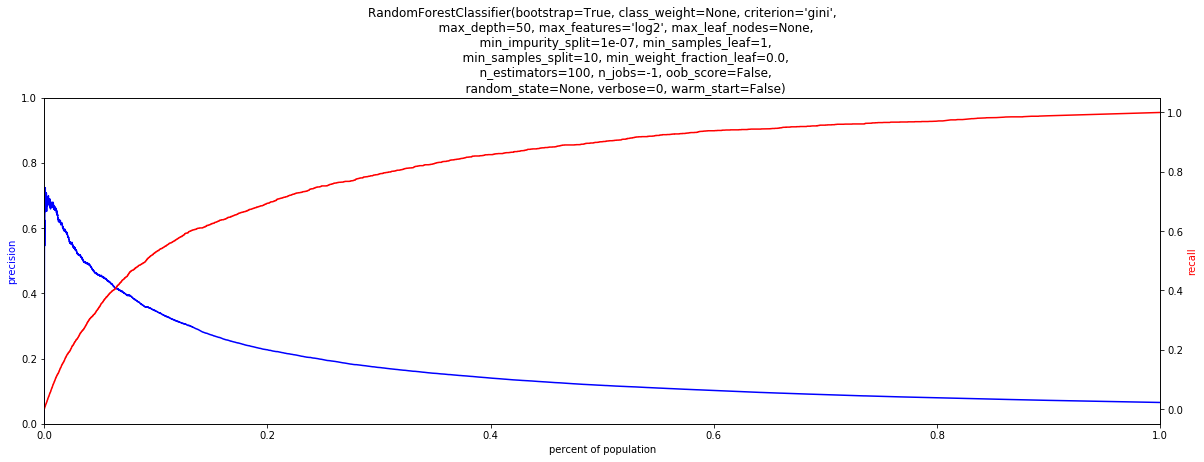

DT


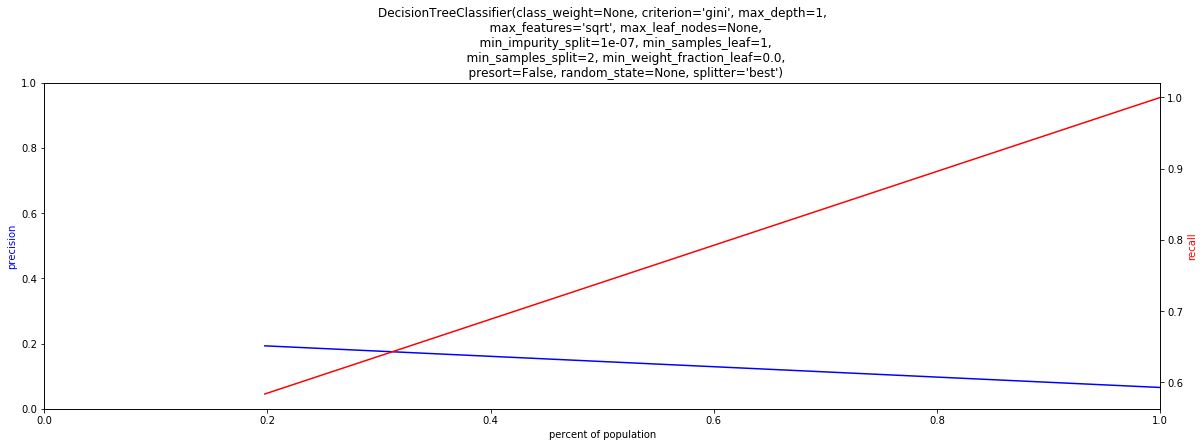

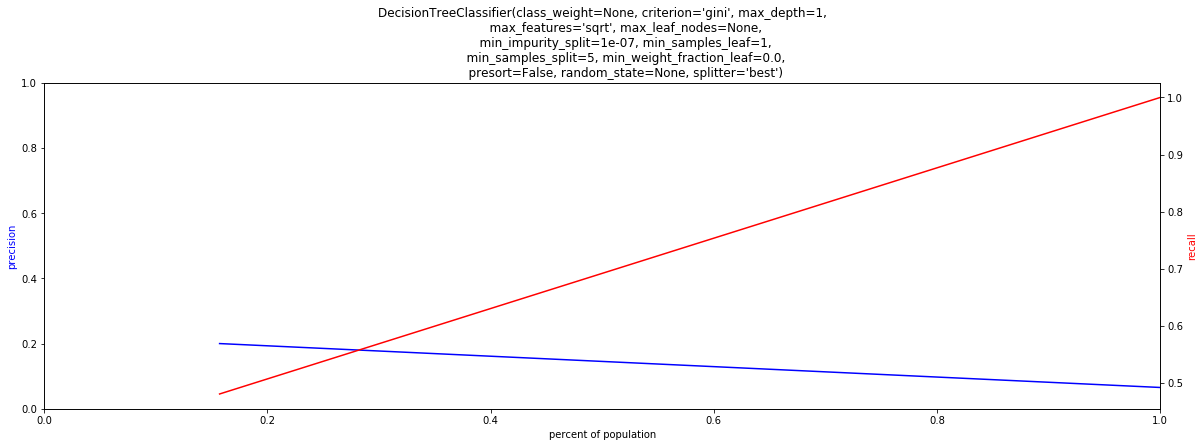

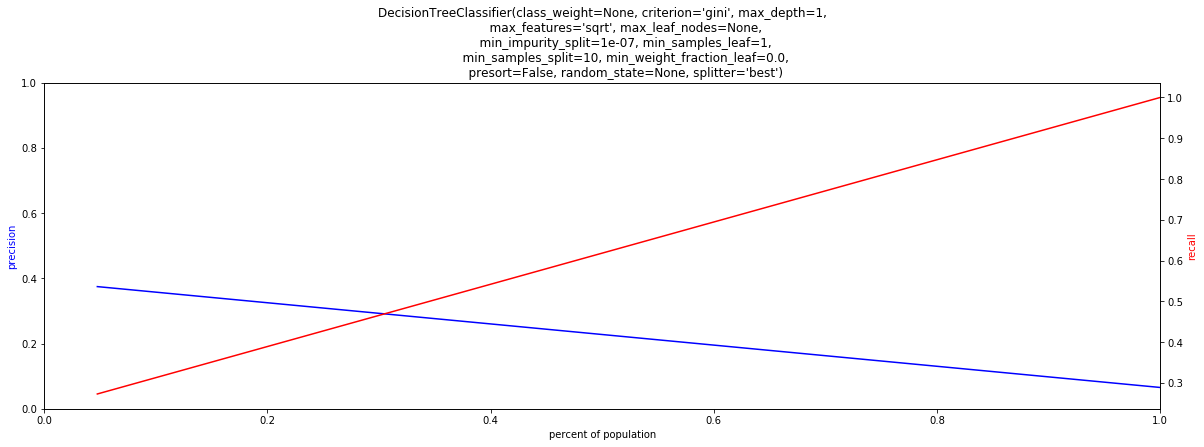

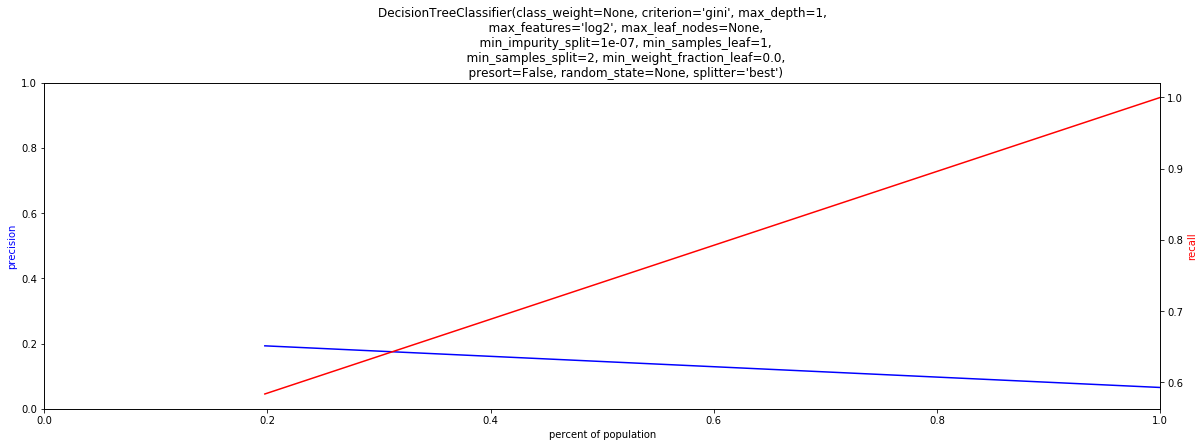

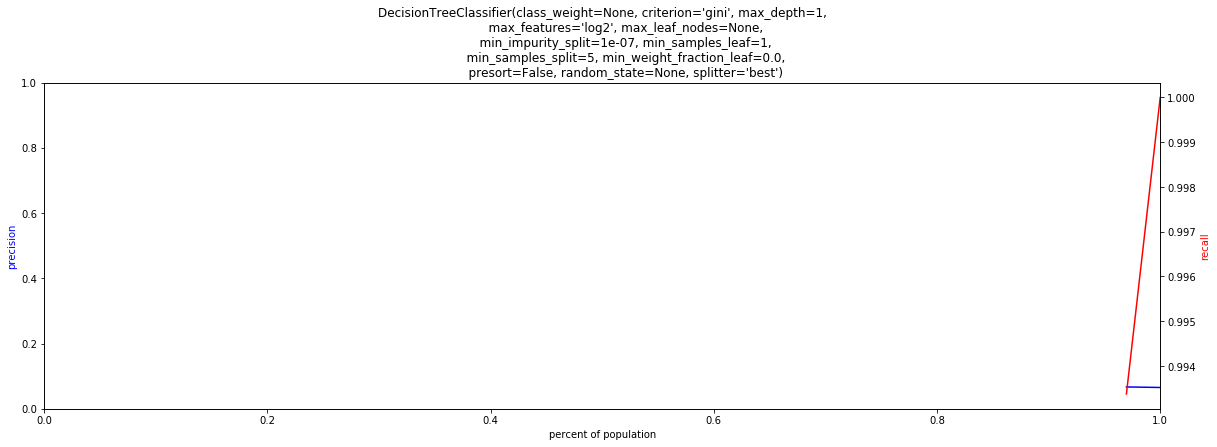

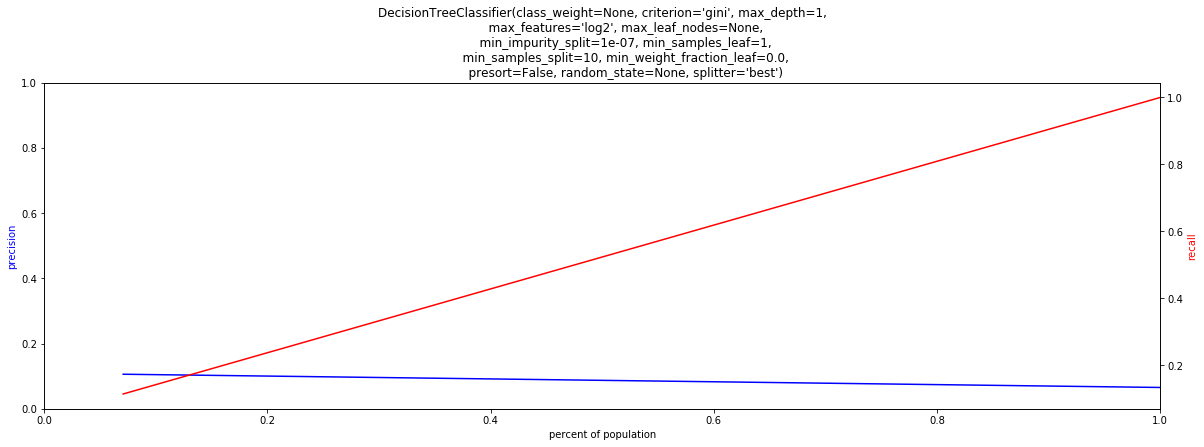

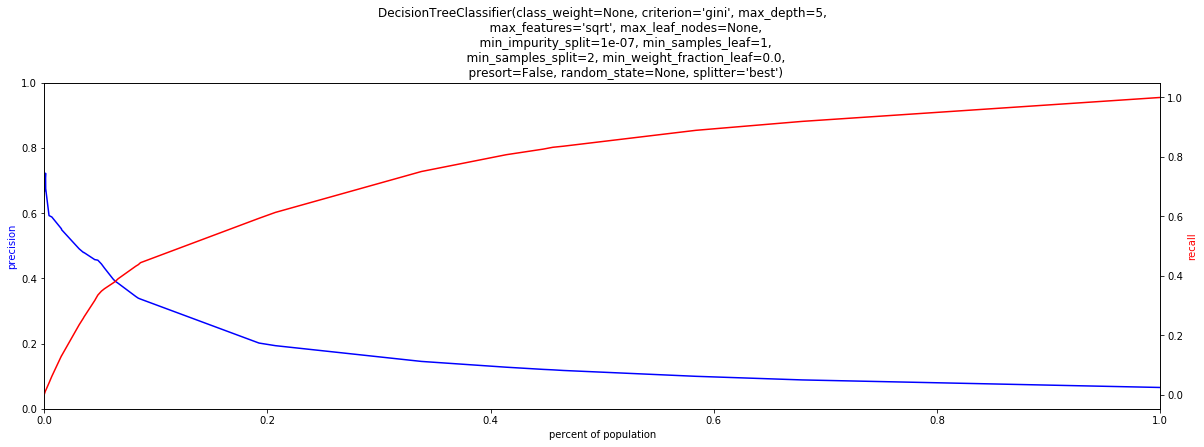

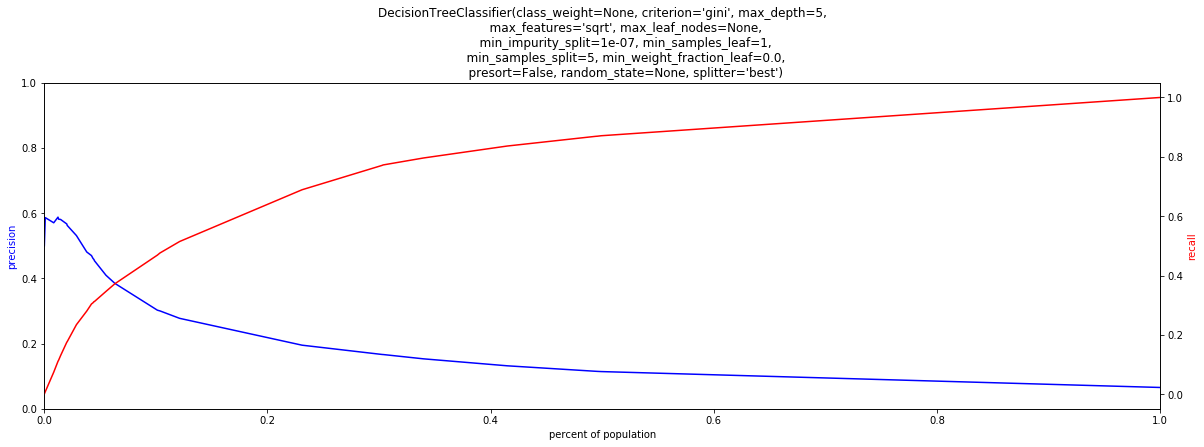

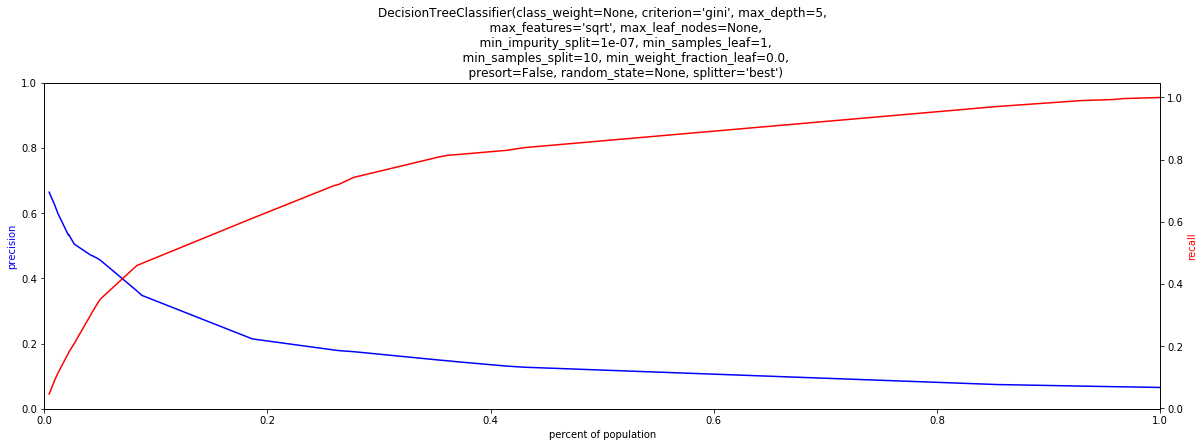

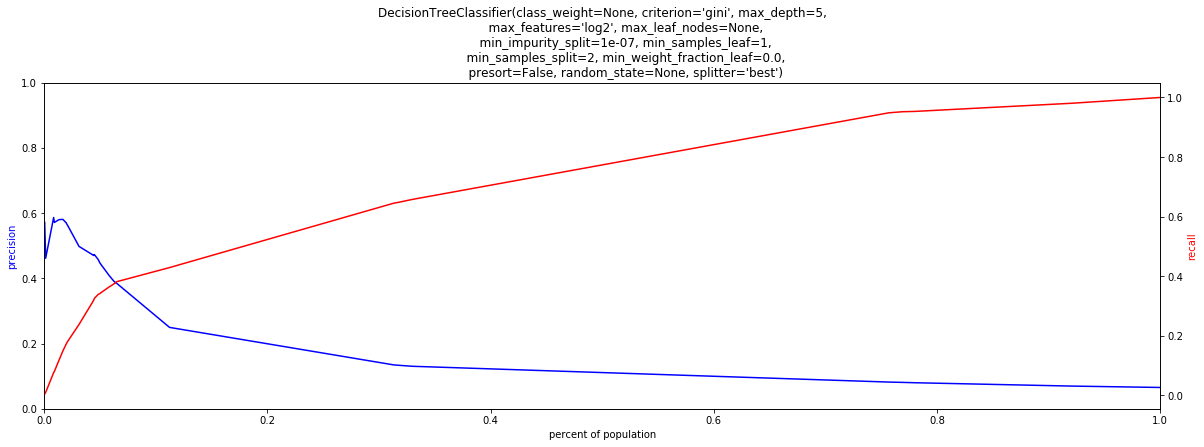

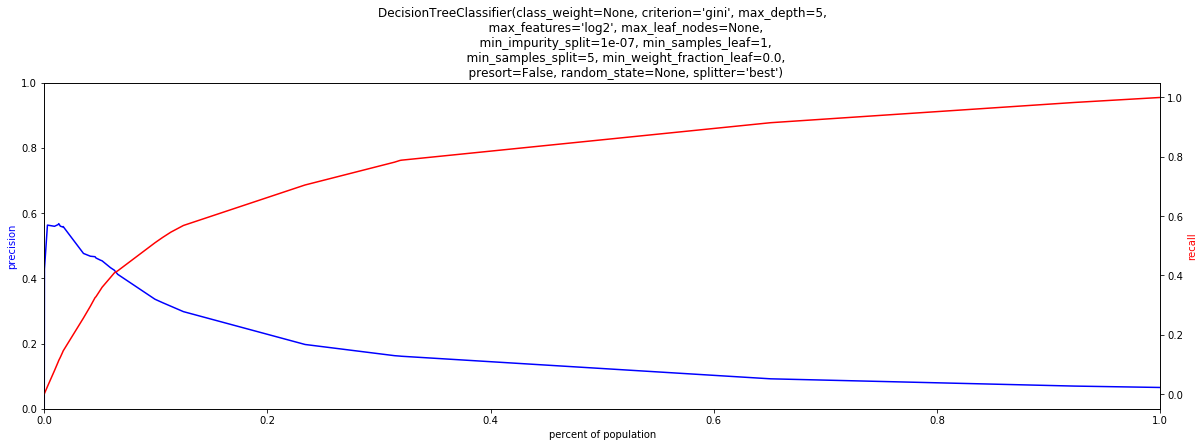

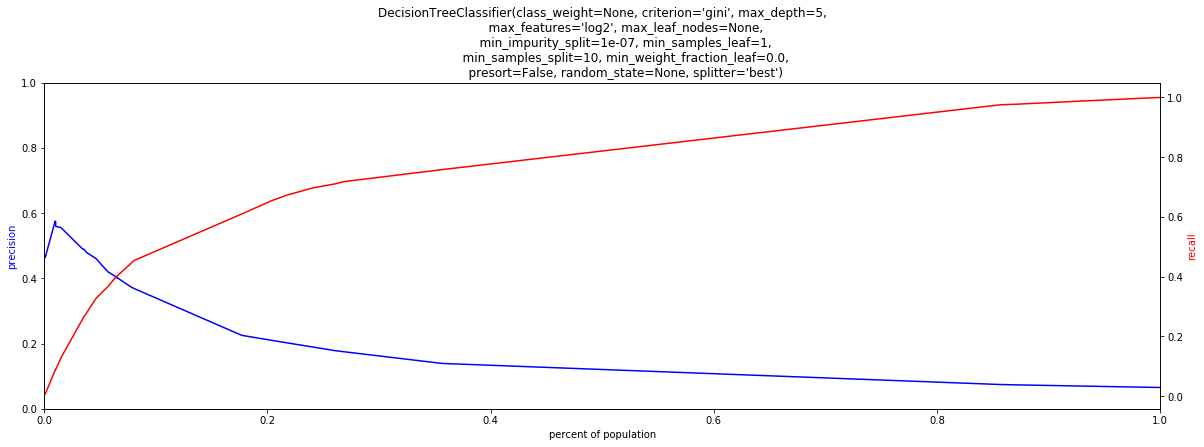

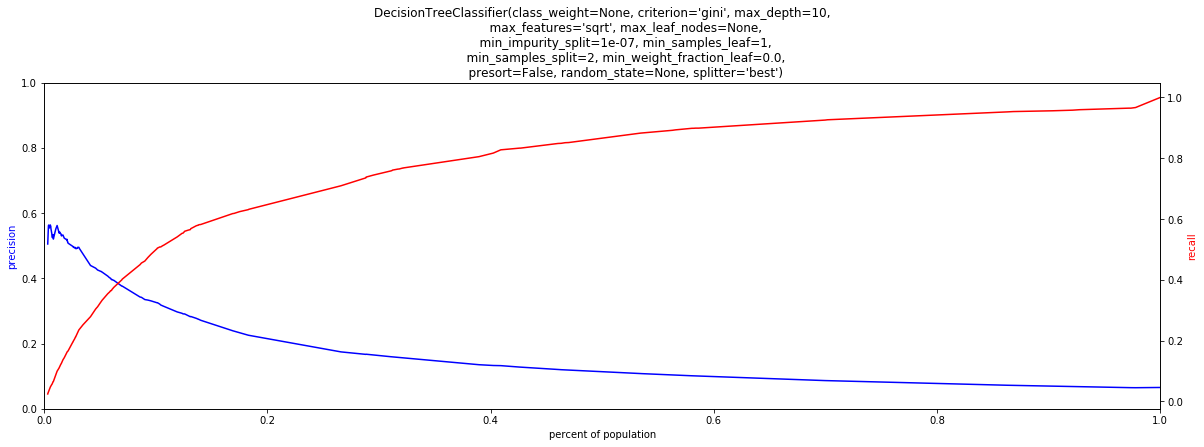

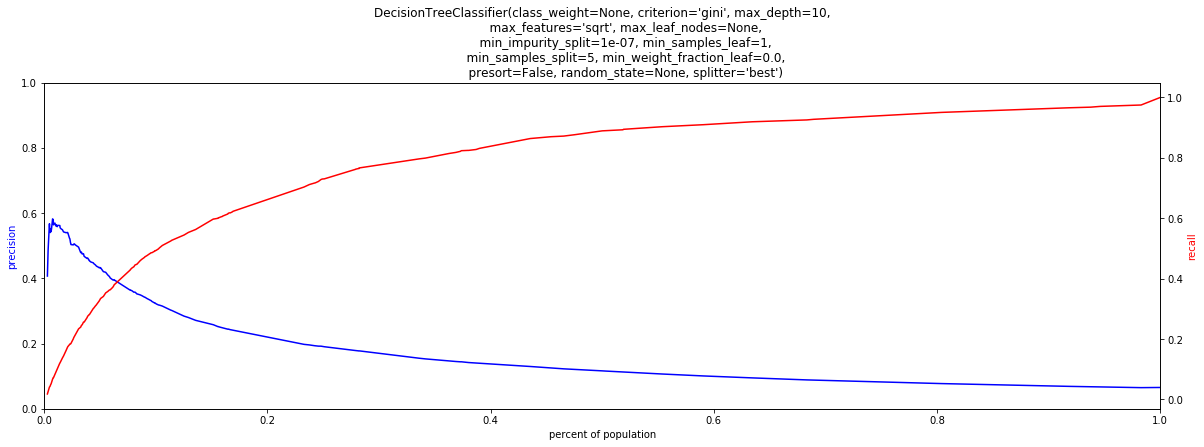

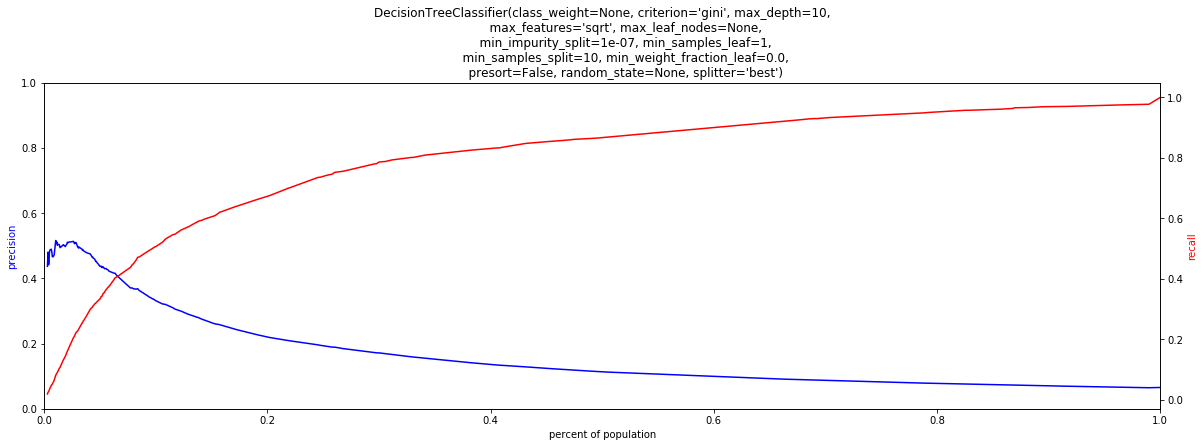

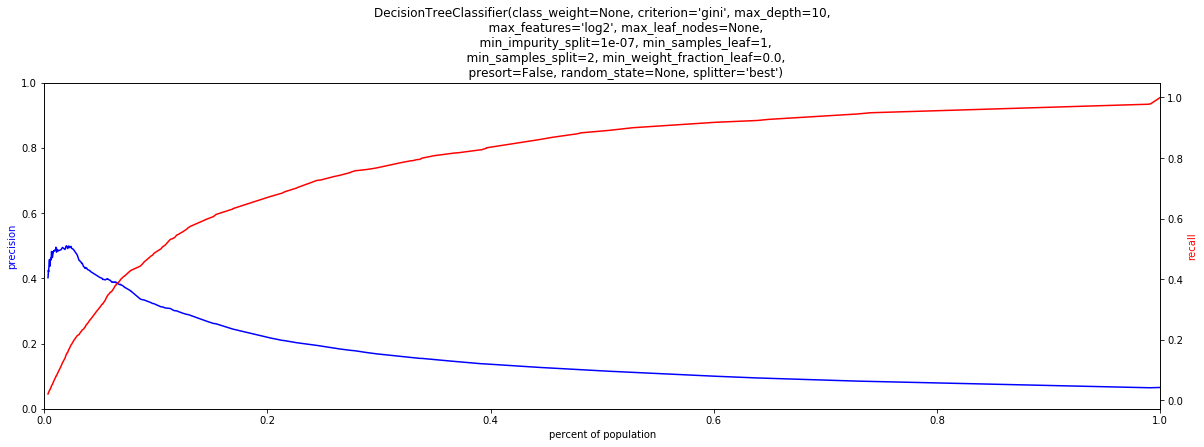

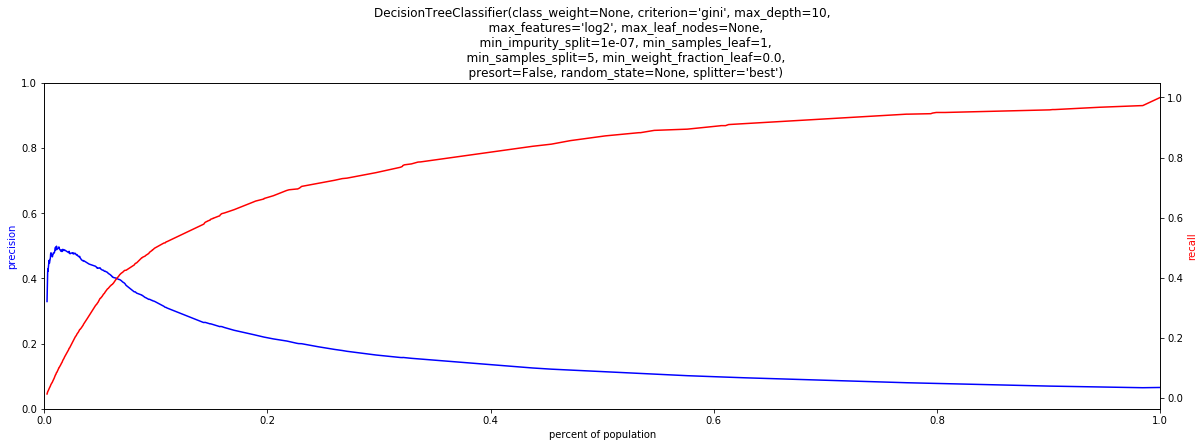

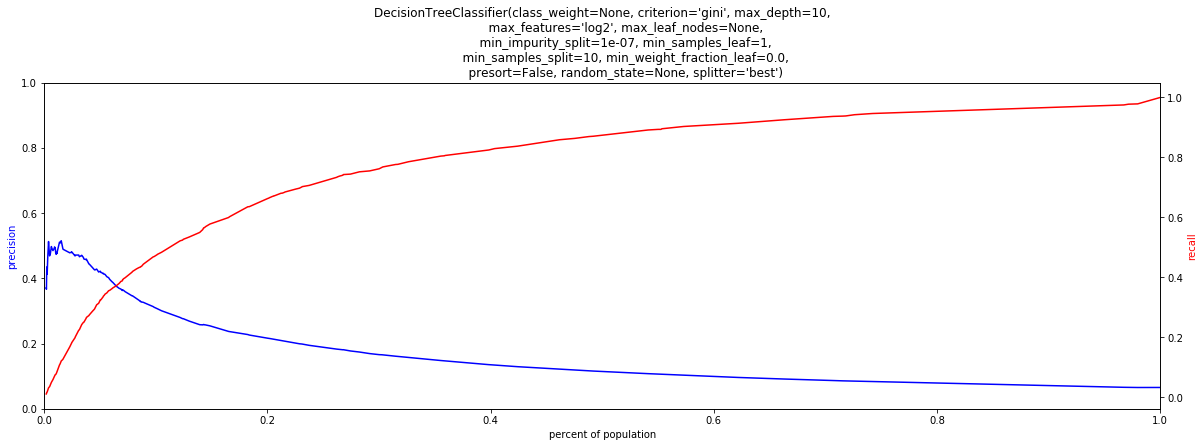

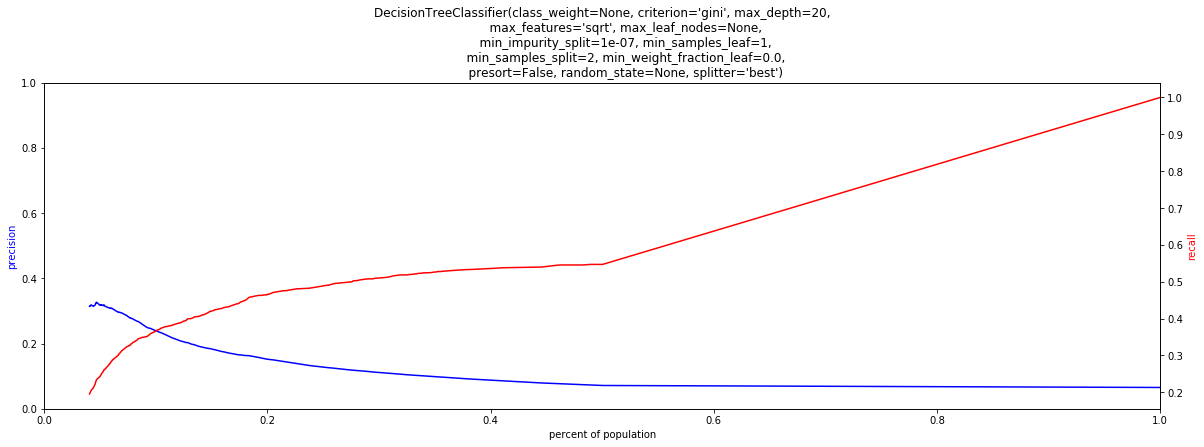

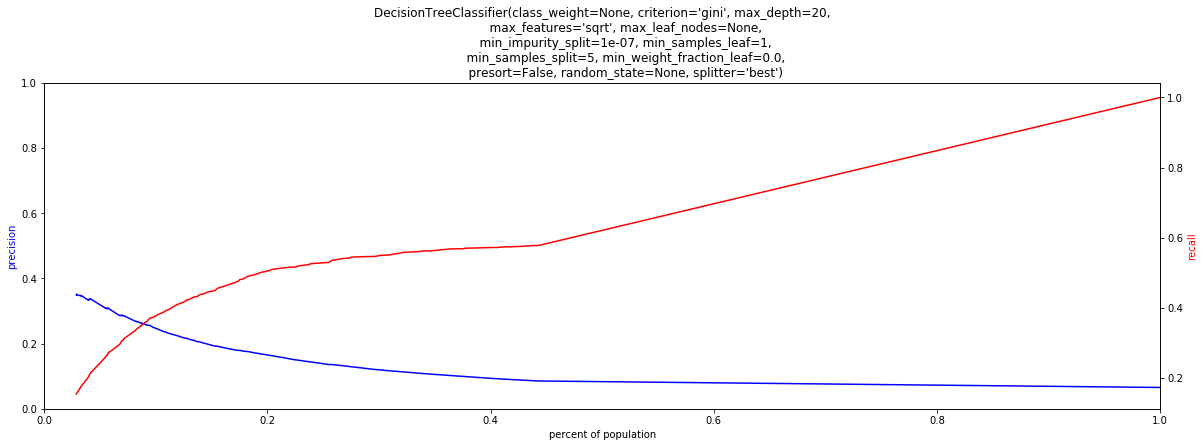

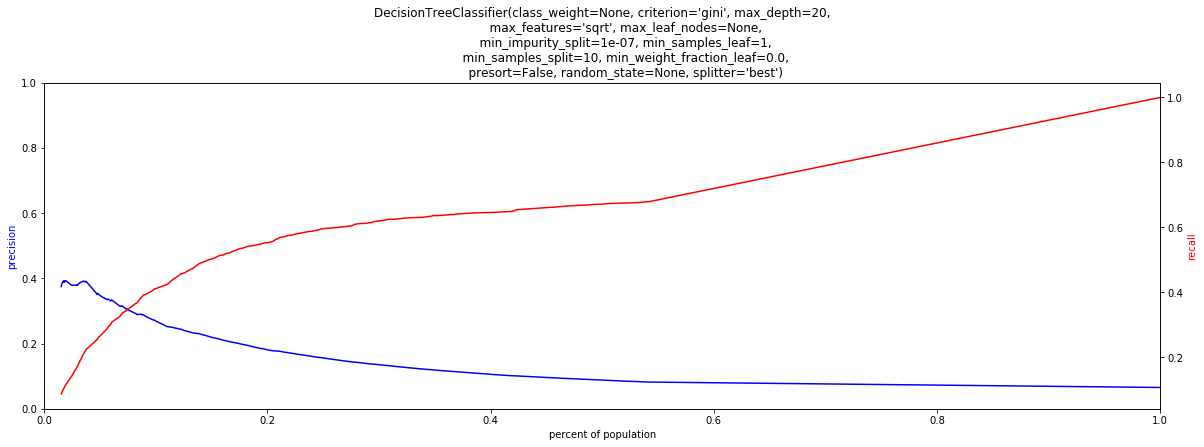

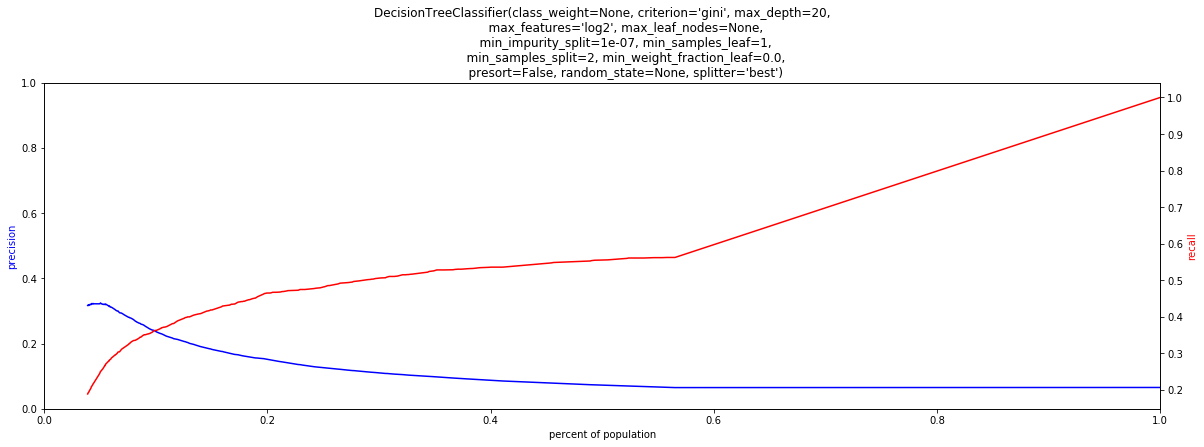

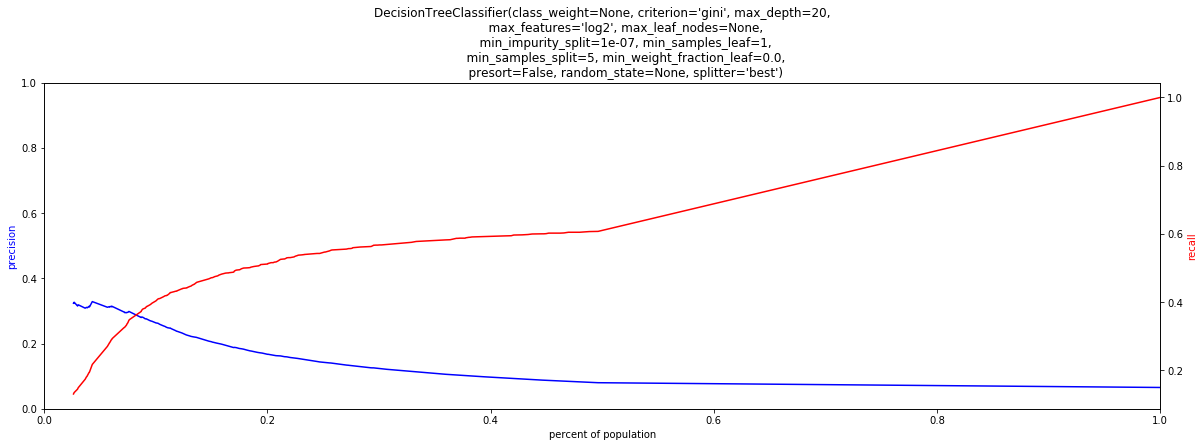

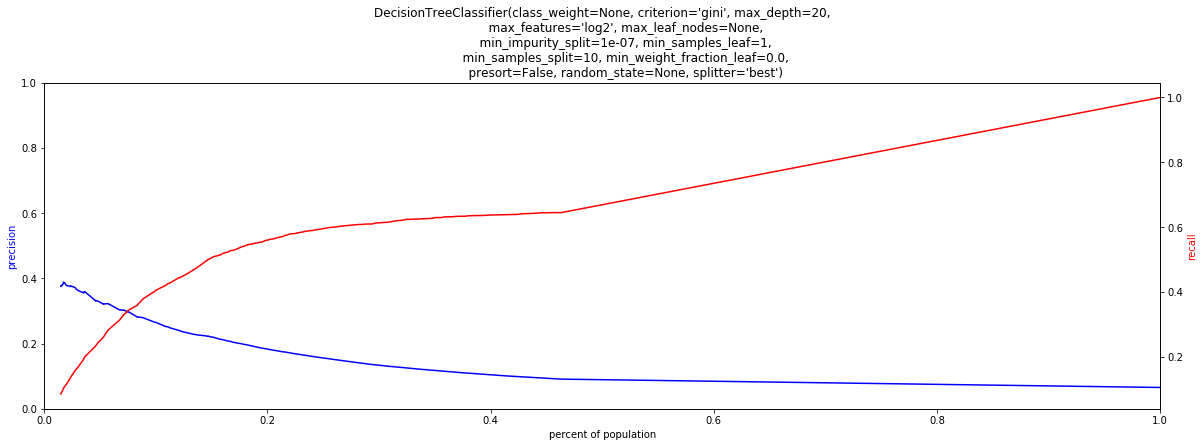

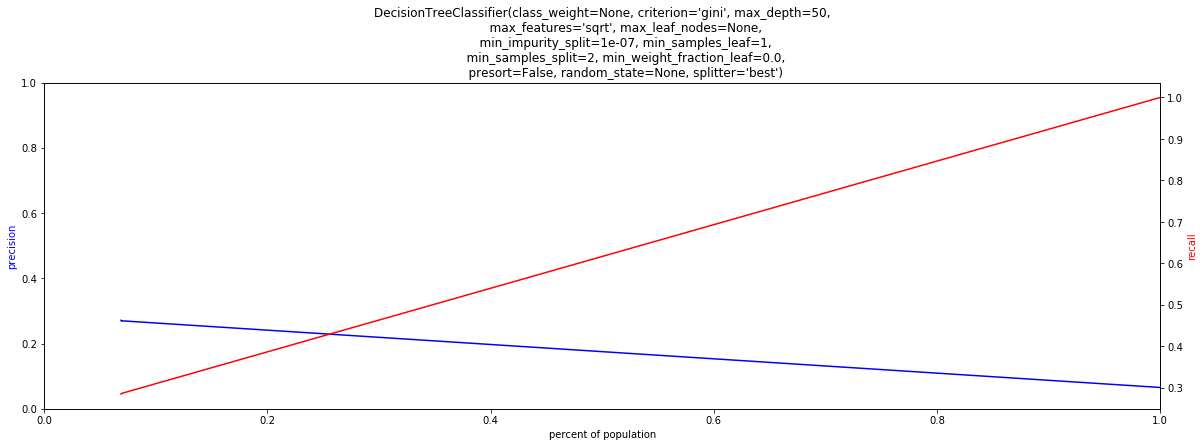

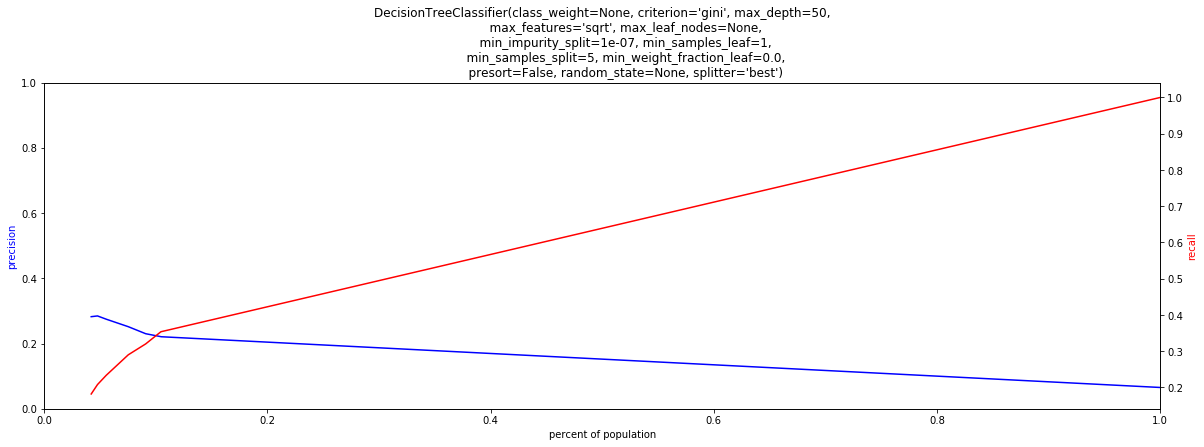

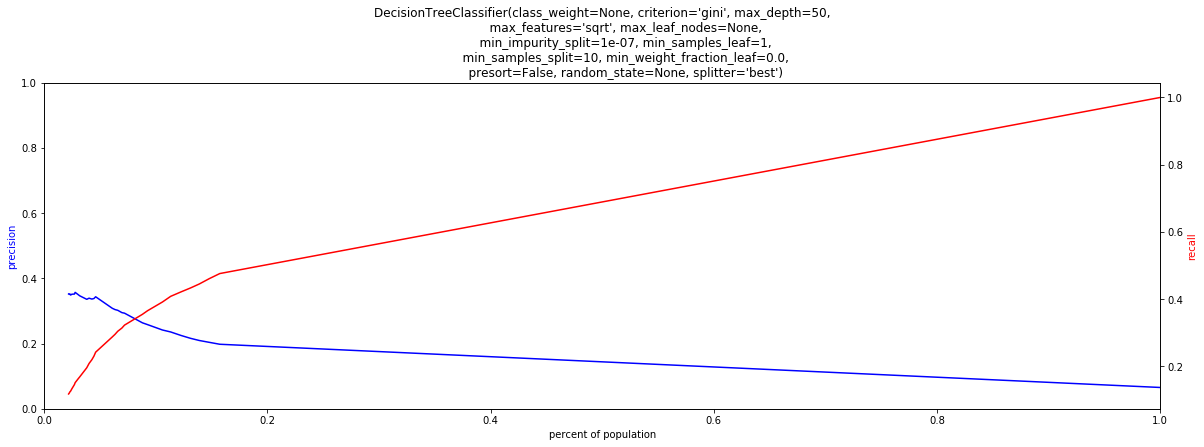

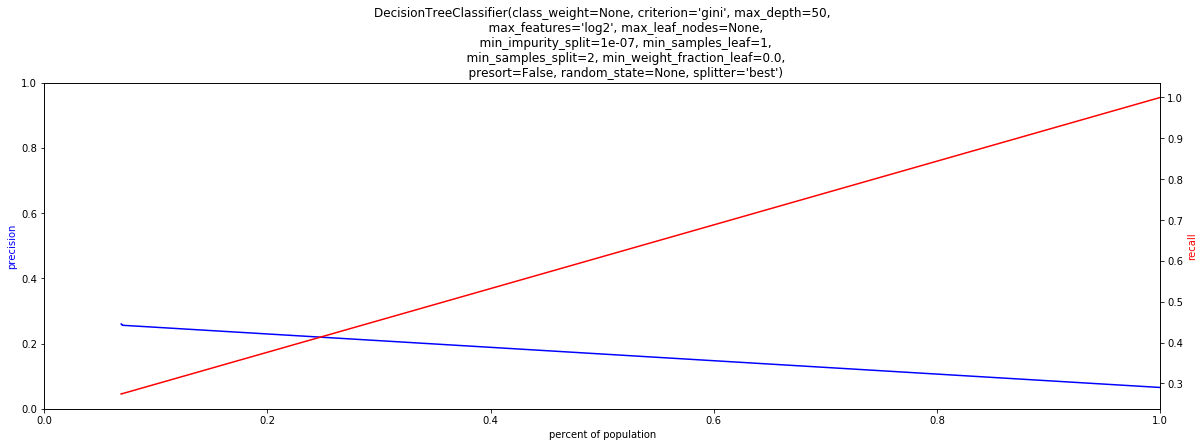

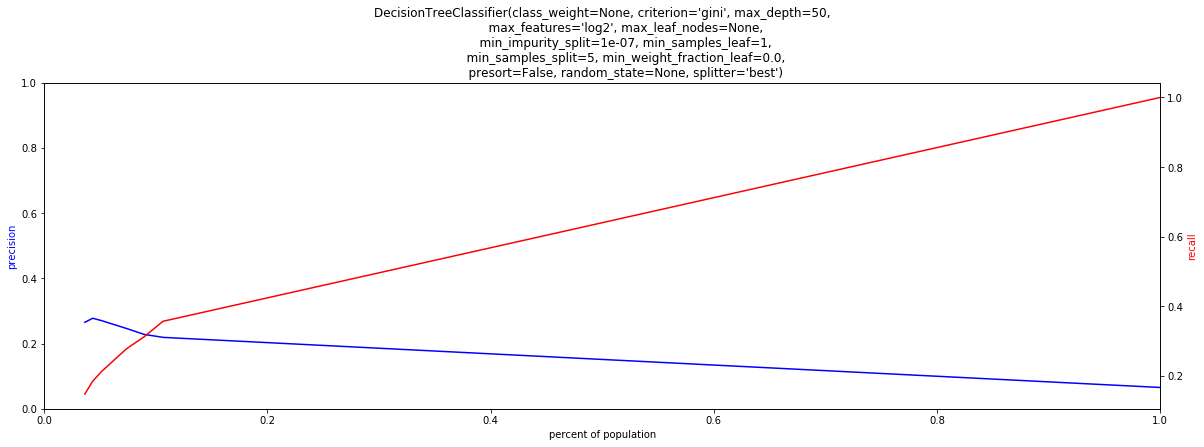

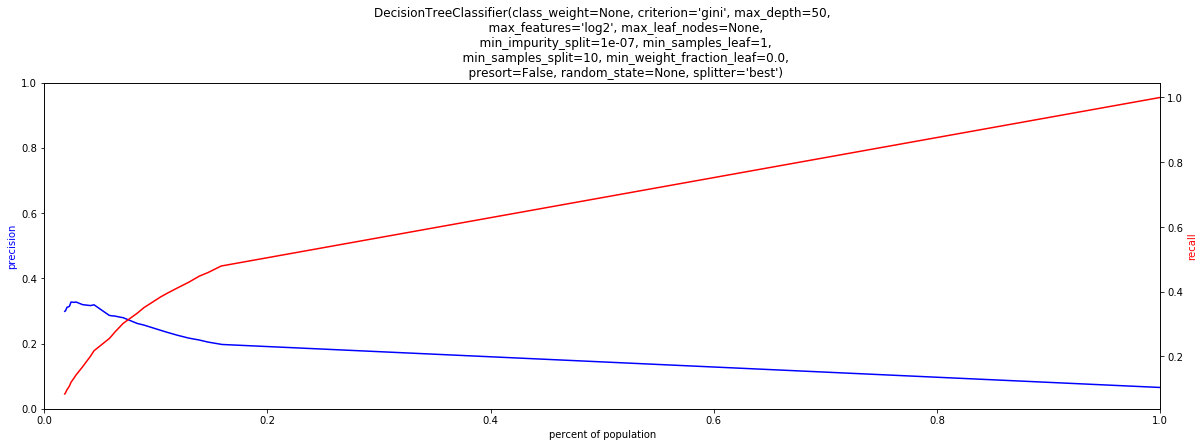

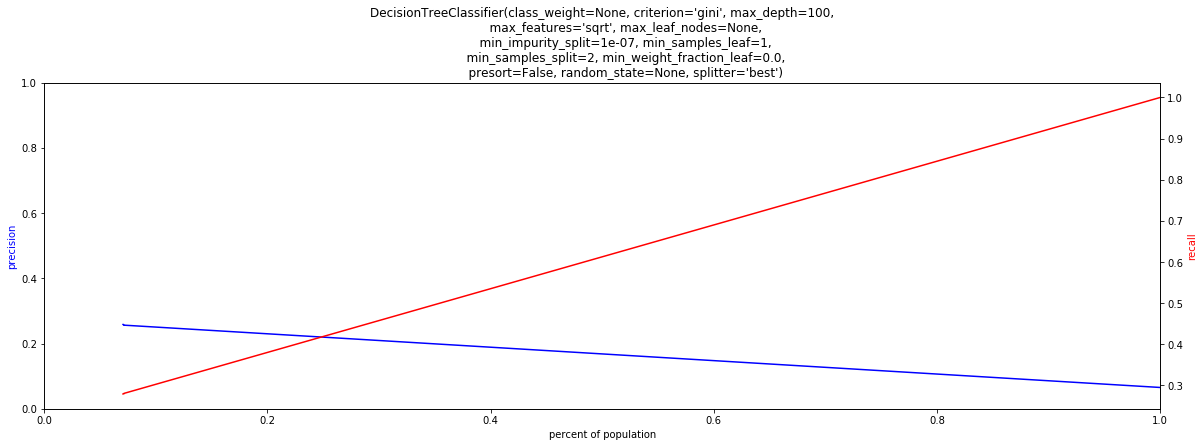

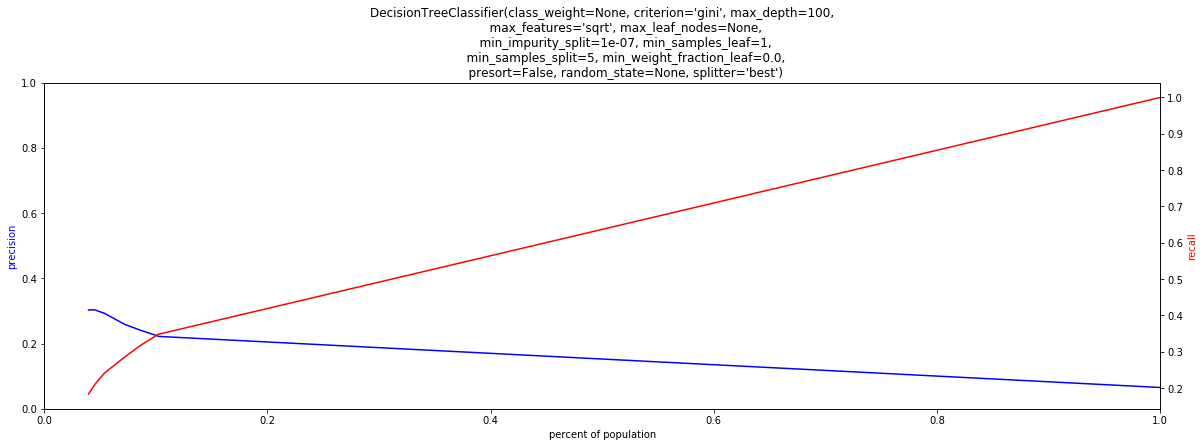

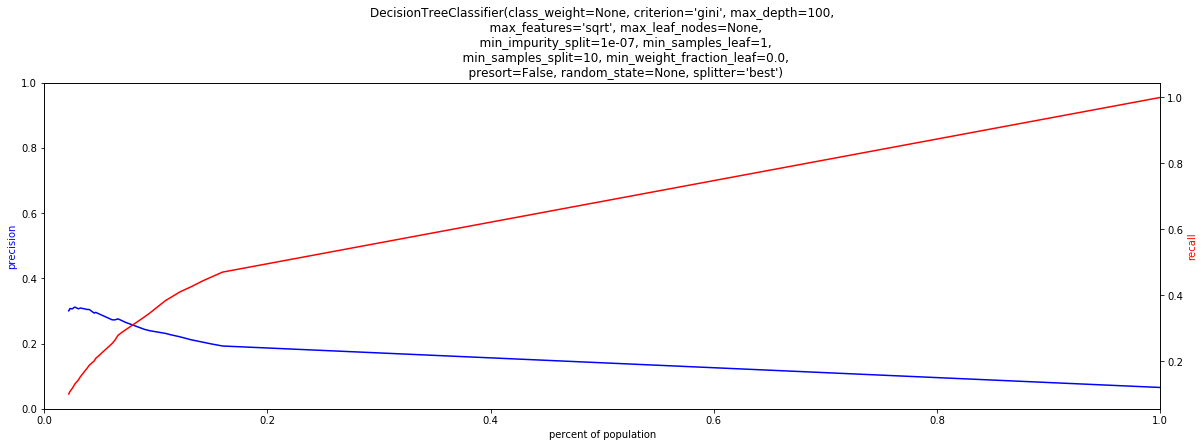

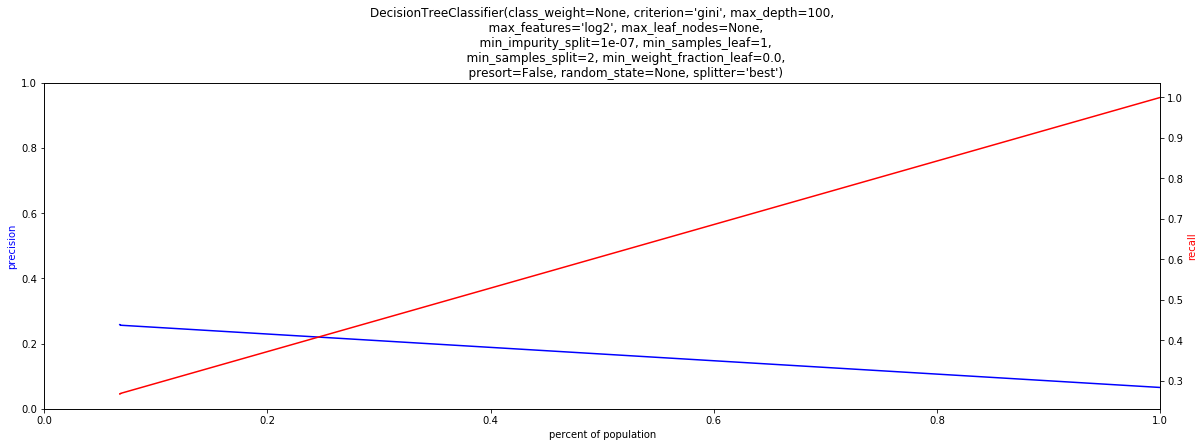

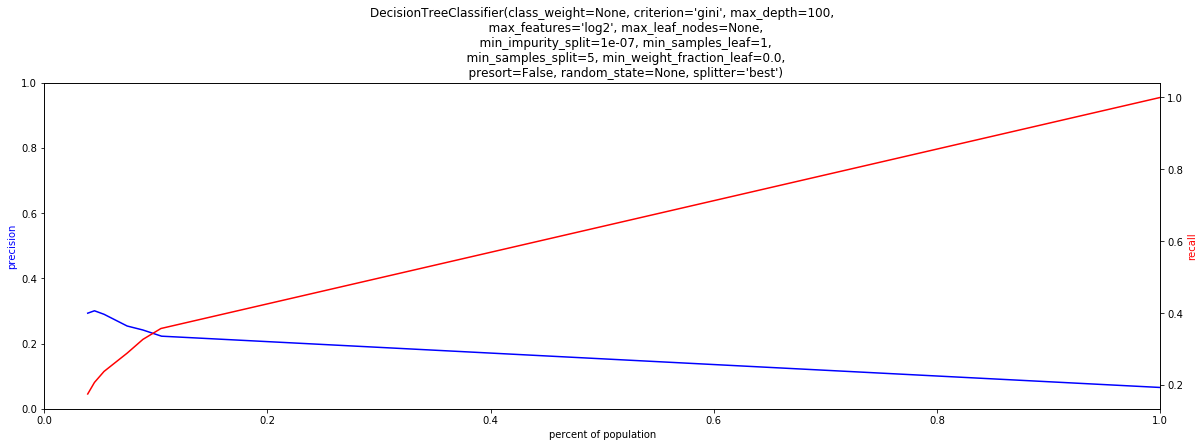

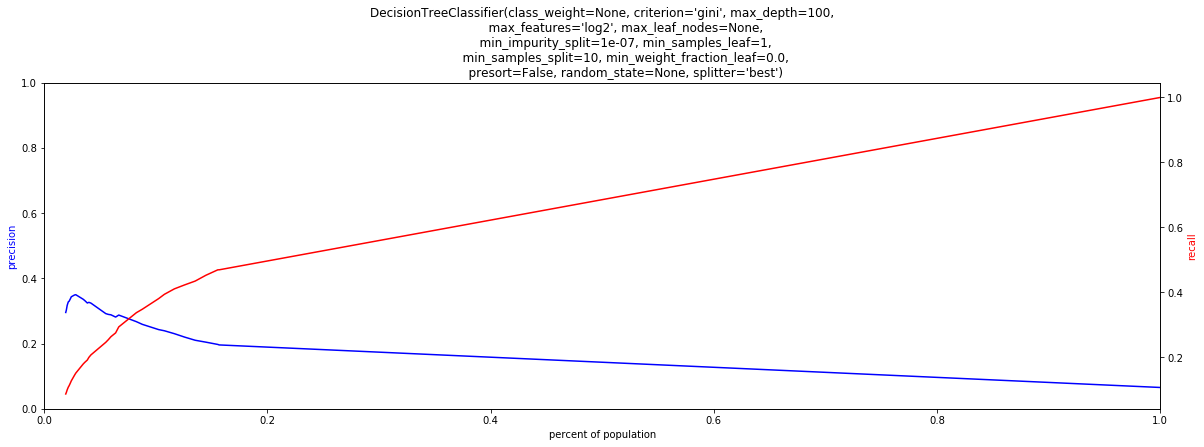

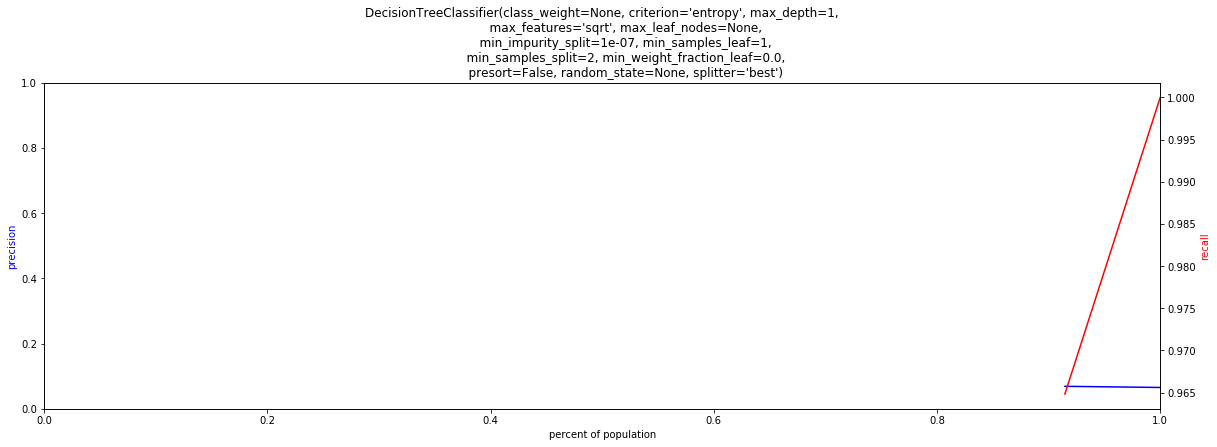

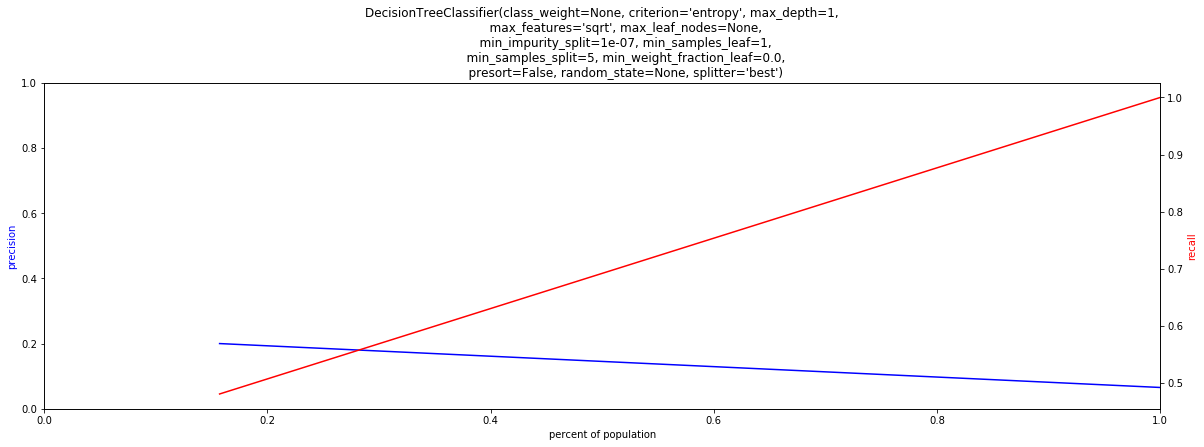

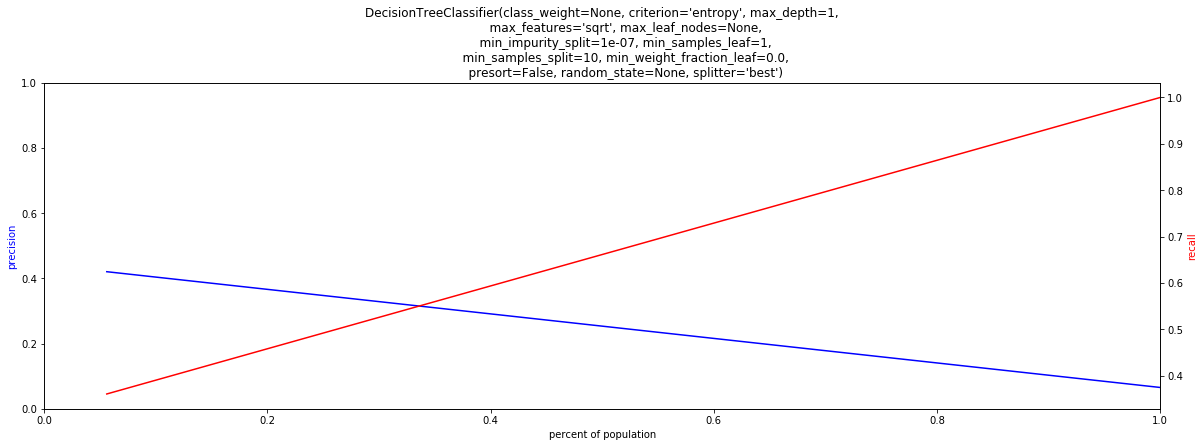

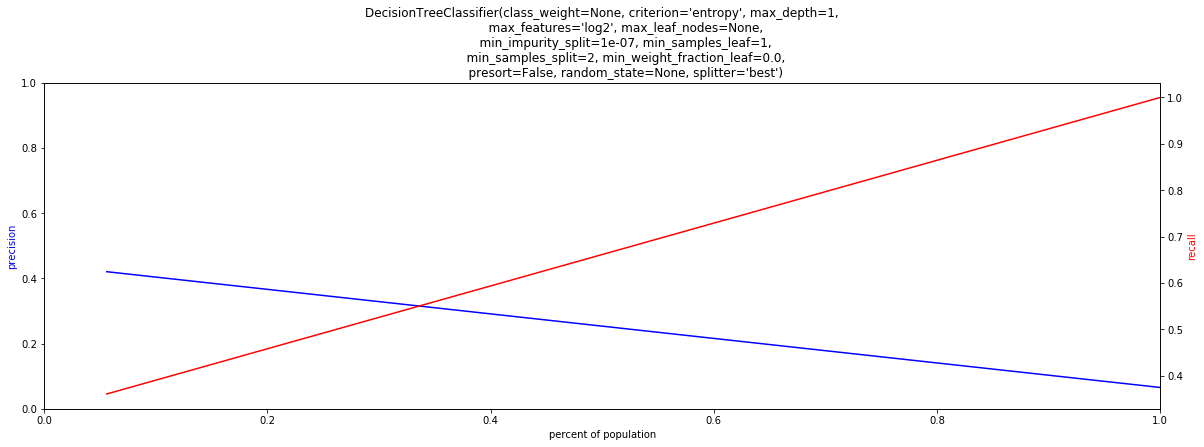

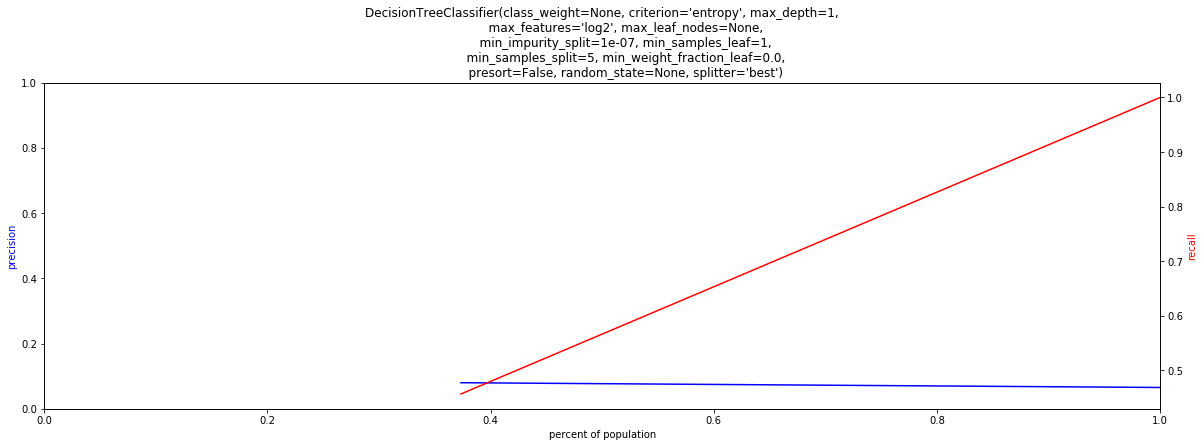

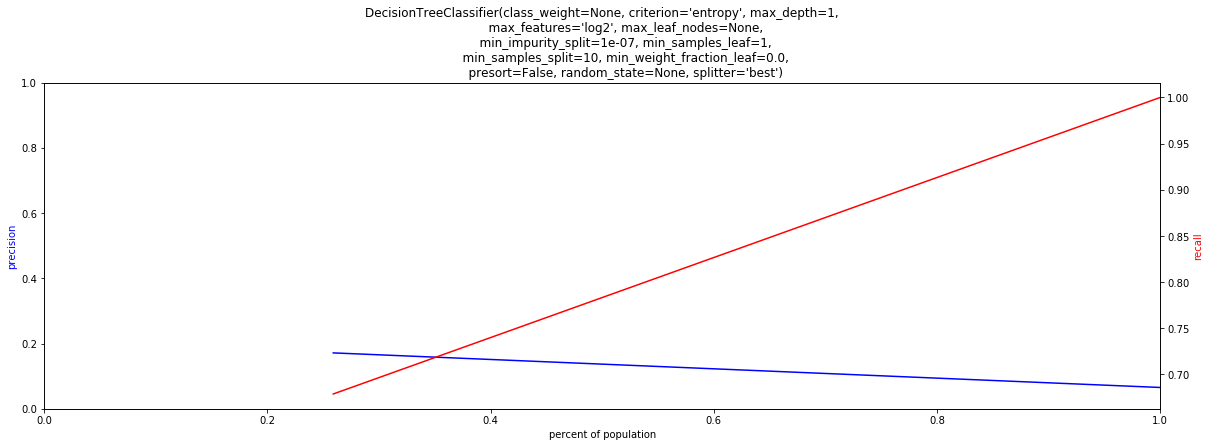

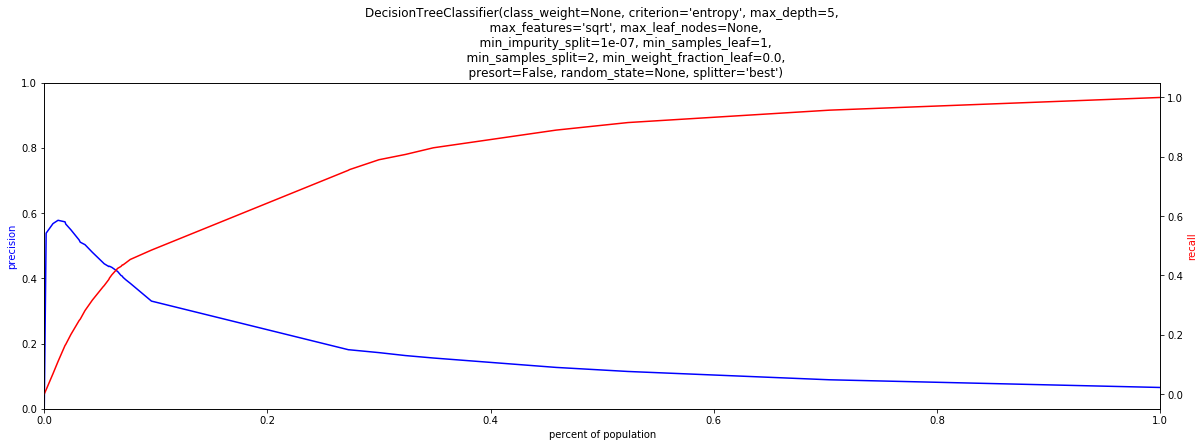

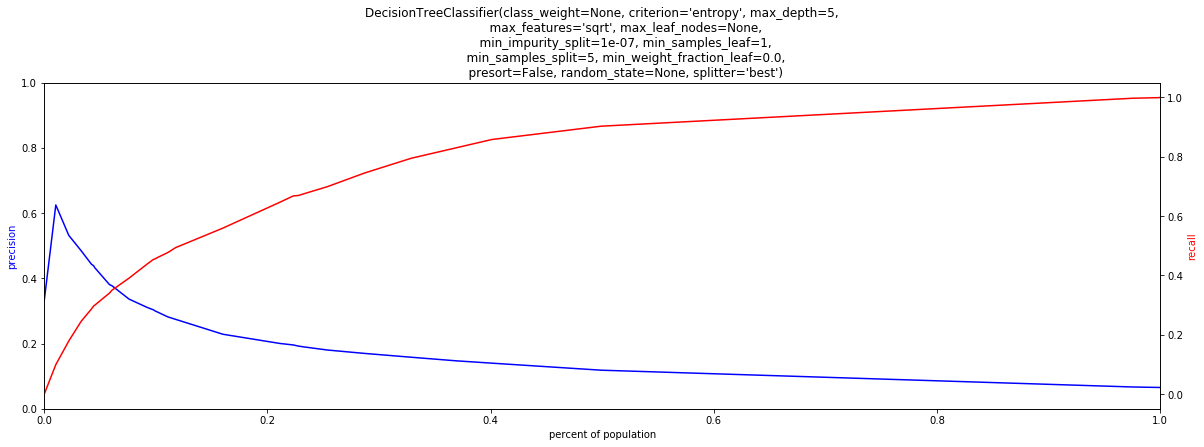

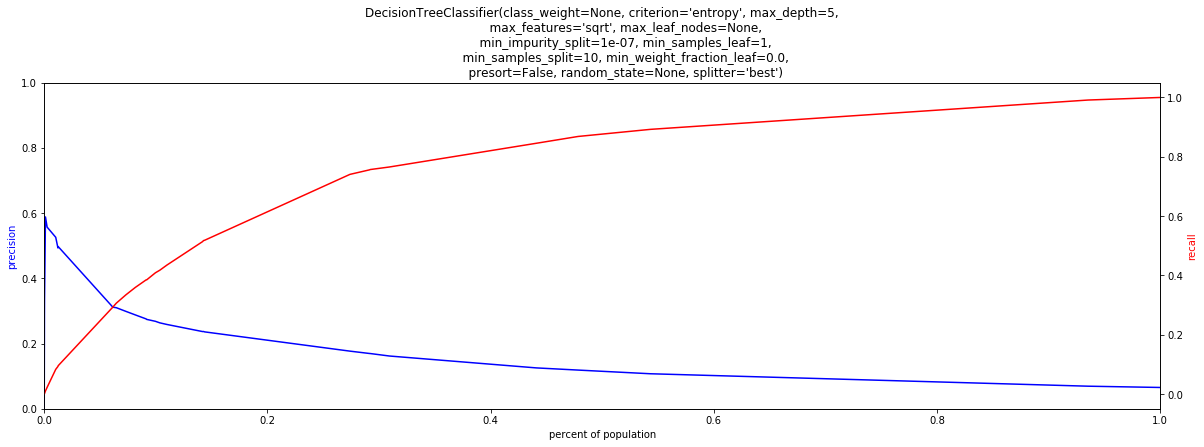

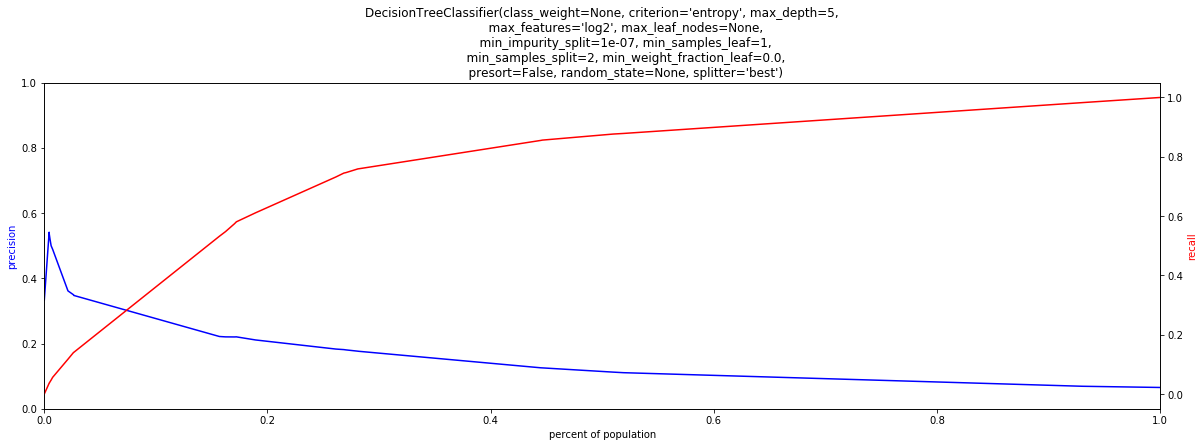

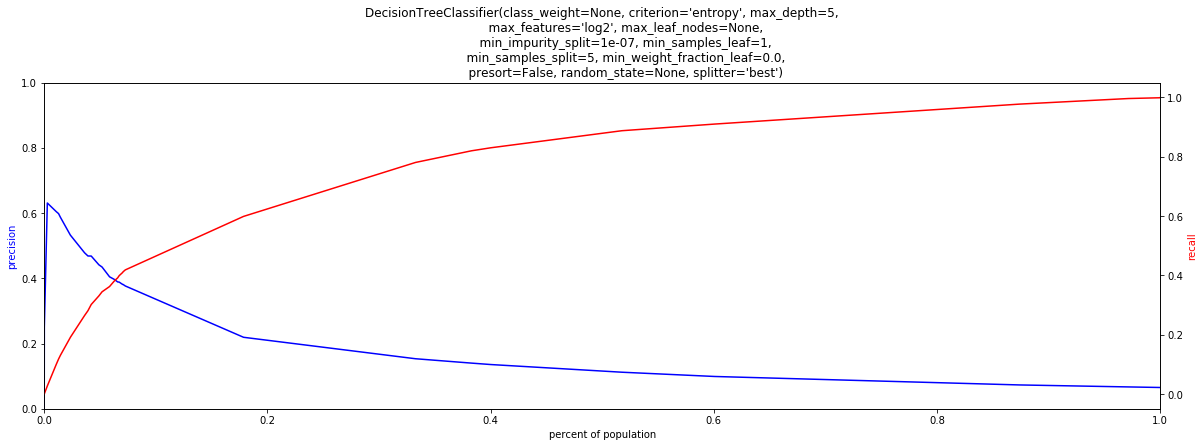

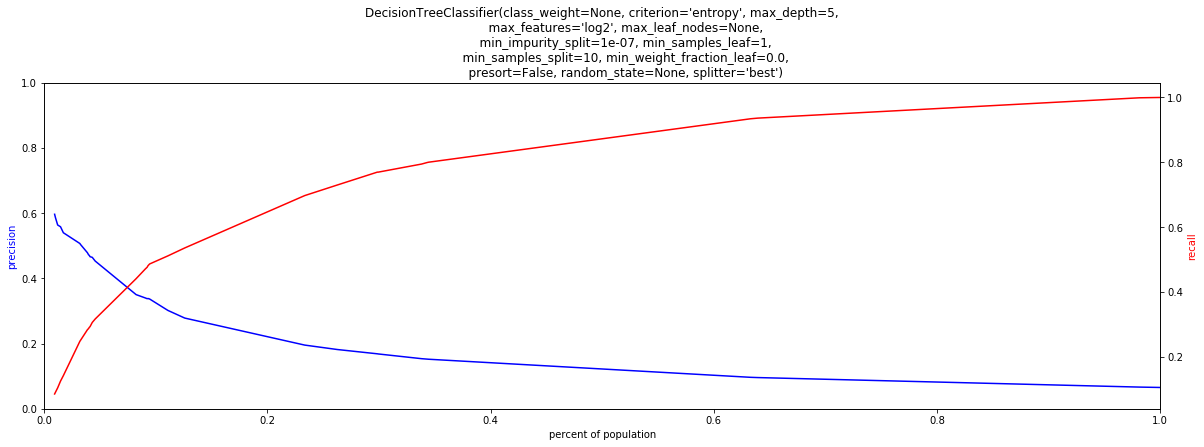

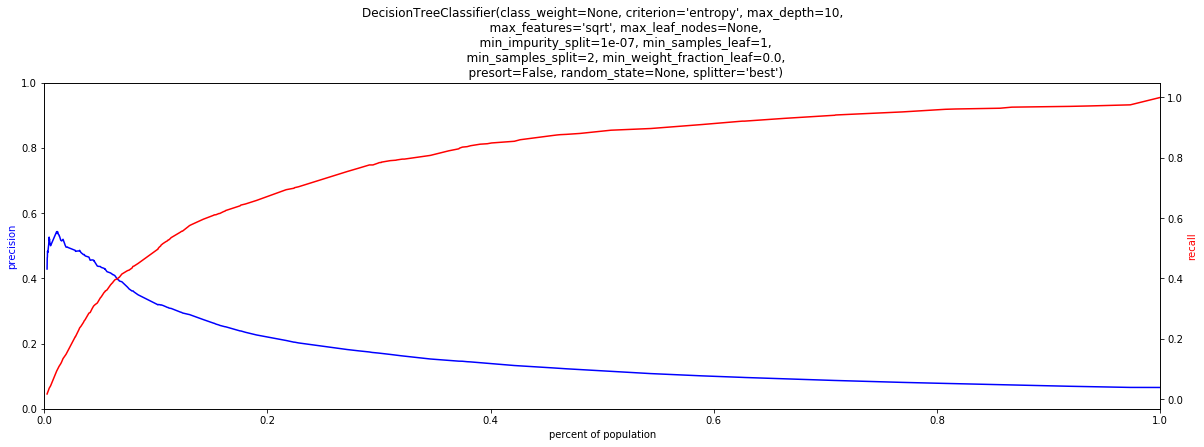

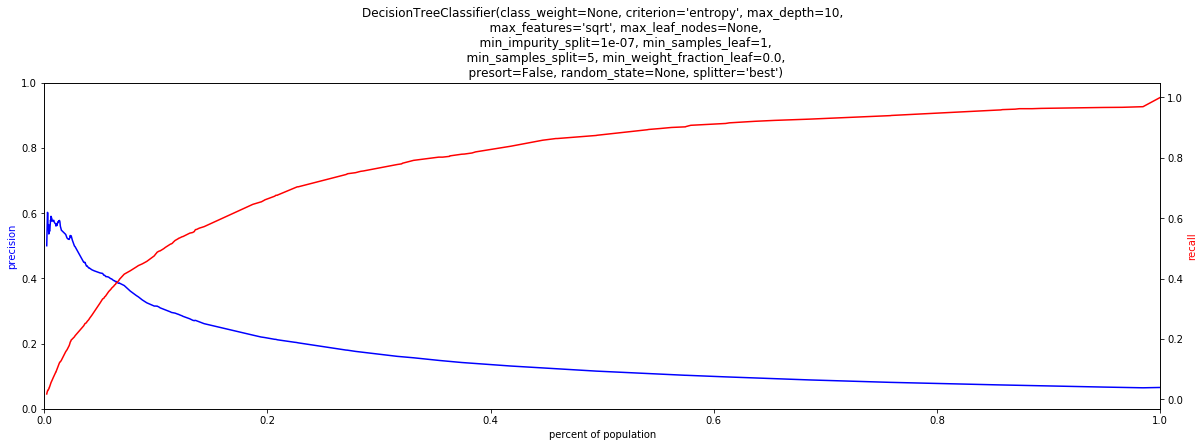

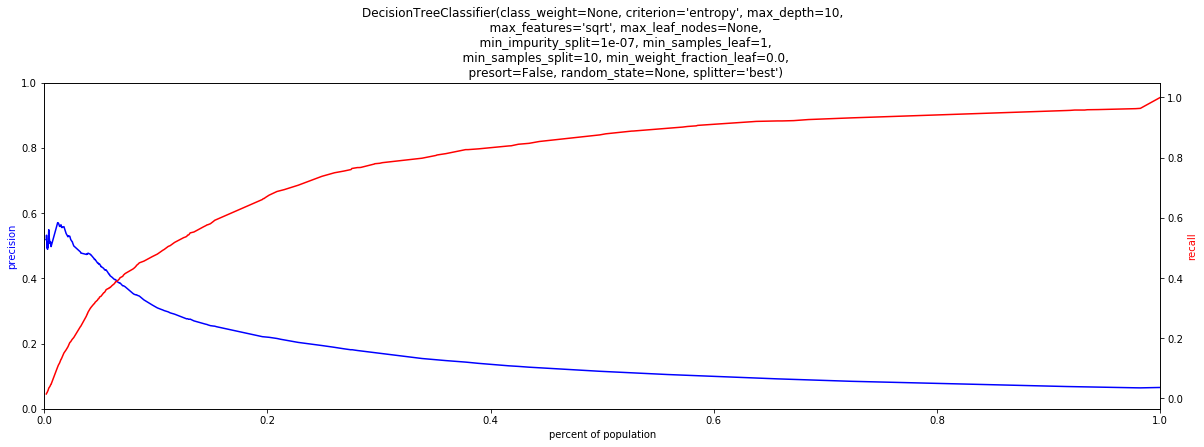

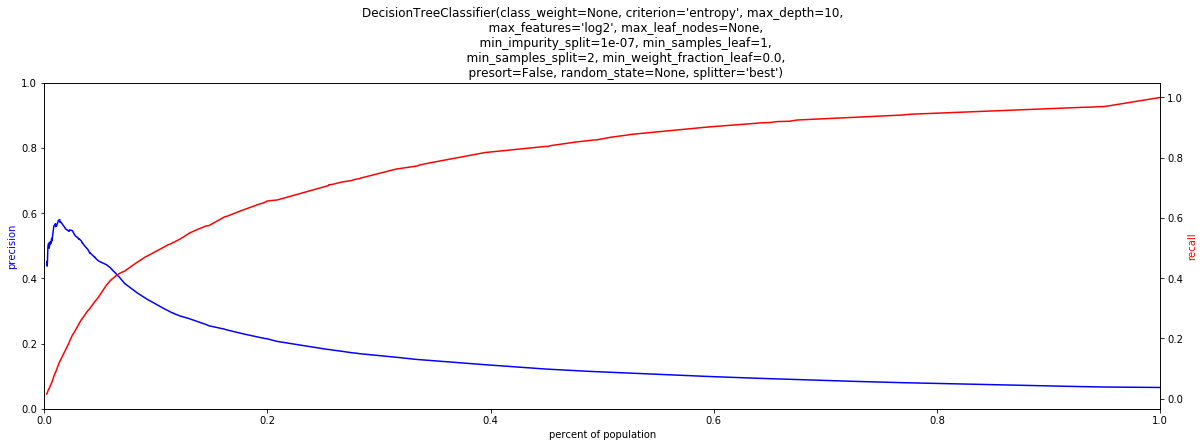

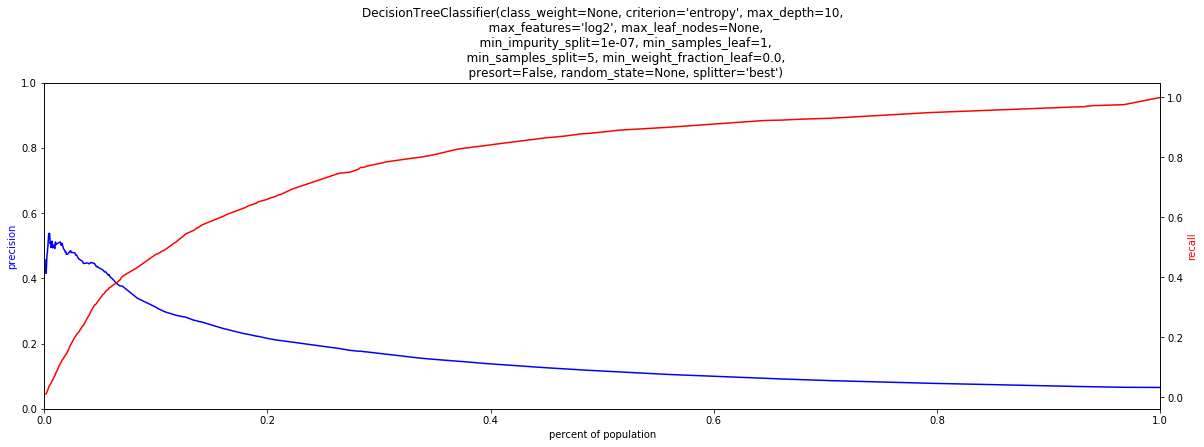

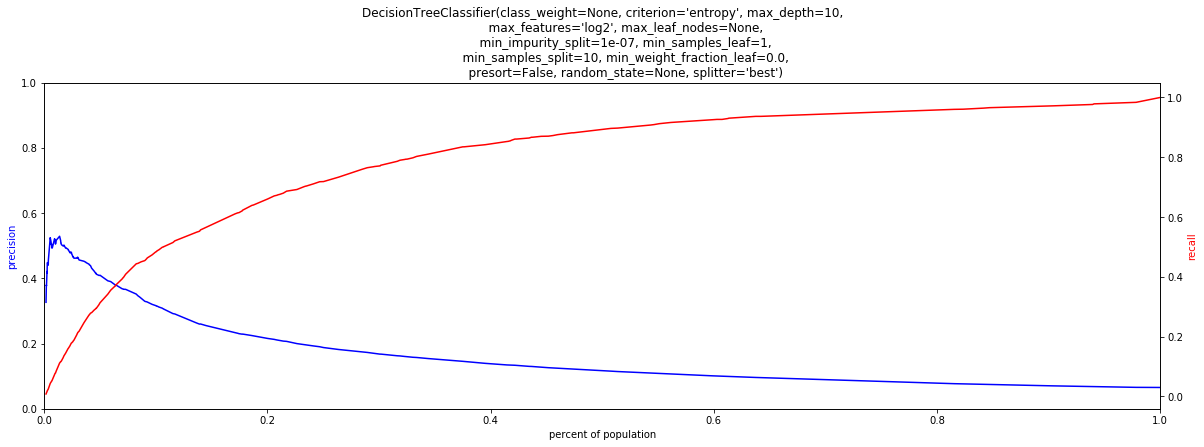

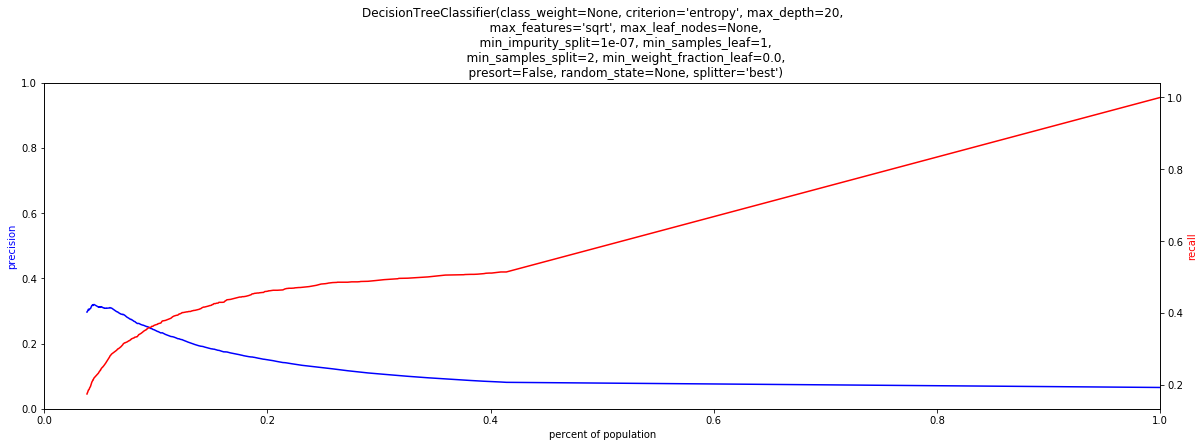

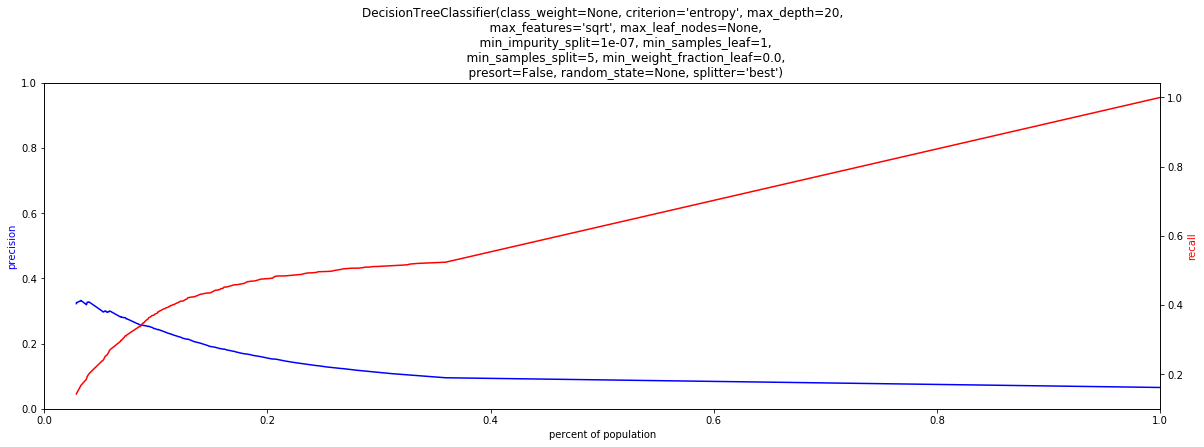

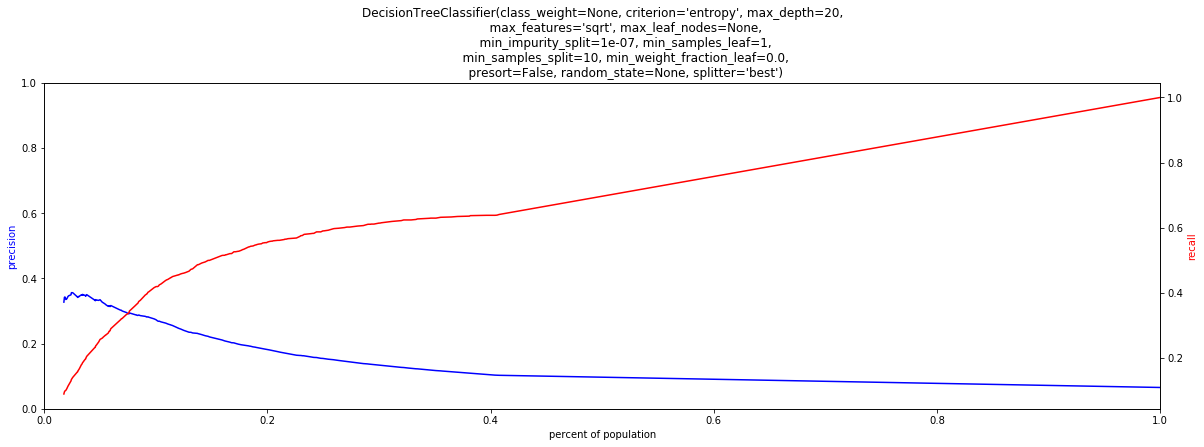

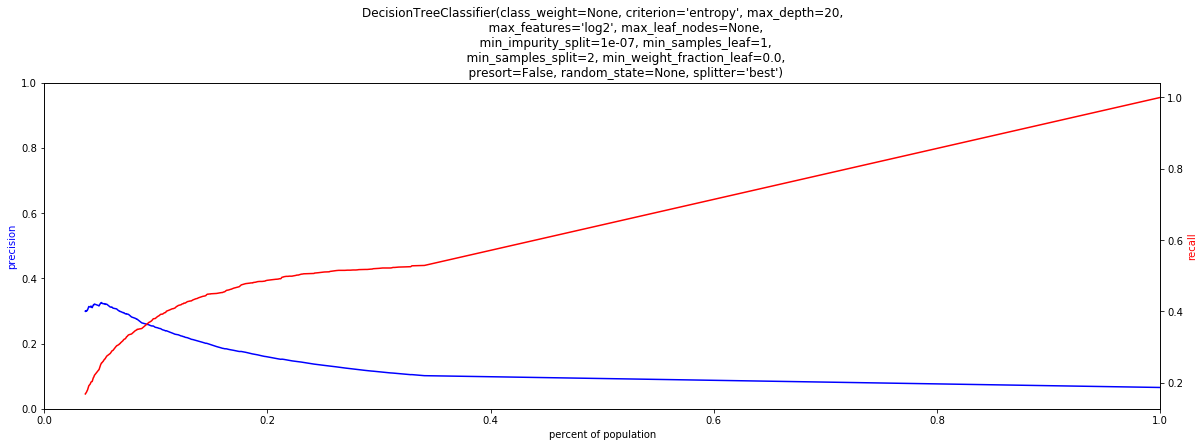

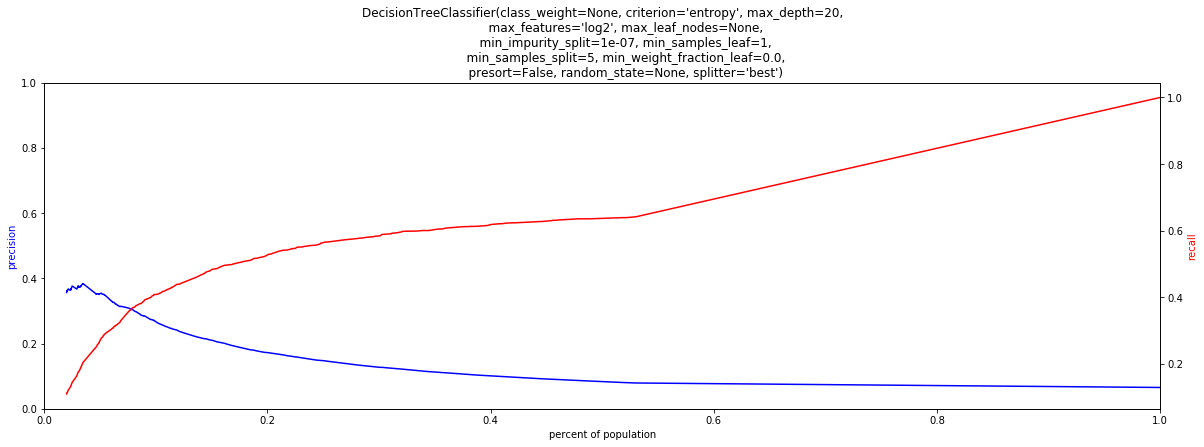

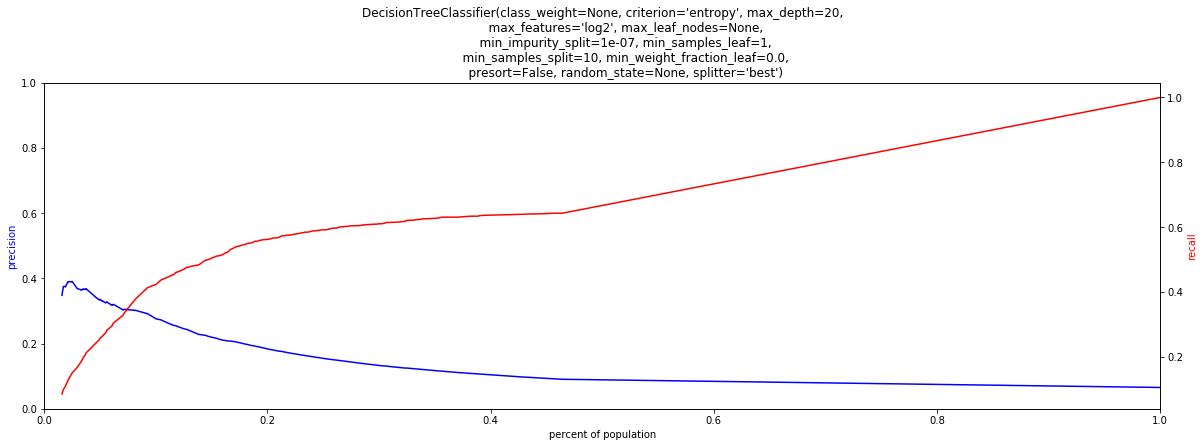

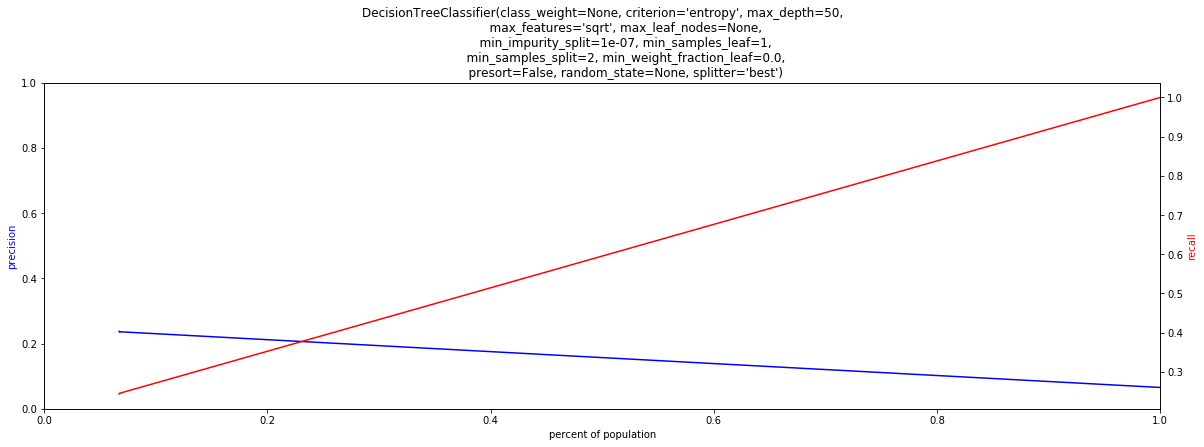

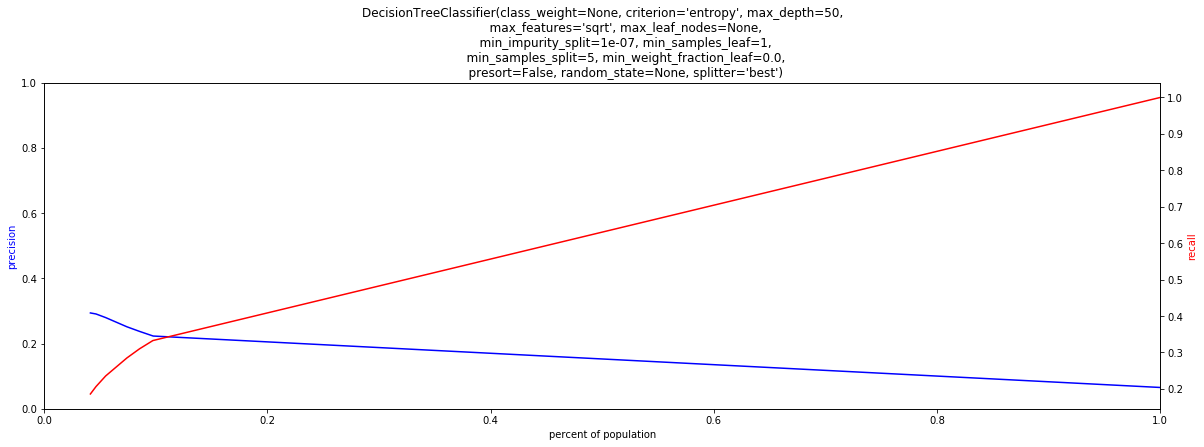

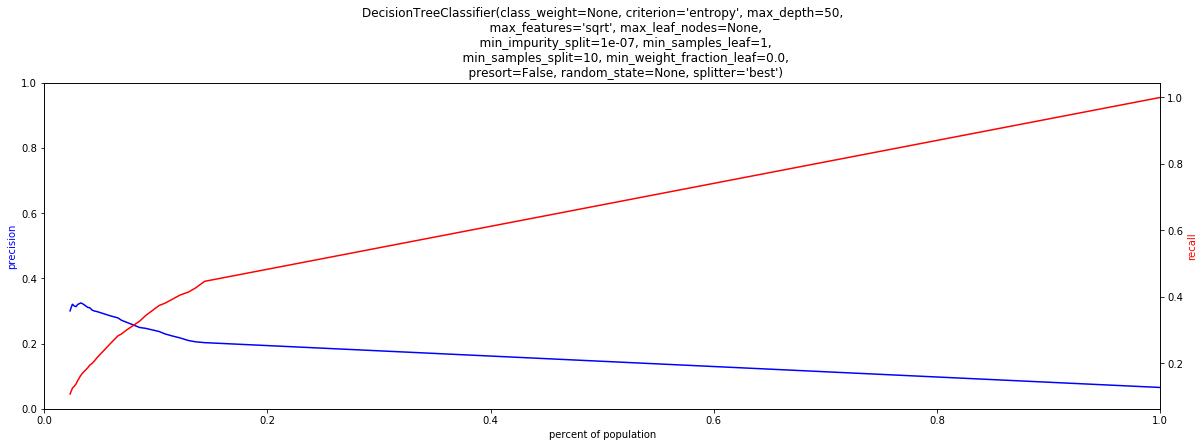

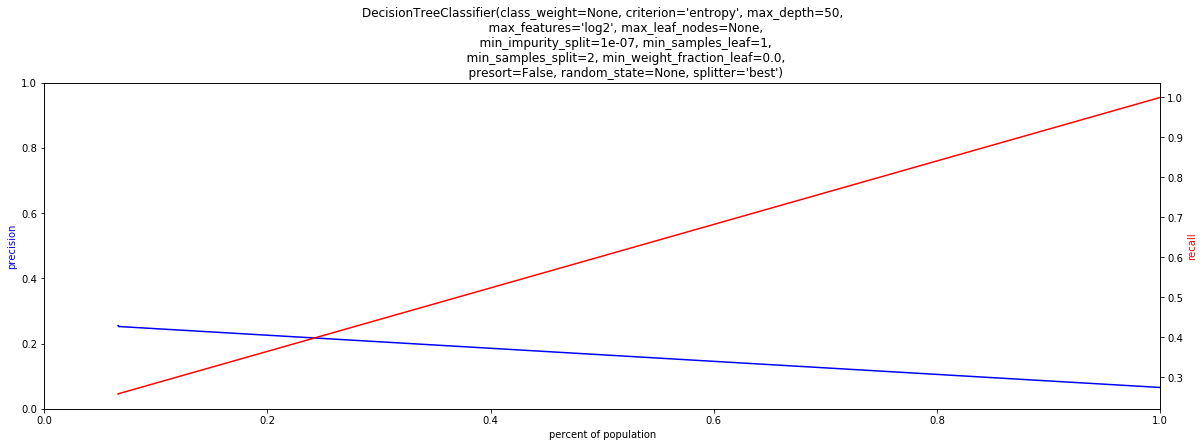

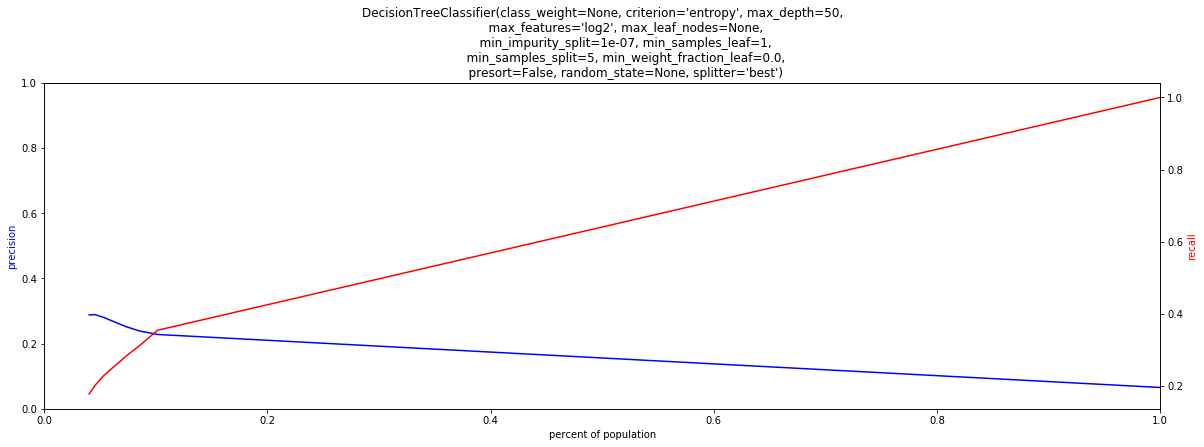

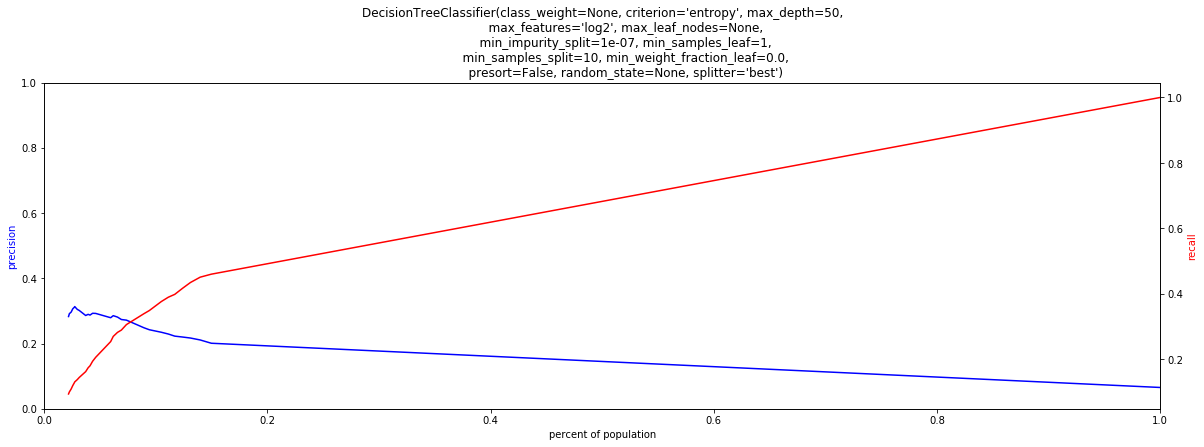

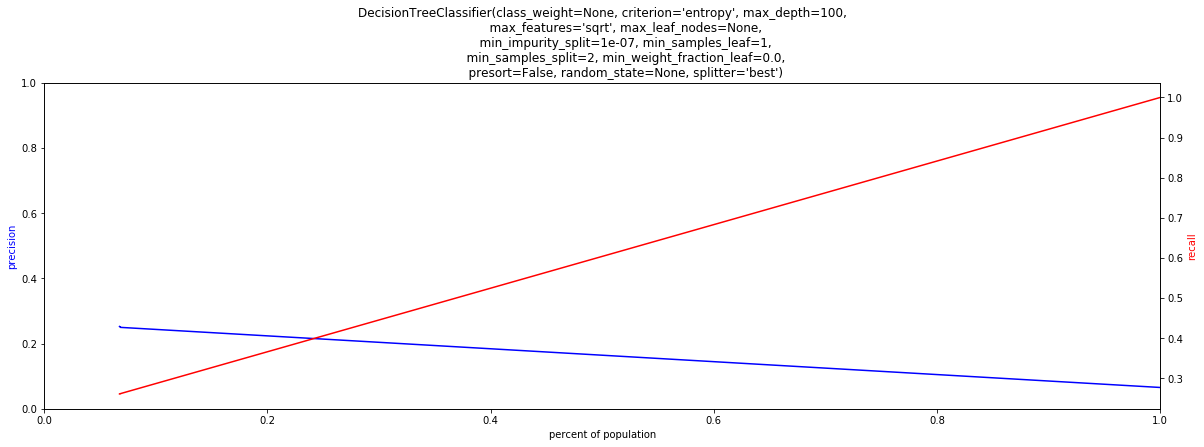

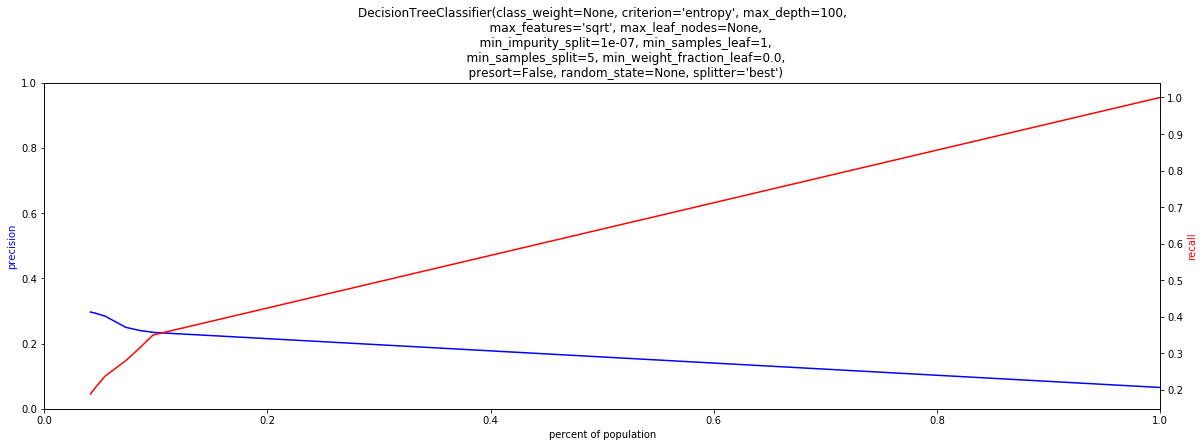

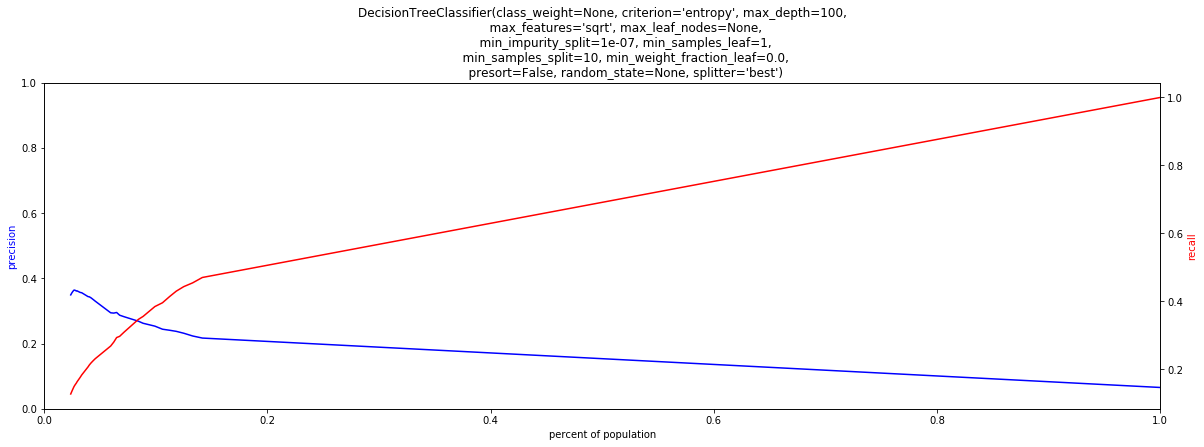

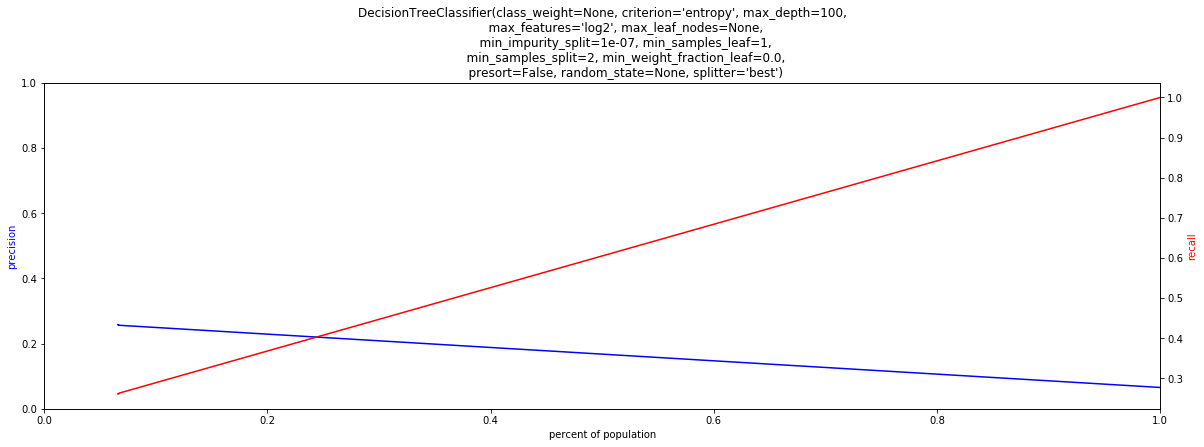

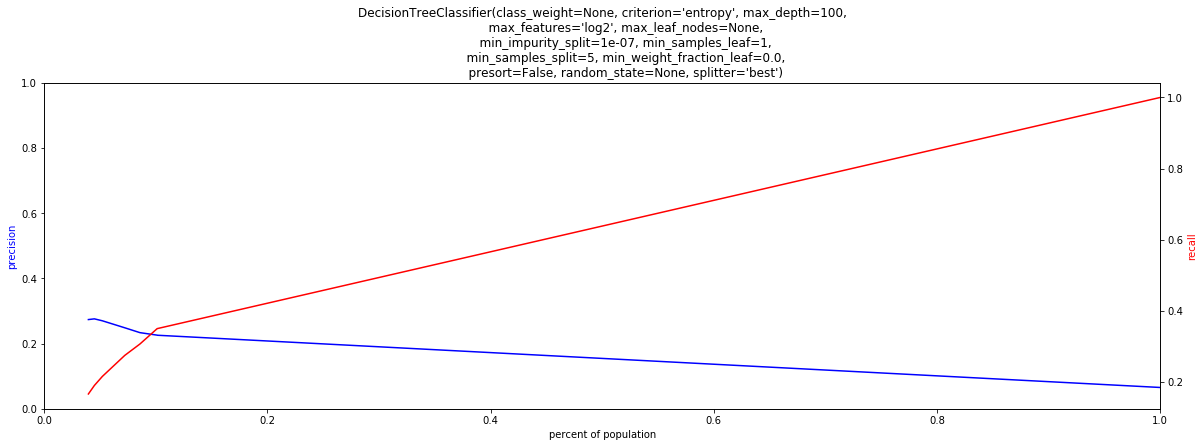

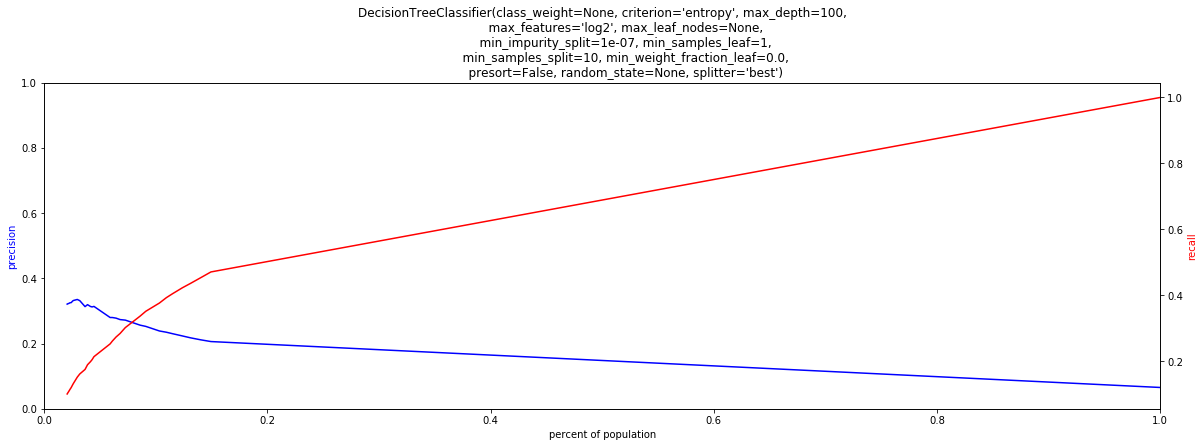

KNN


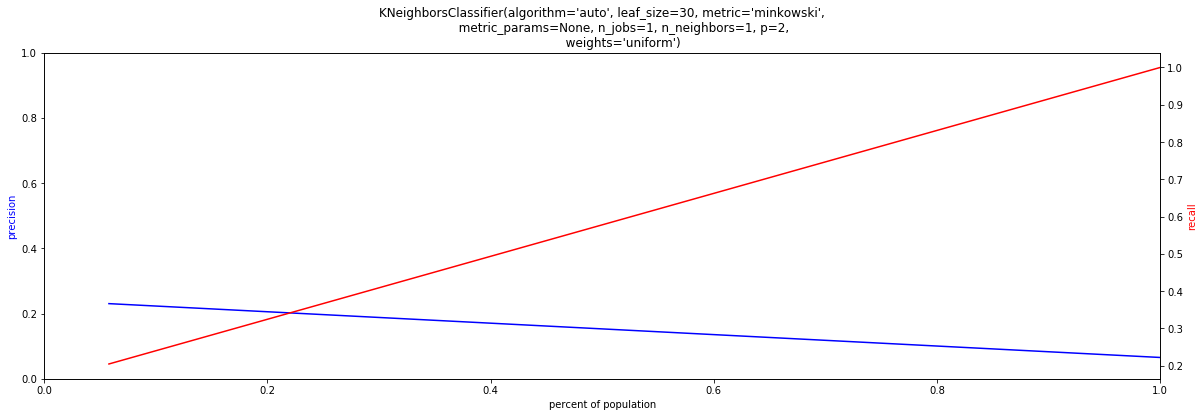

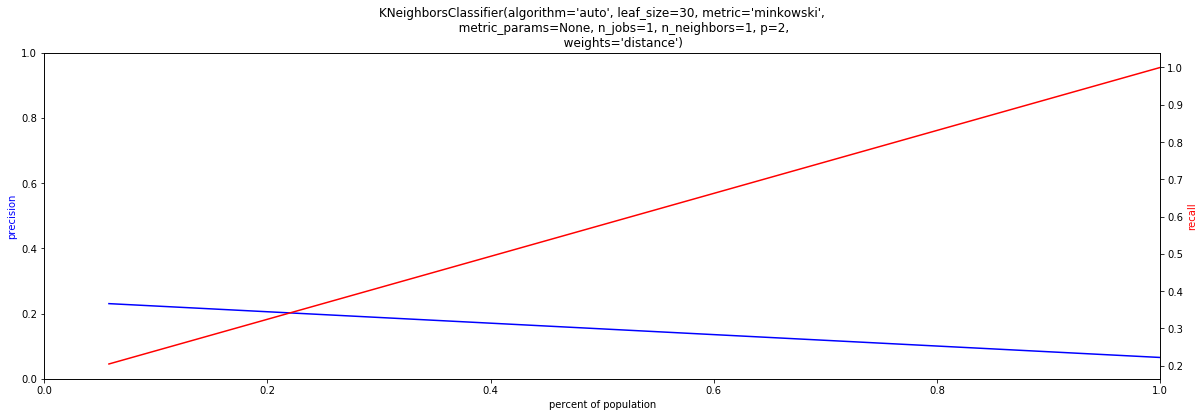

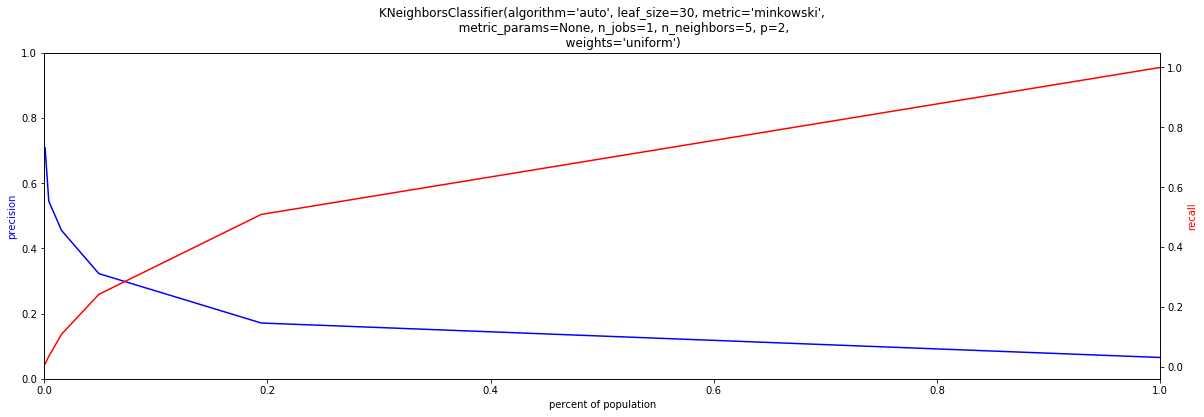

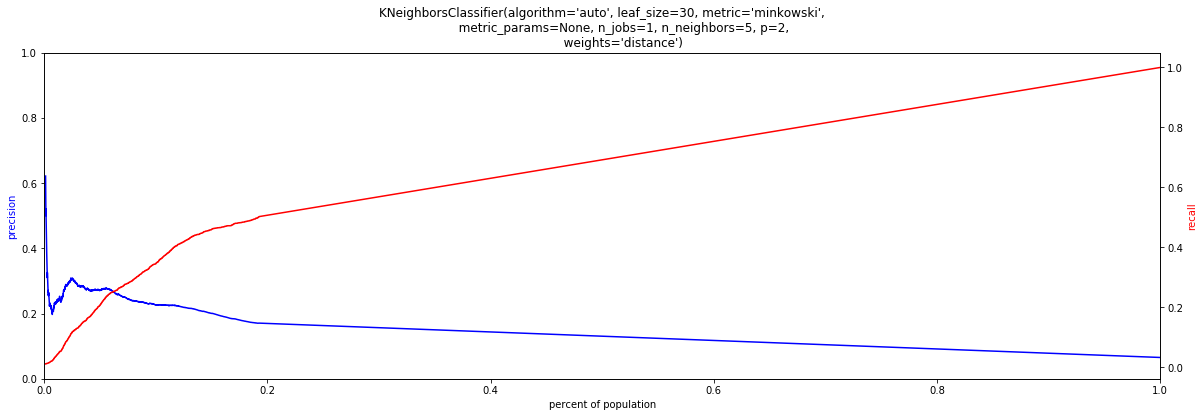

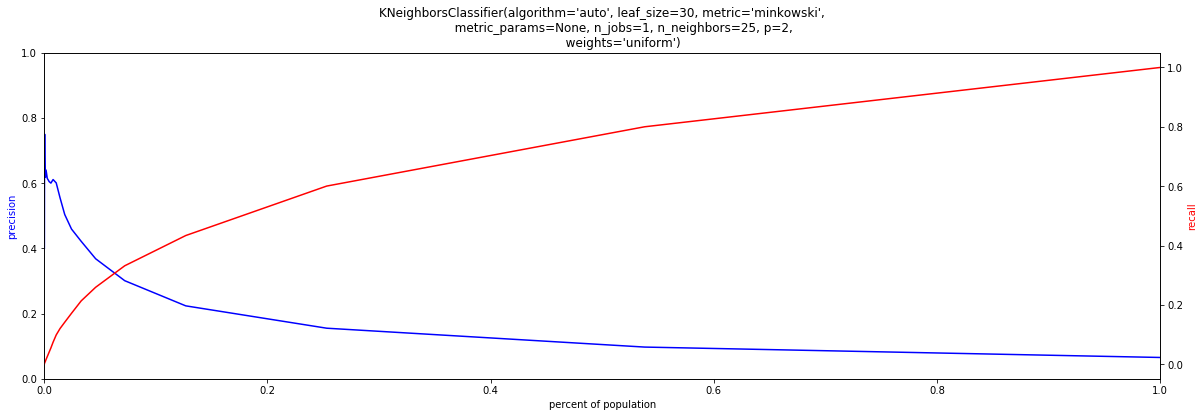

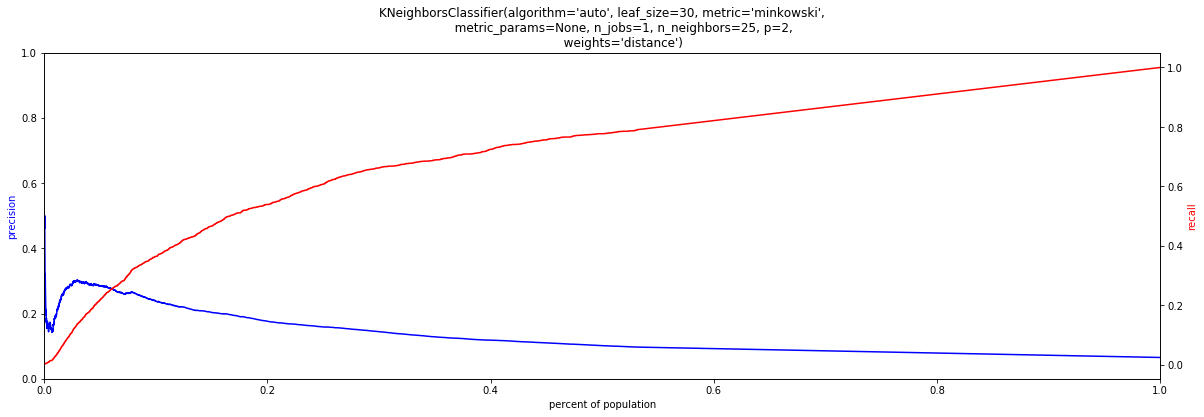

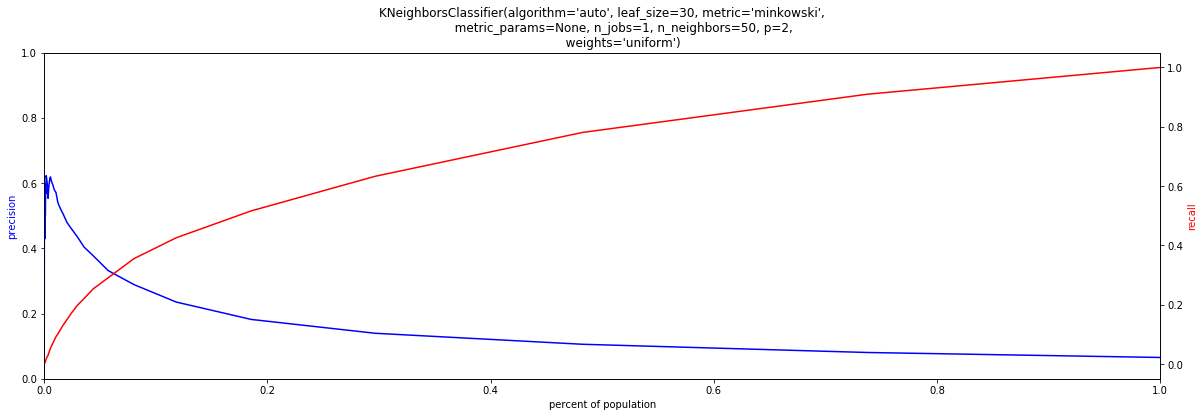

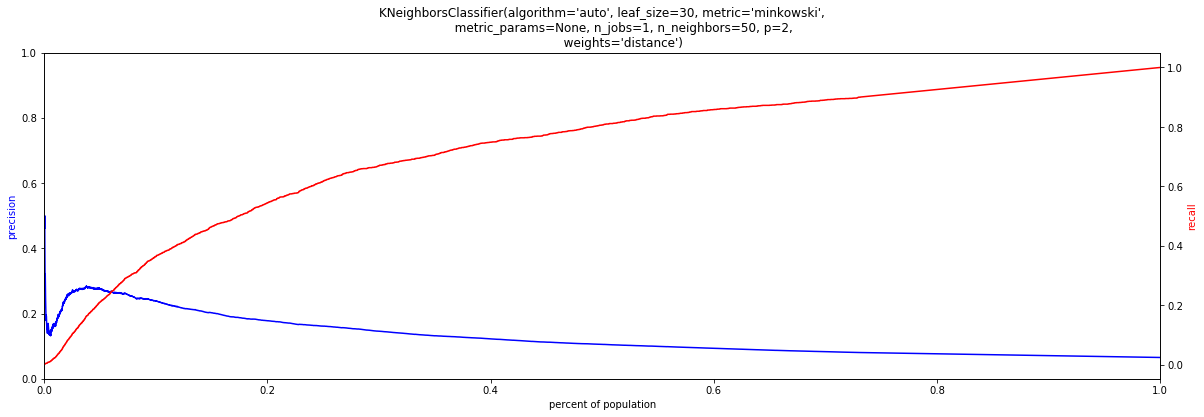

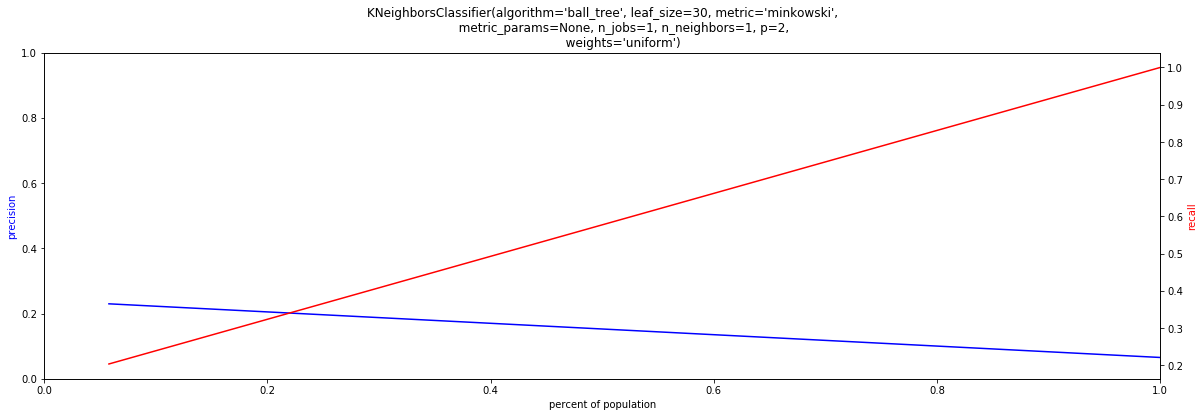

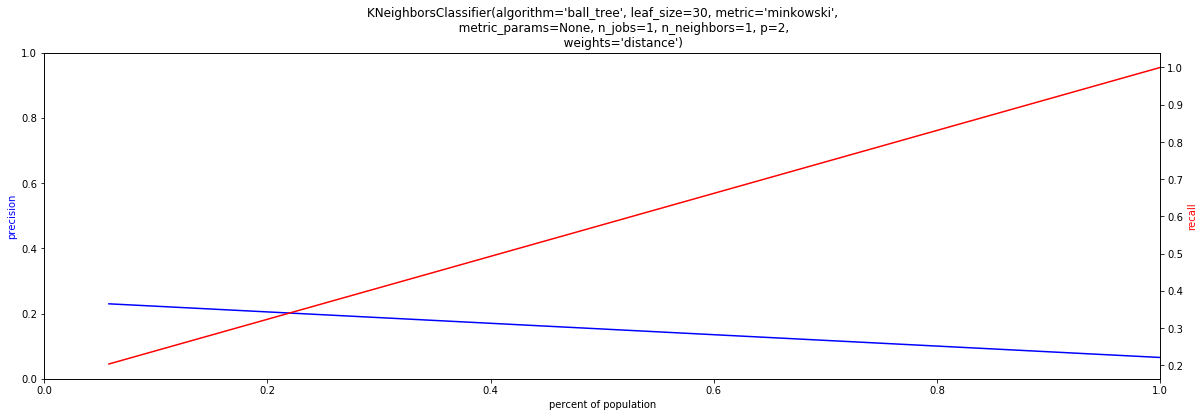

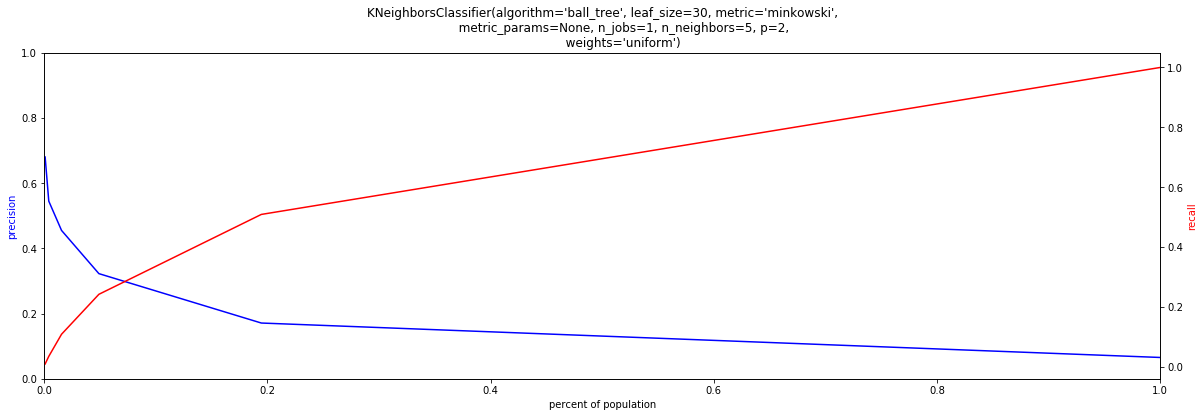

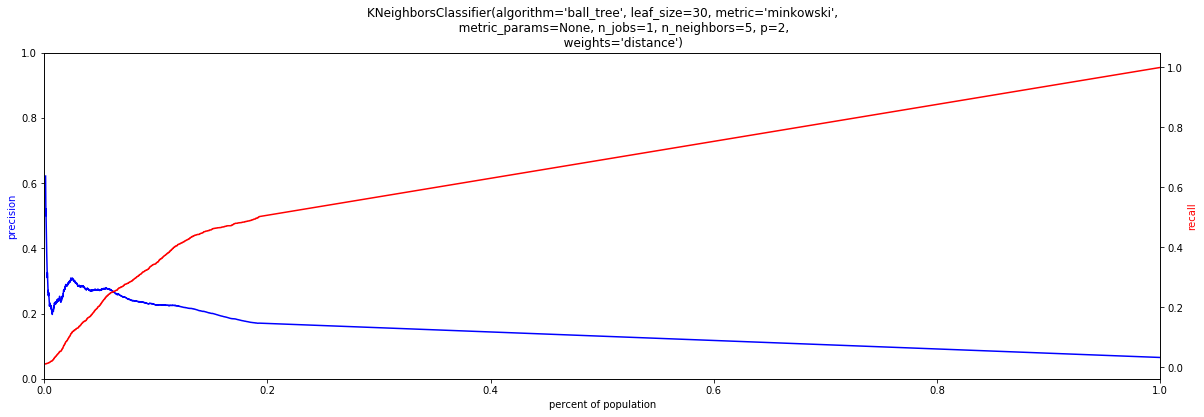

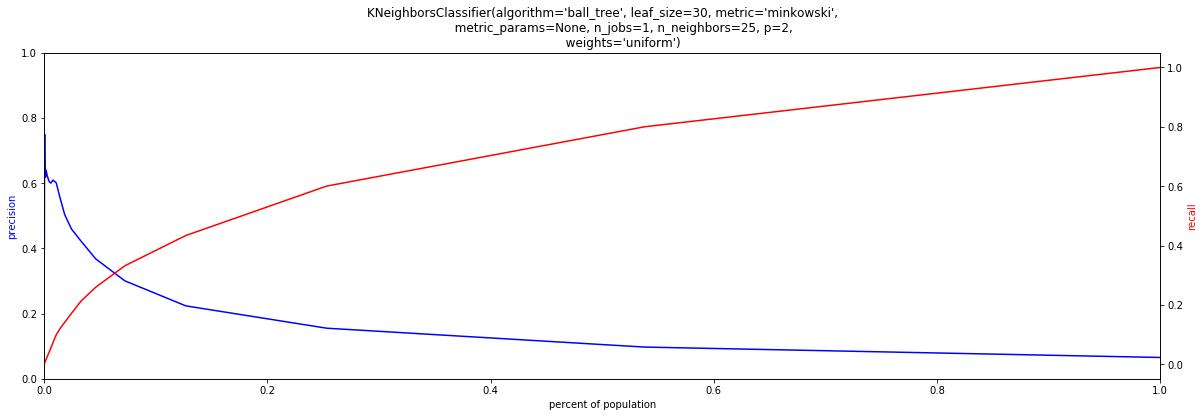

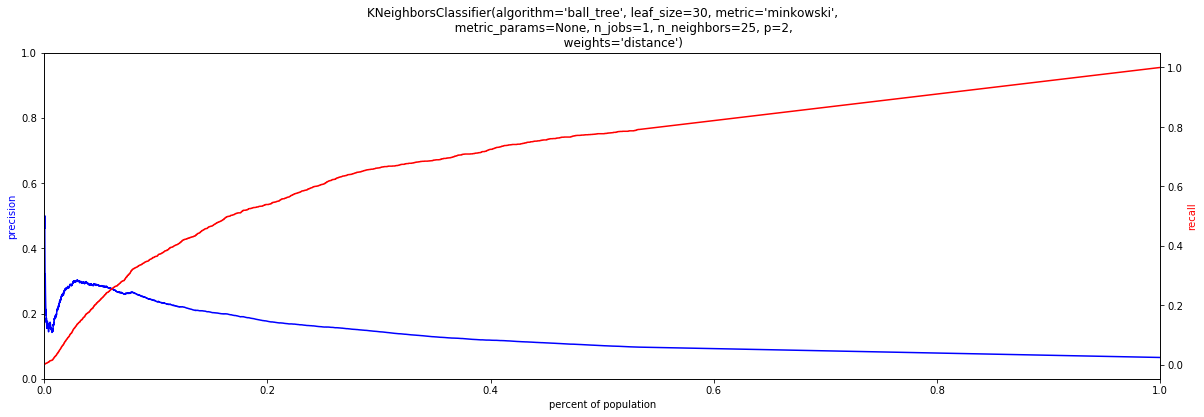

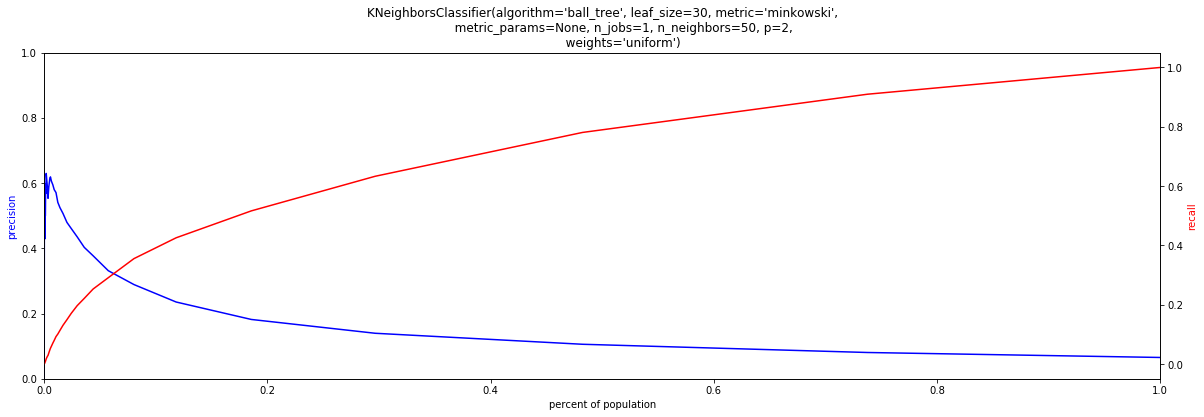

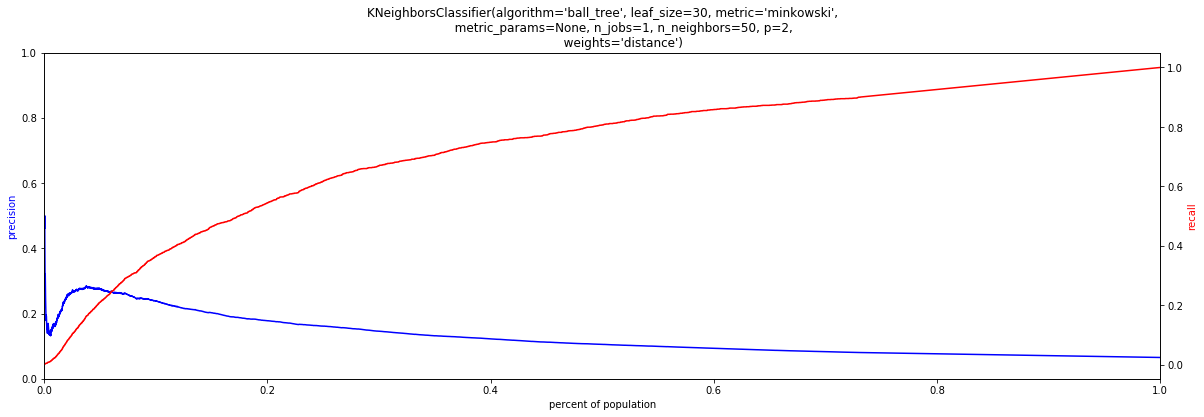

ET


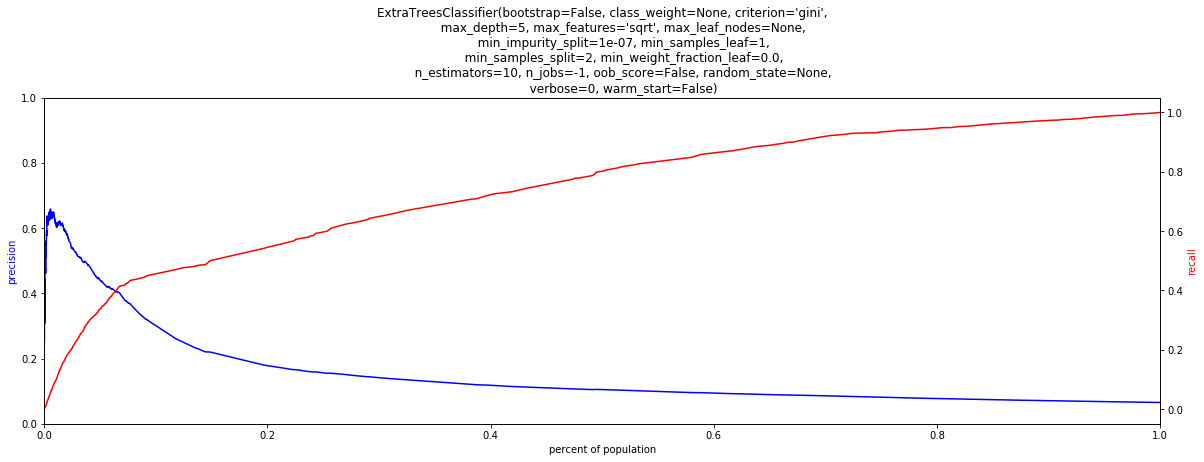

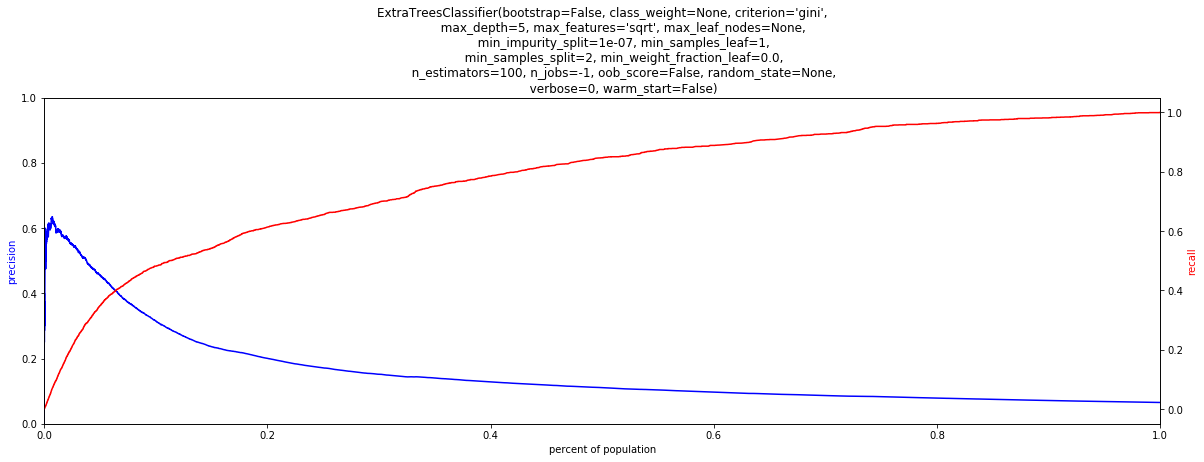

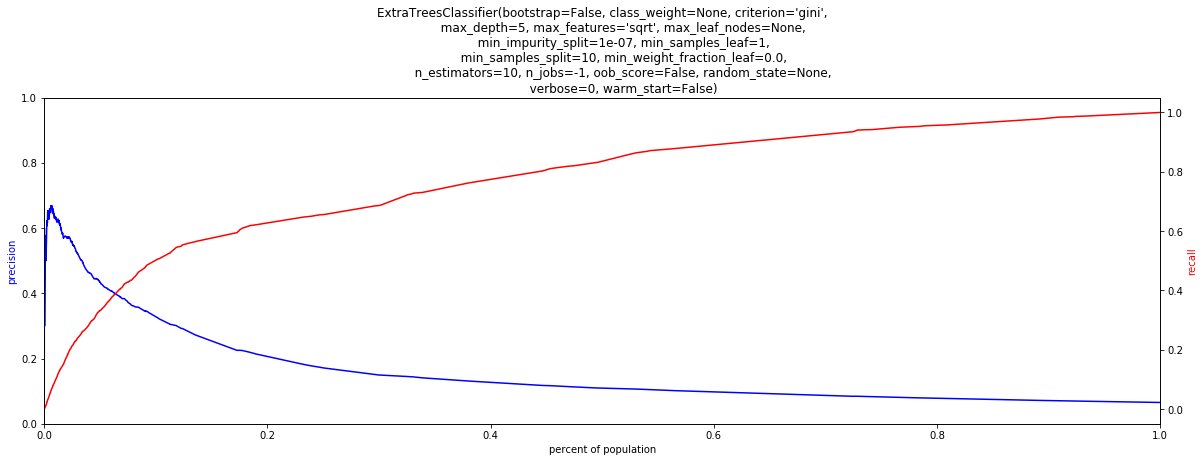

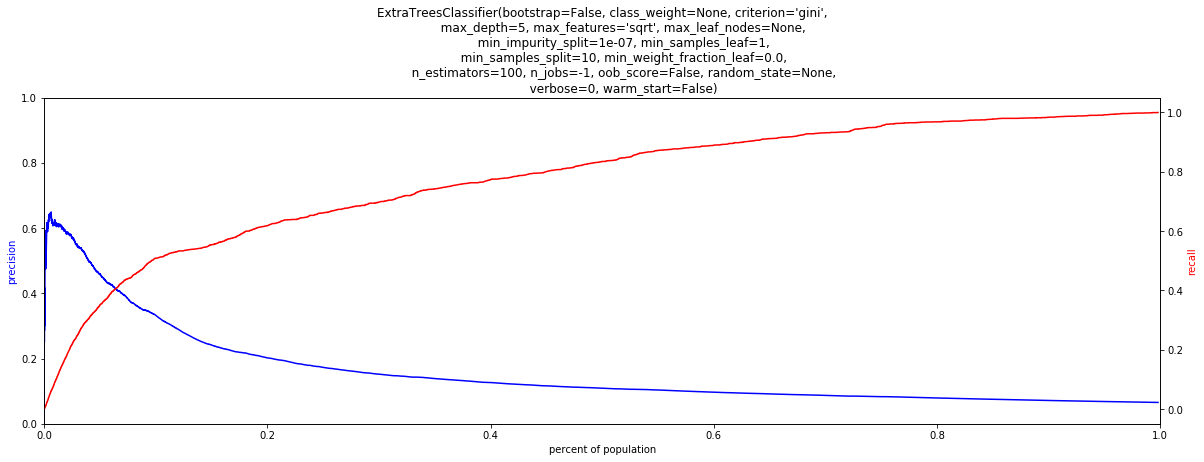

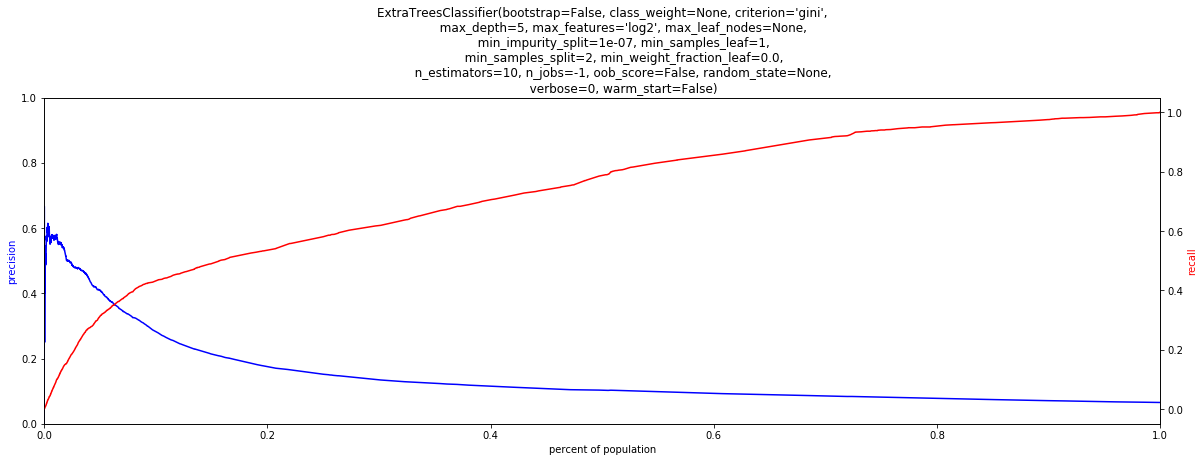

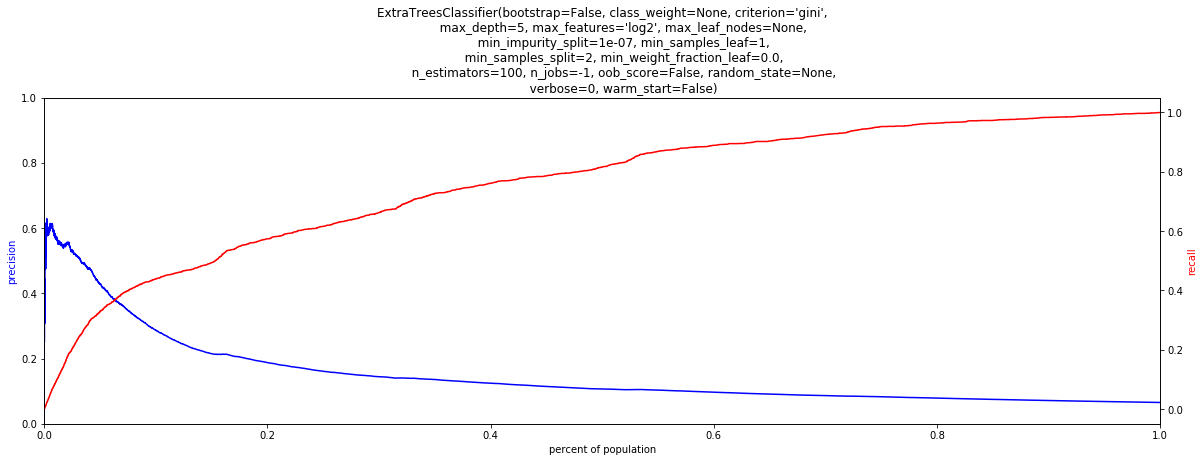

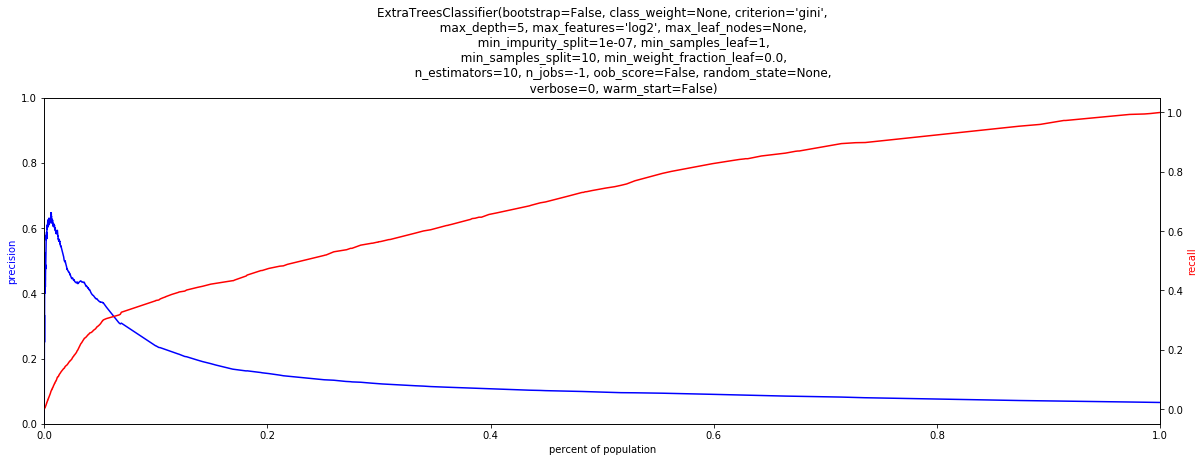

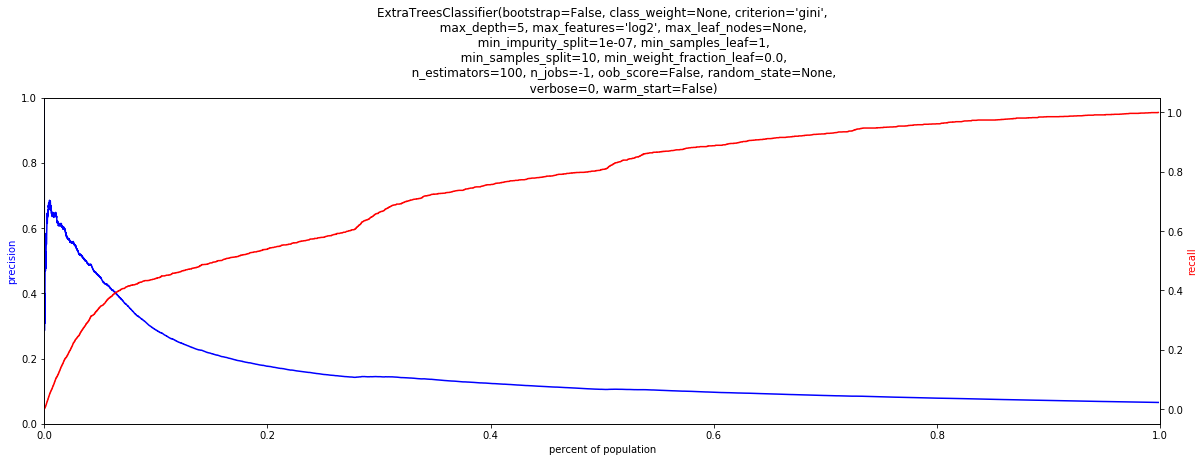

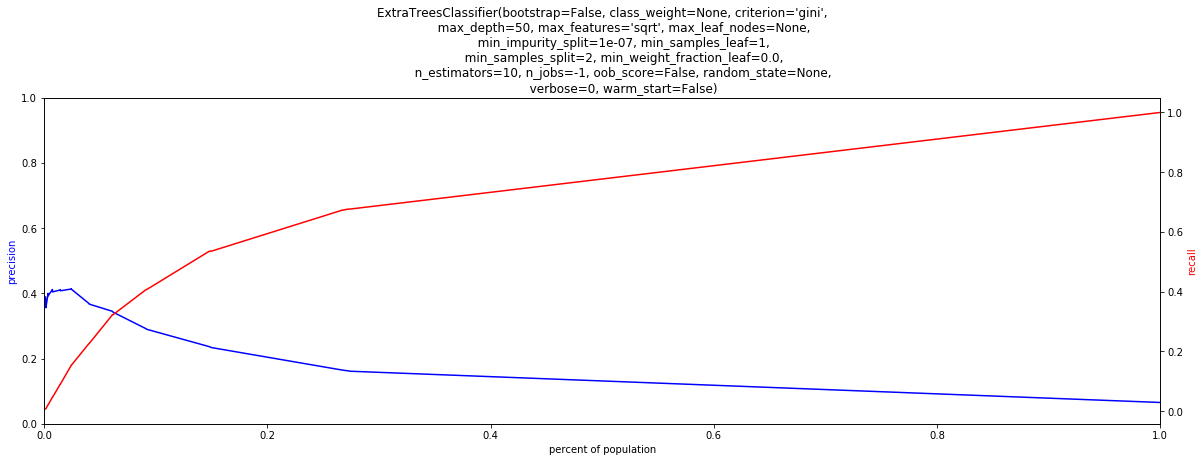

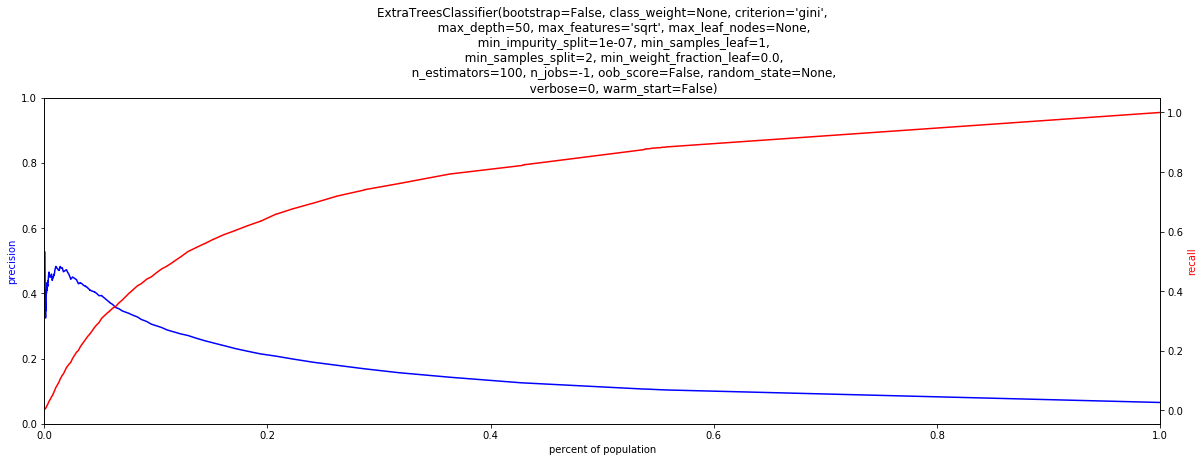

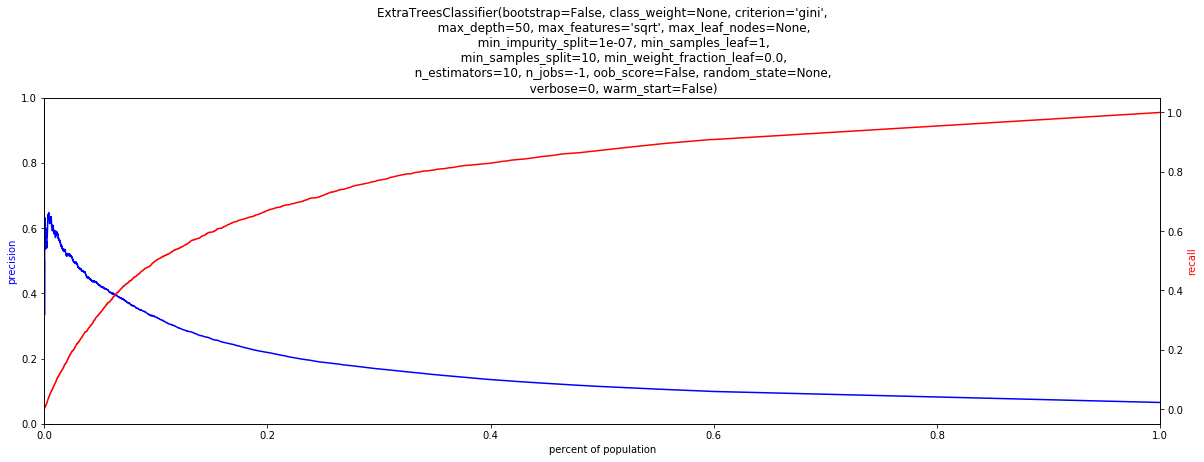

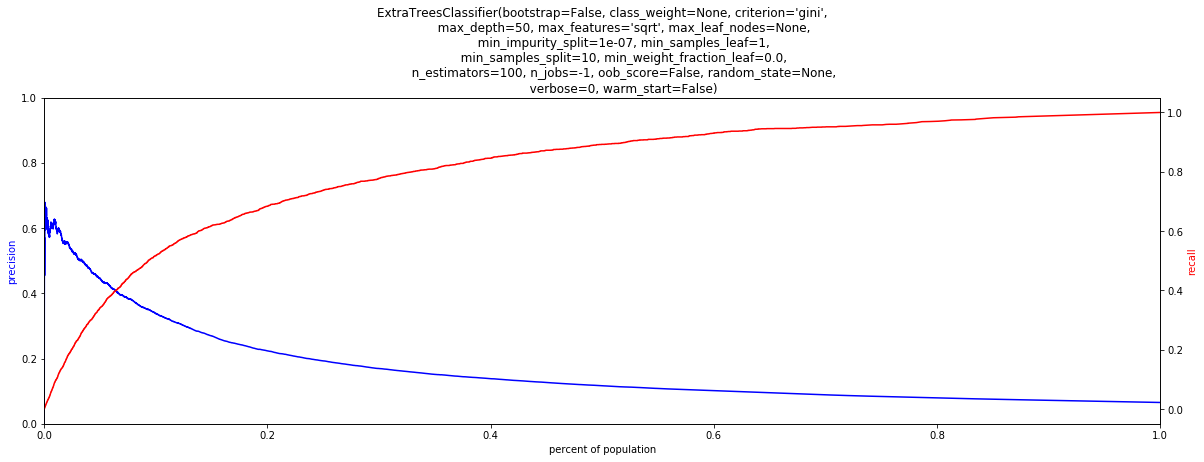

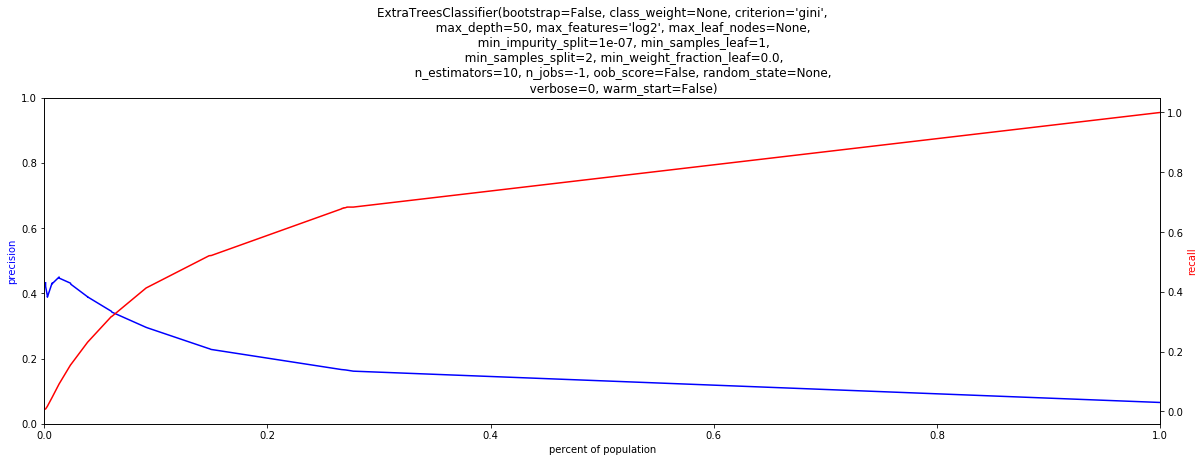

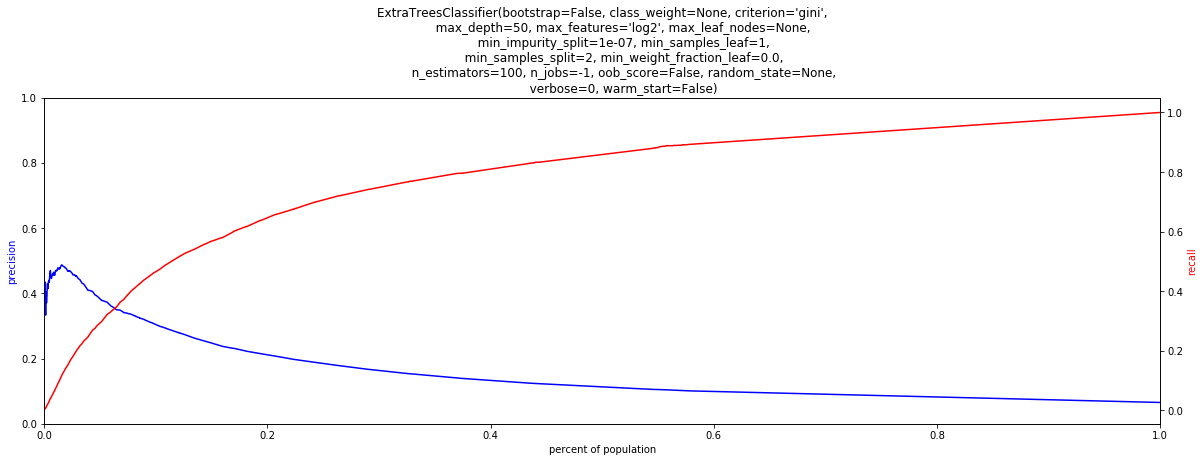

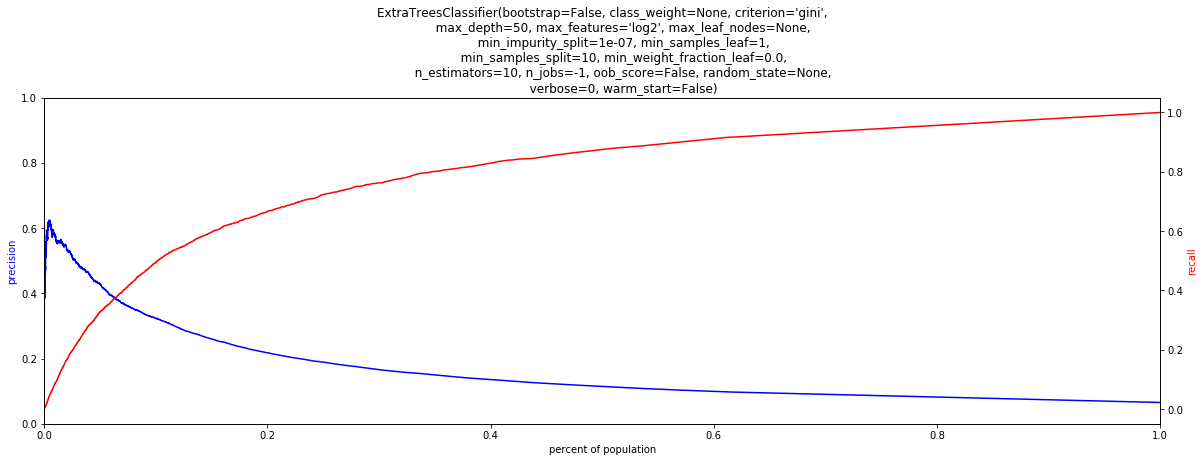

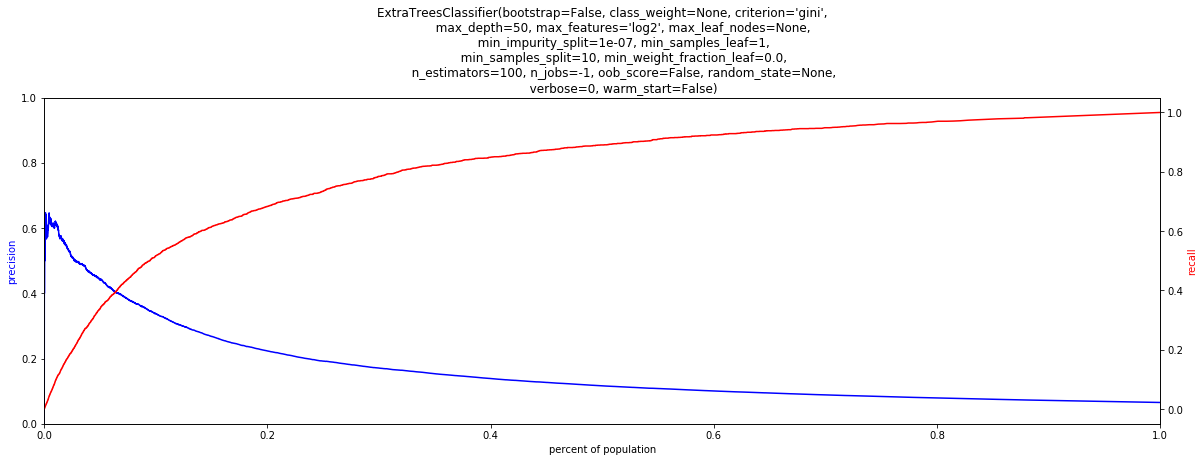

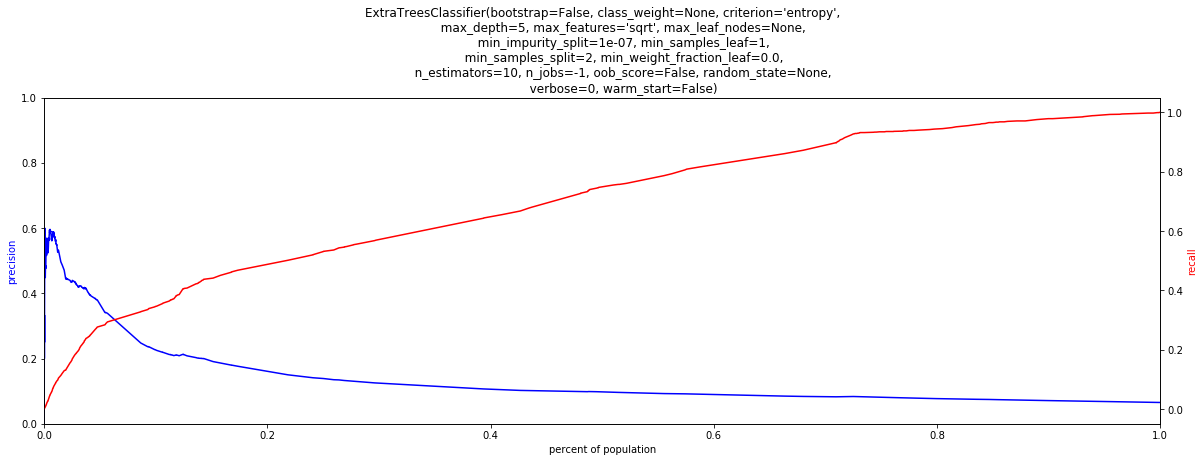

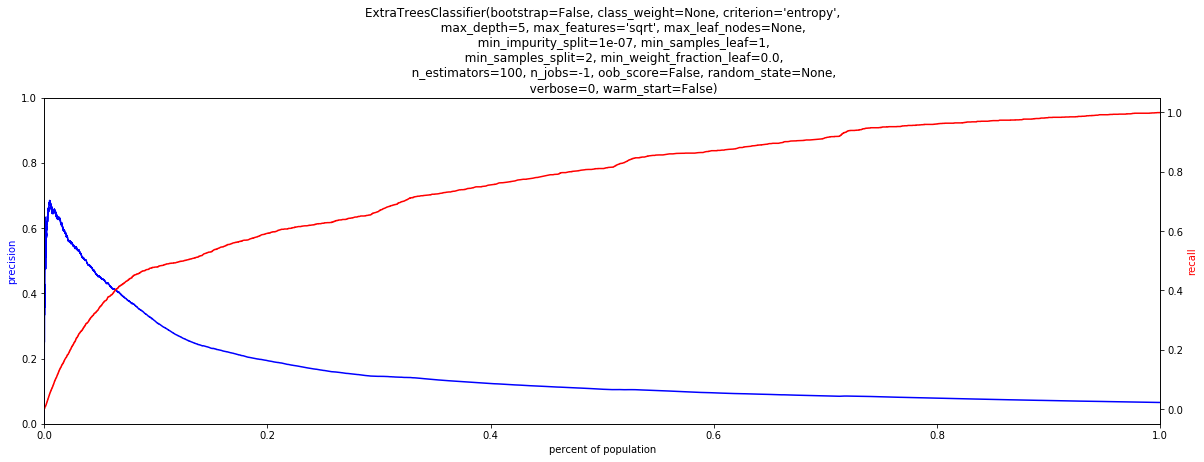

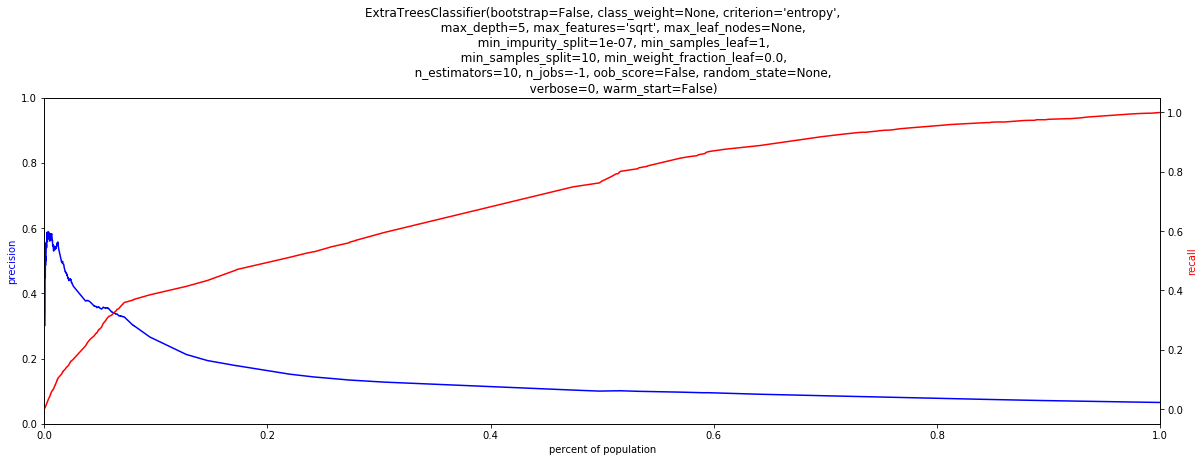

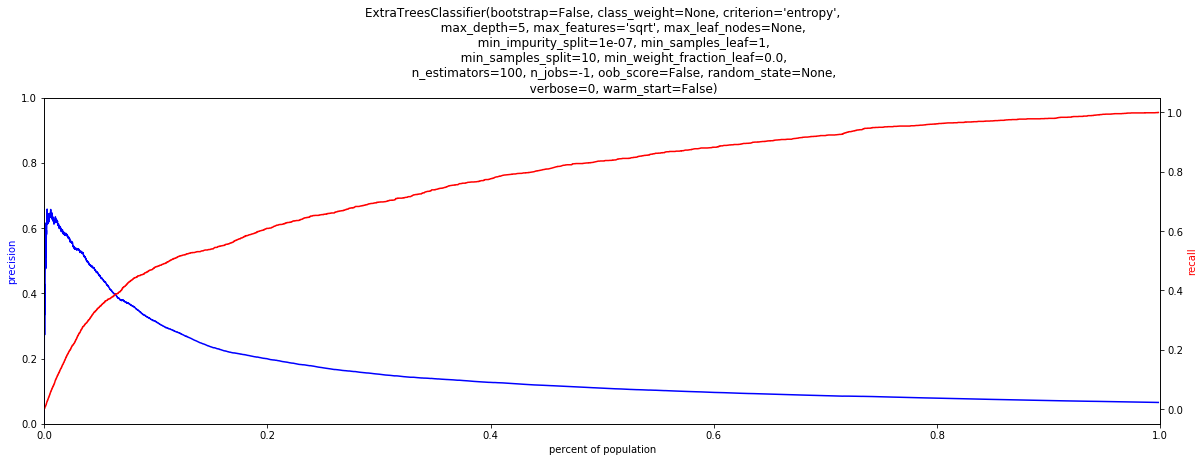

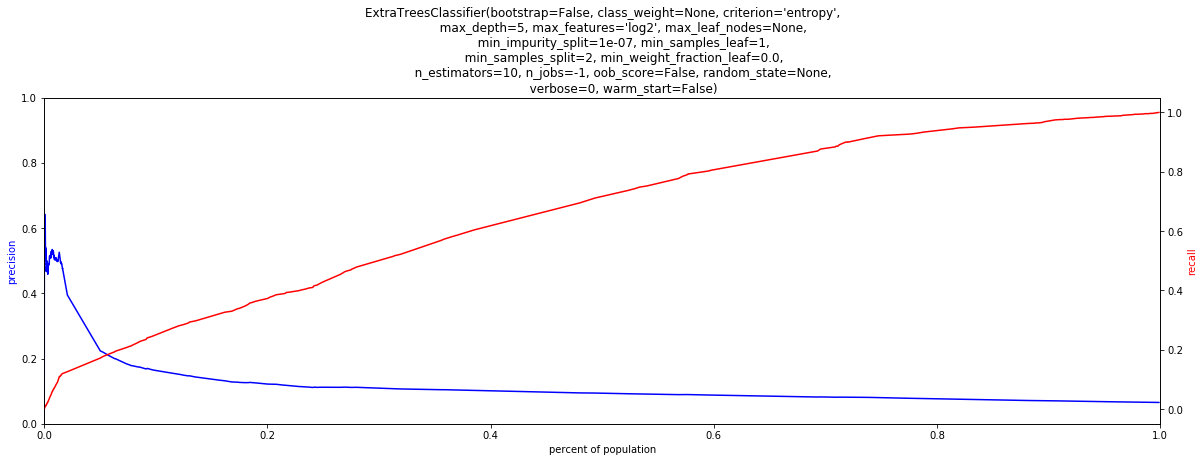

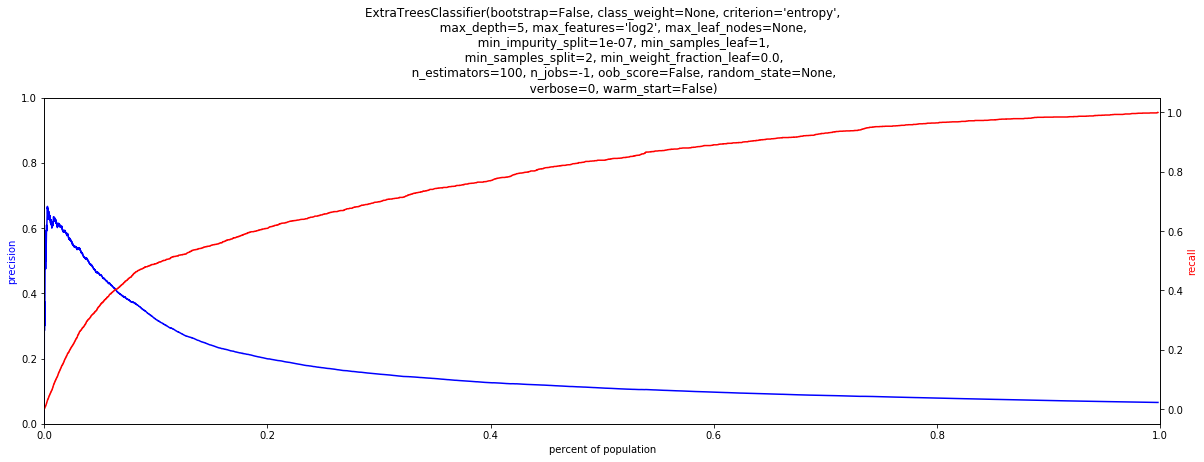

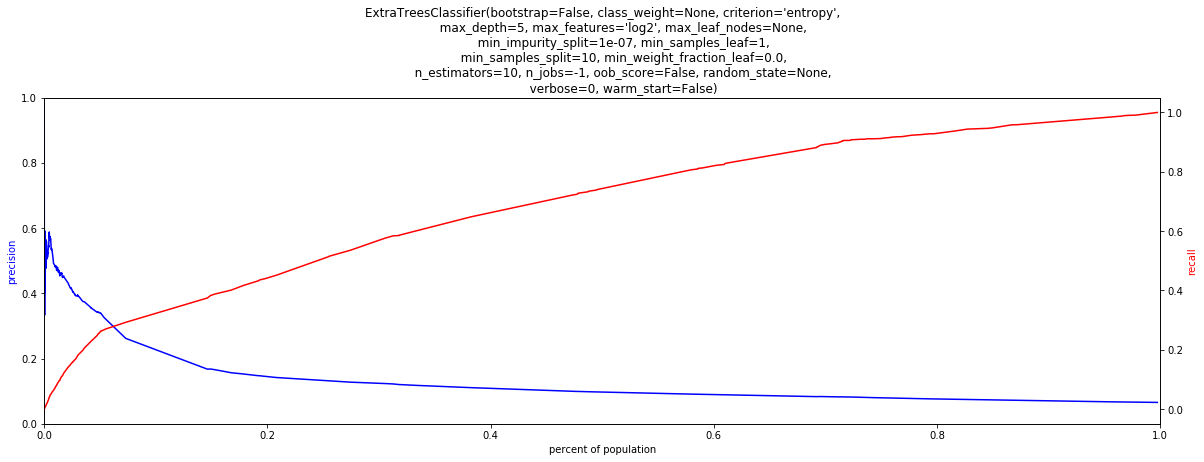

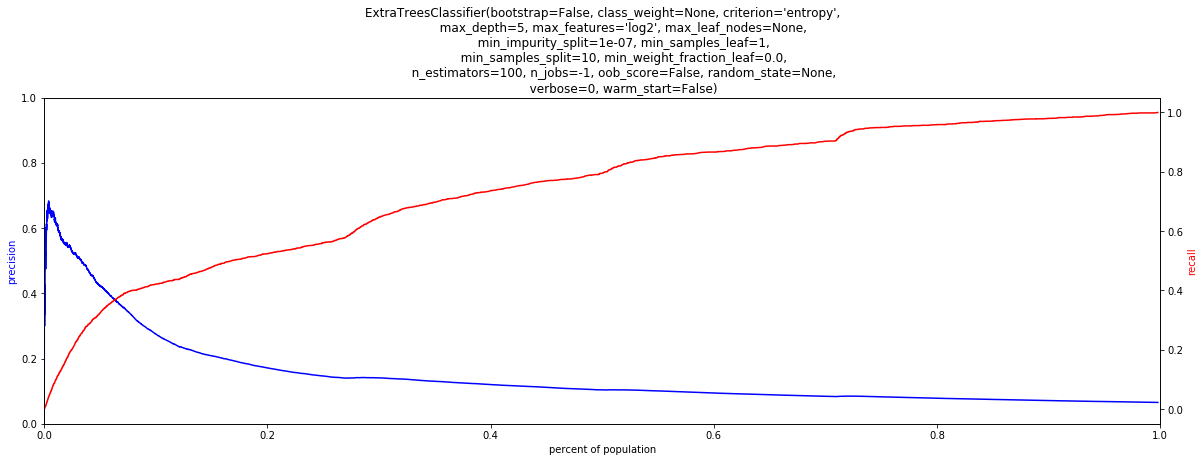

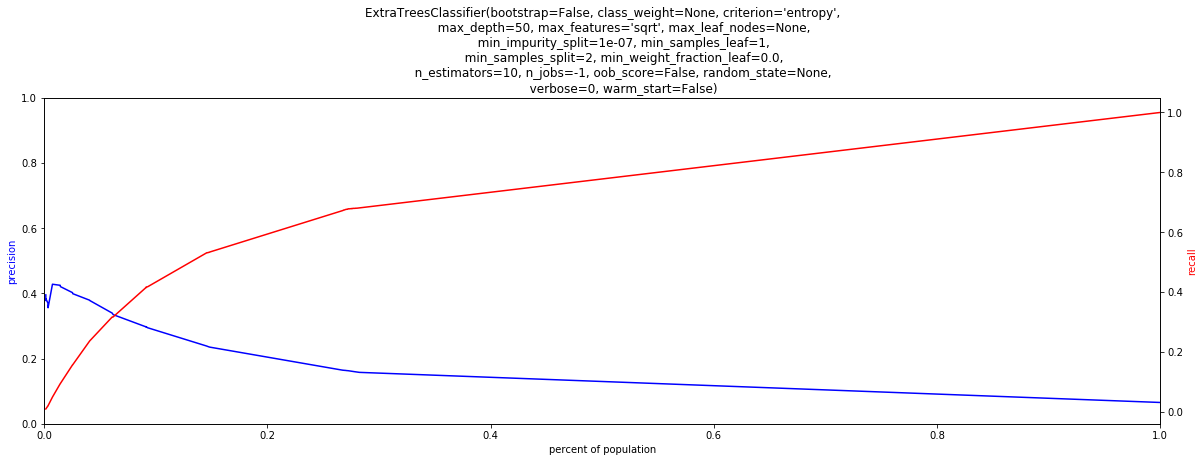

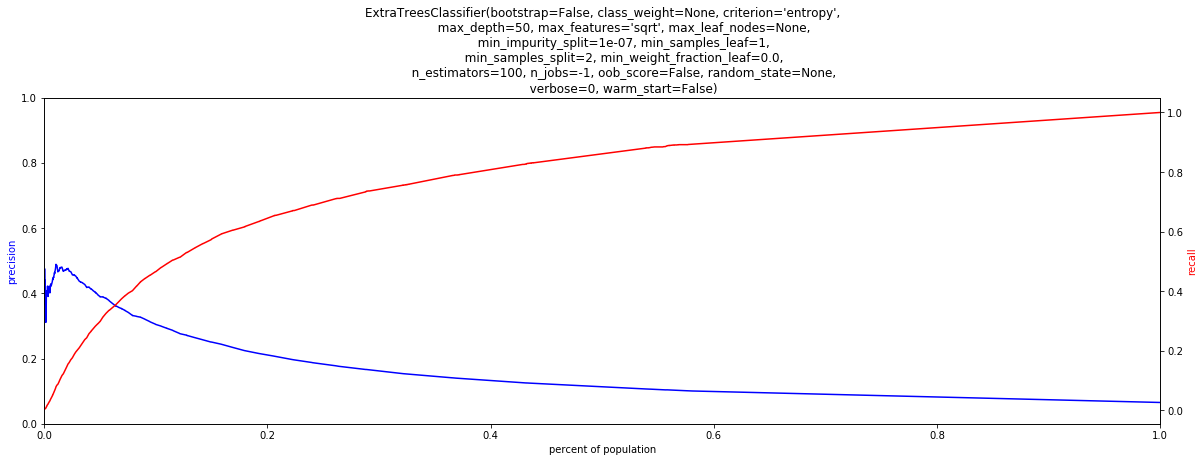

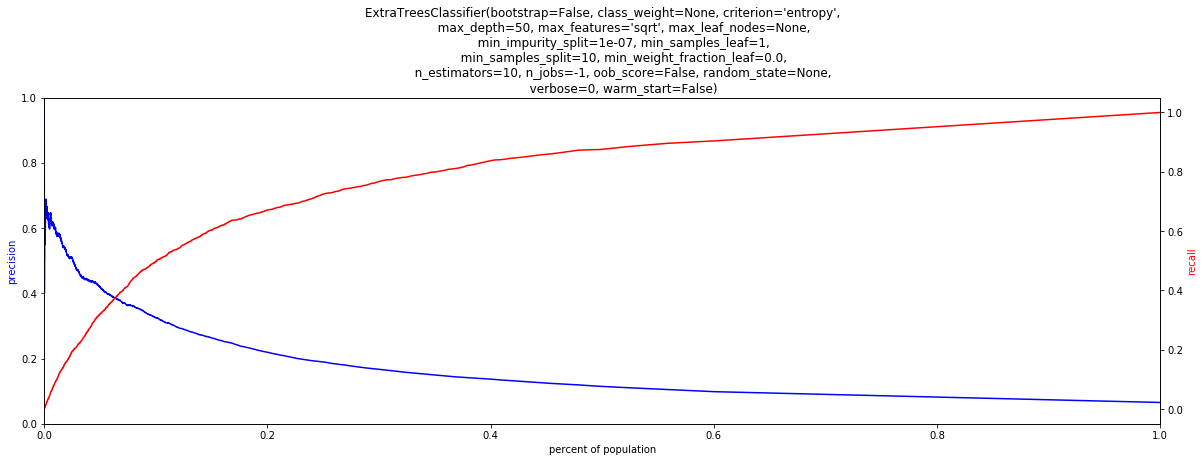

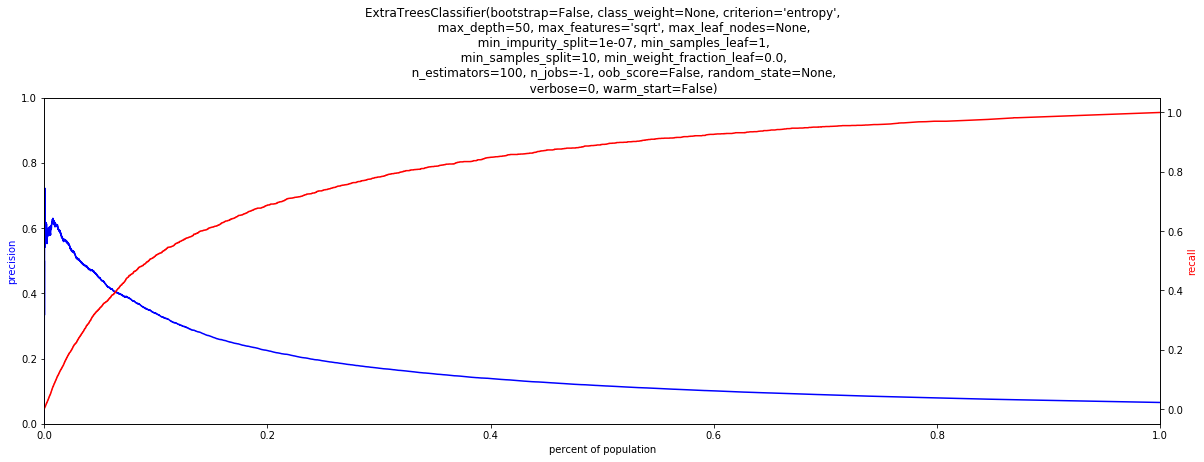

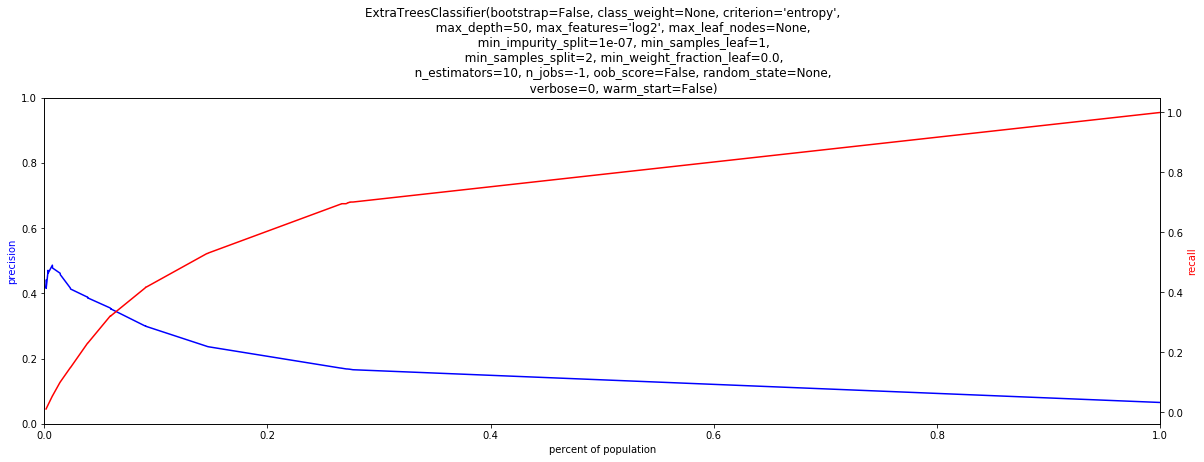

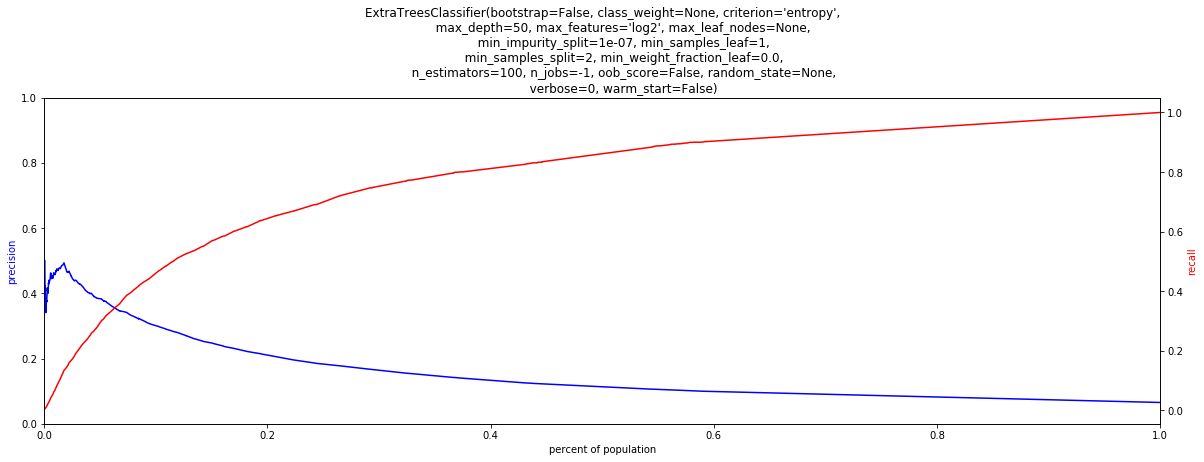

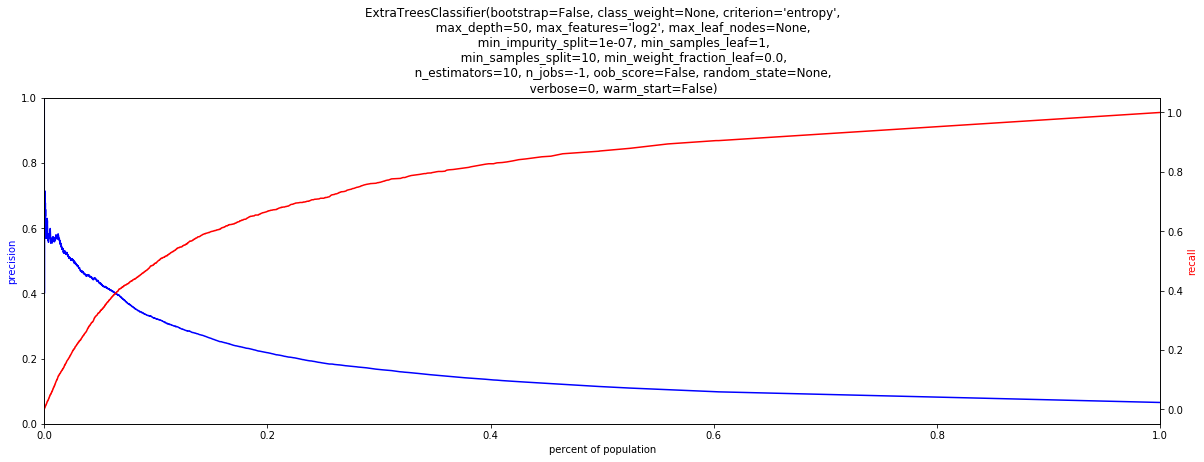

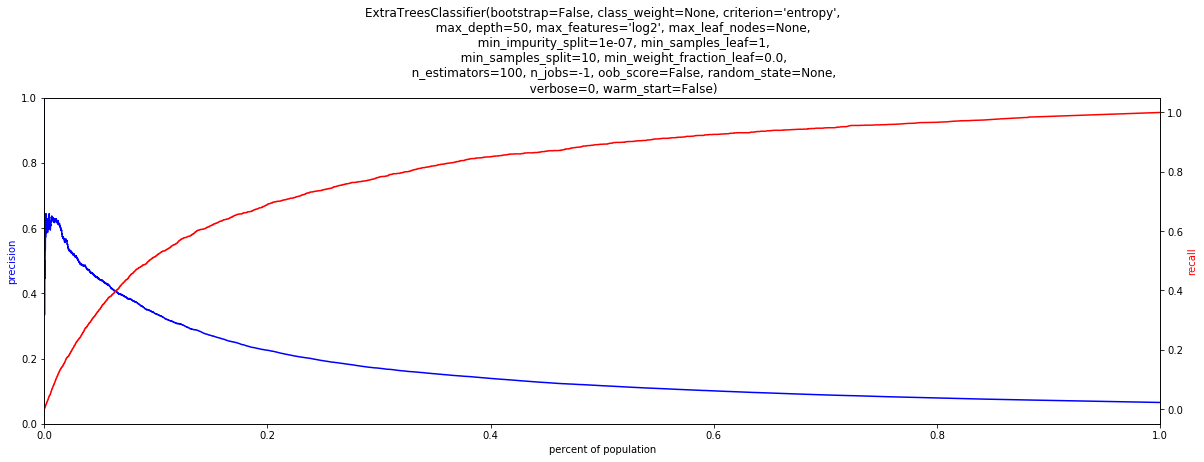

AB


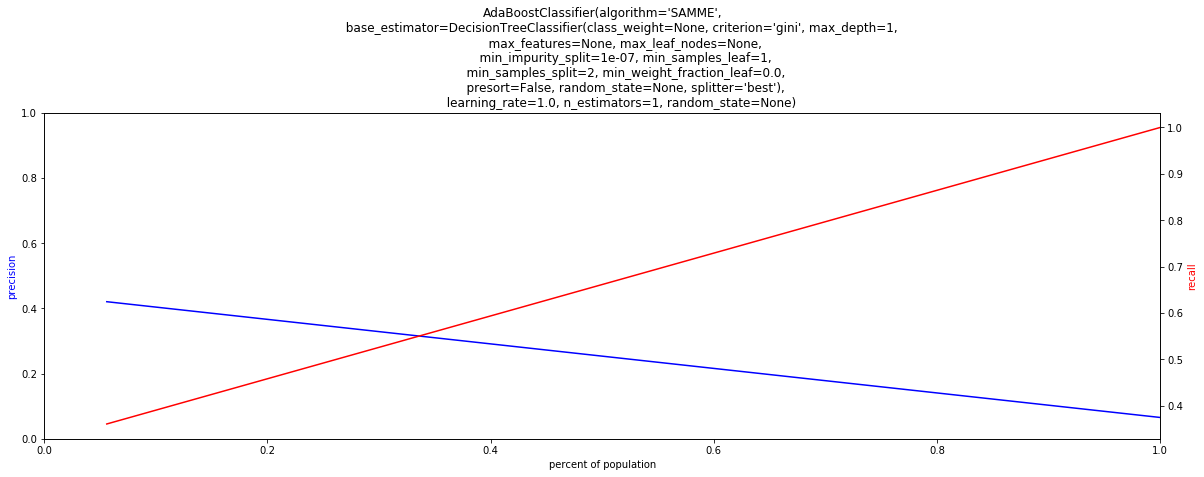

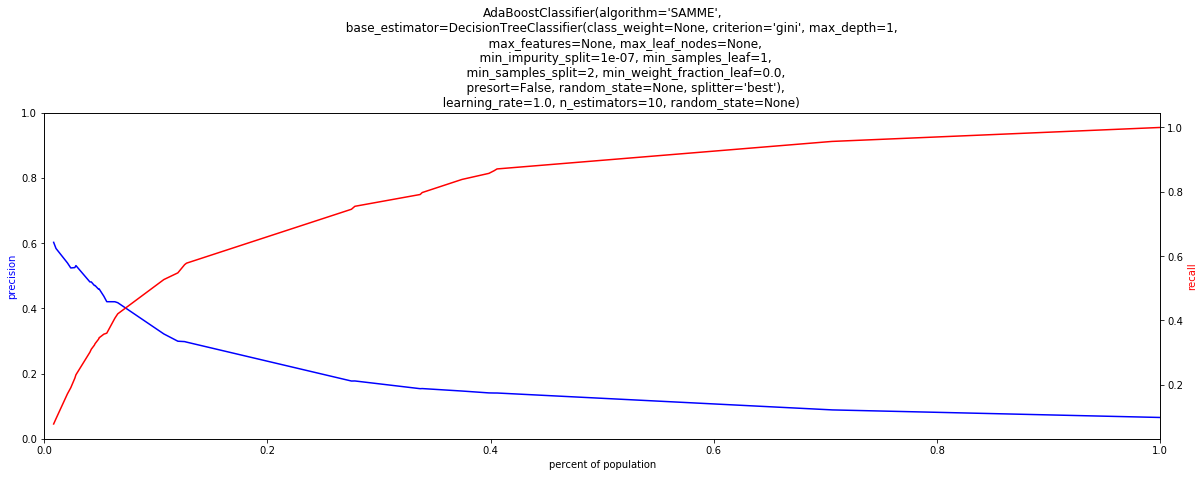

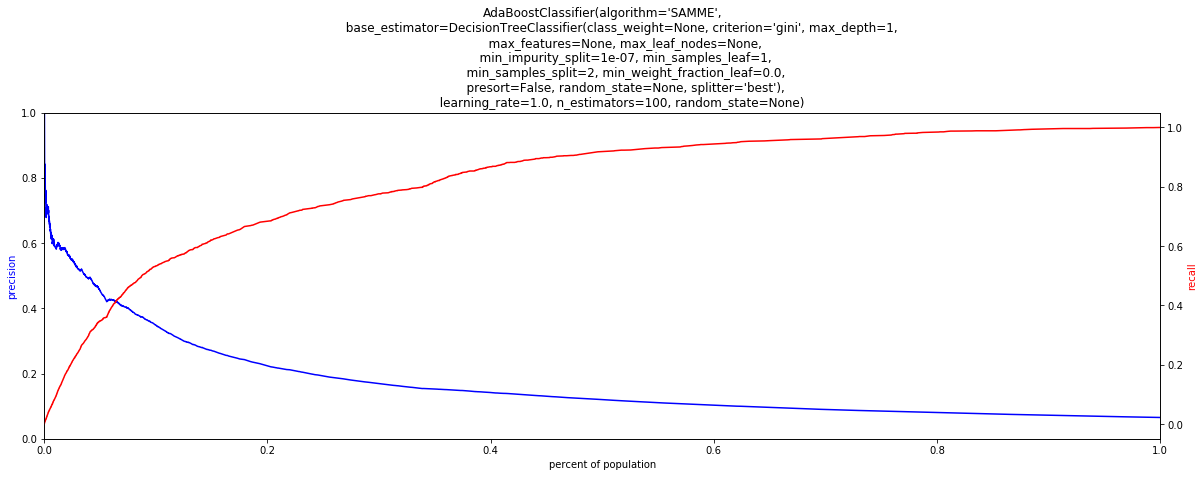

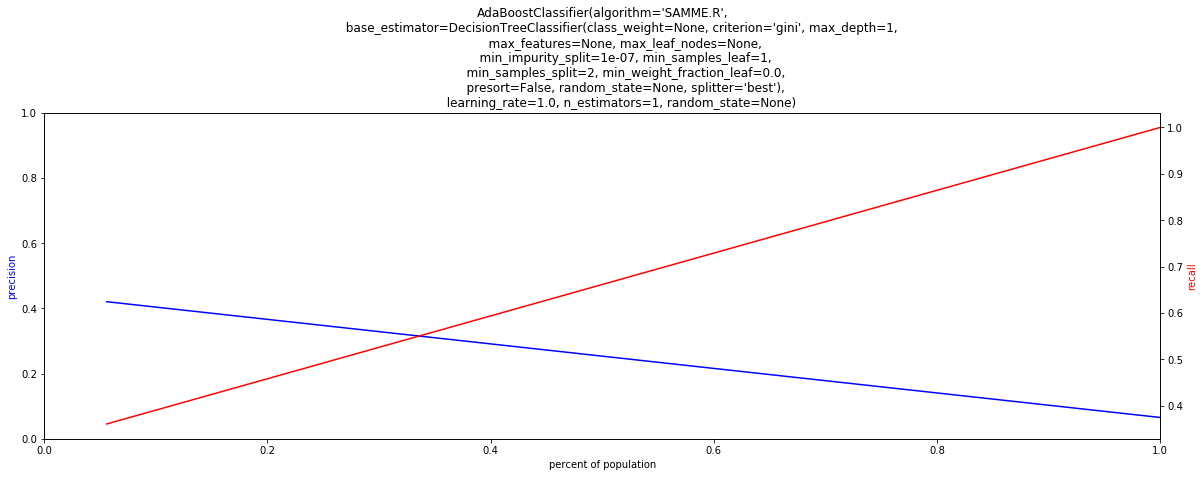

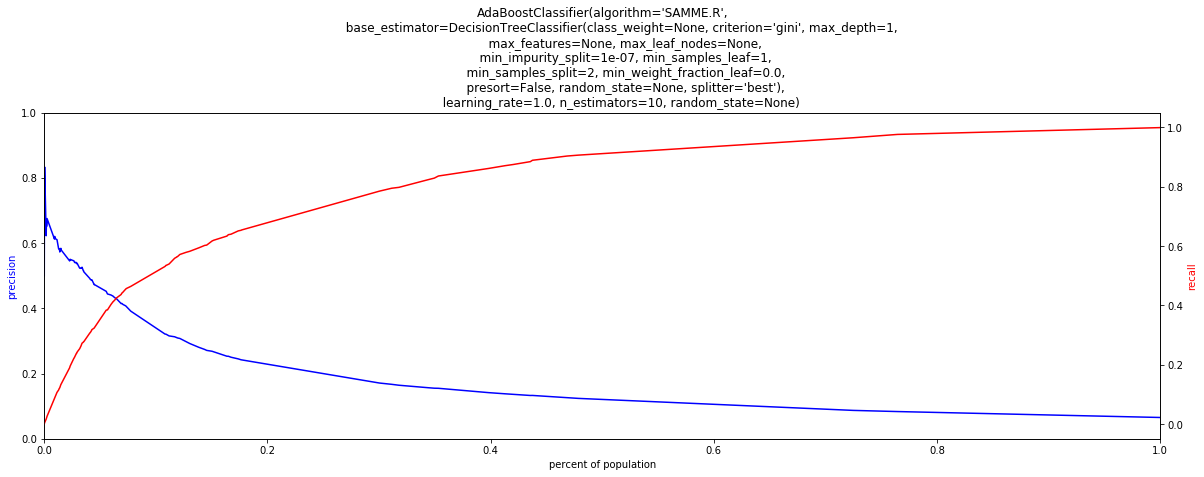

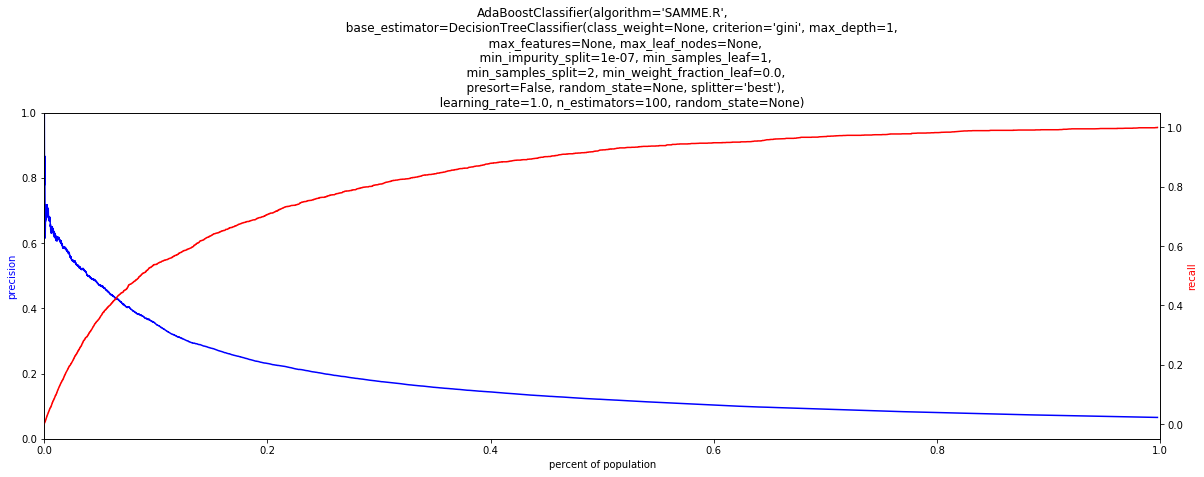

GB


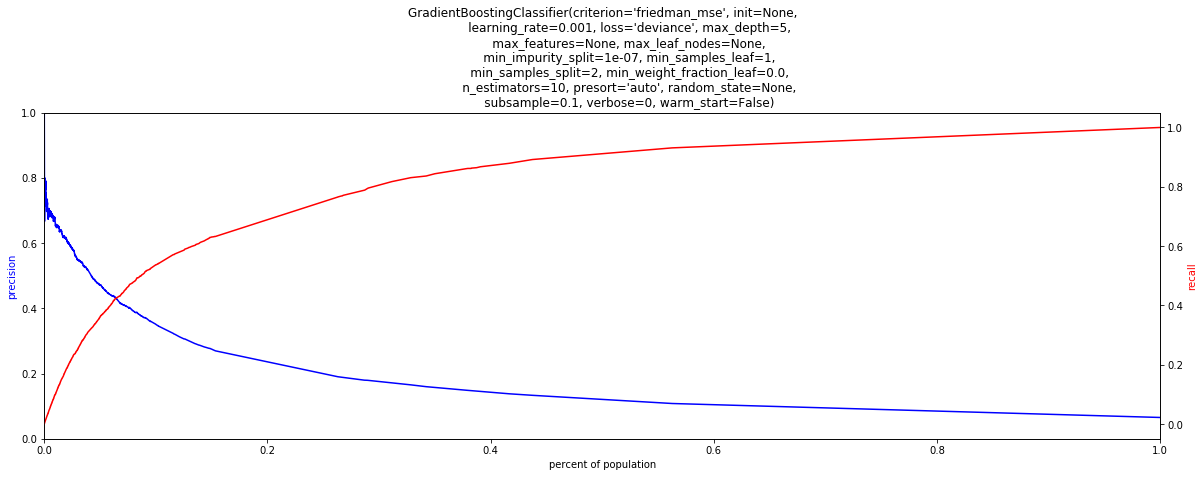

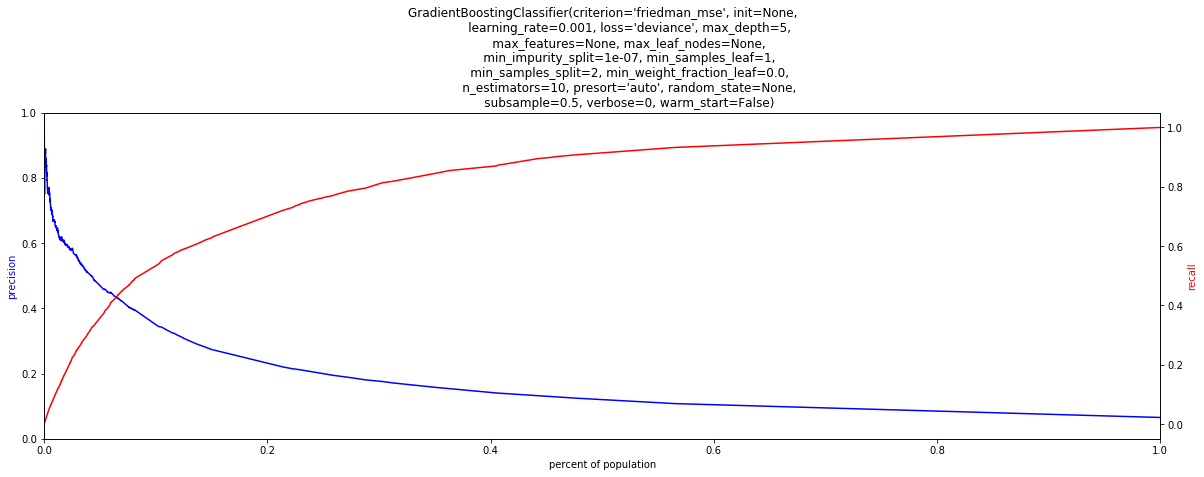

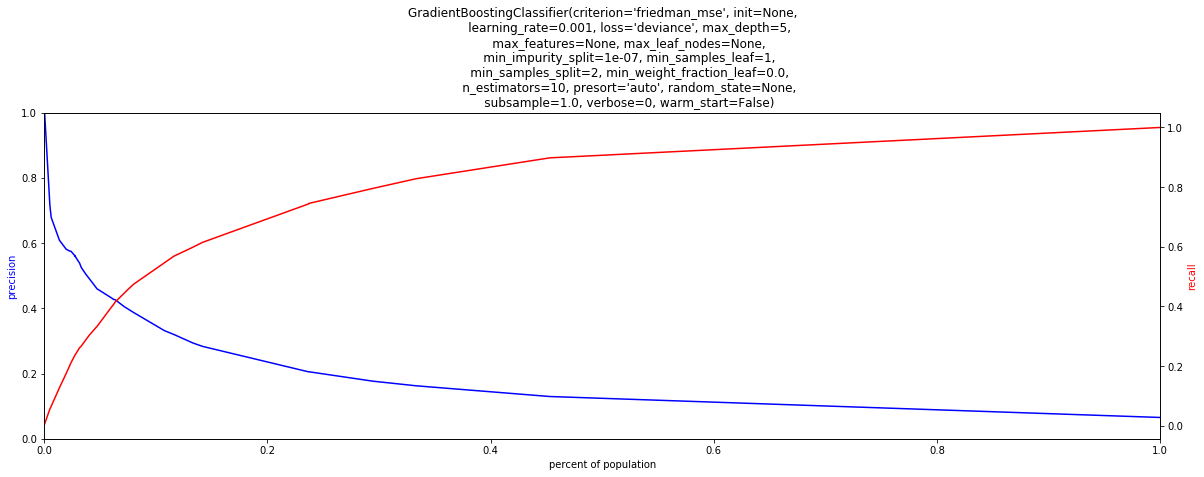

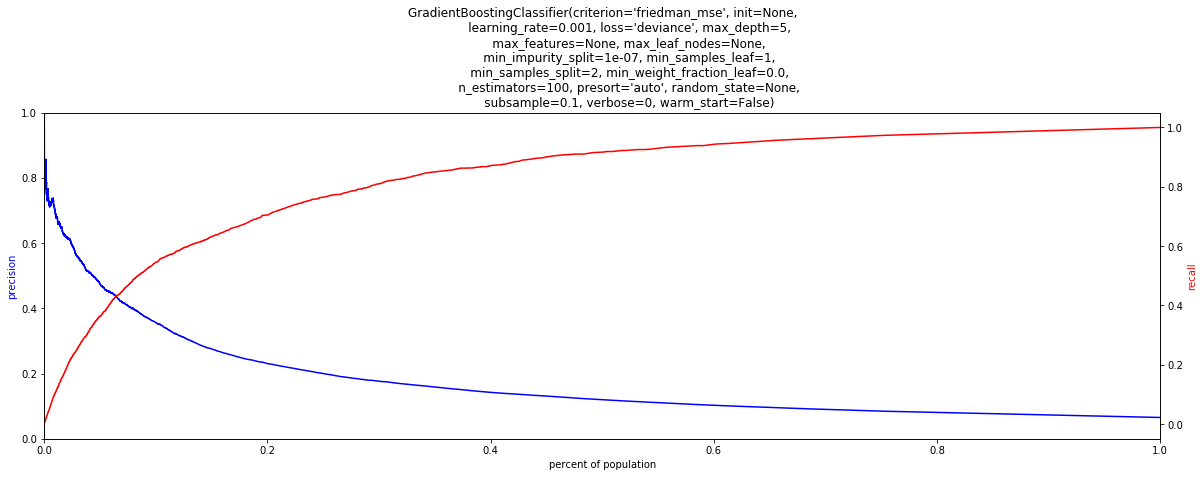

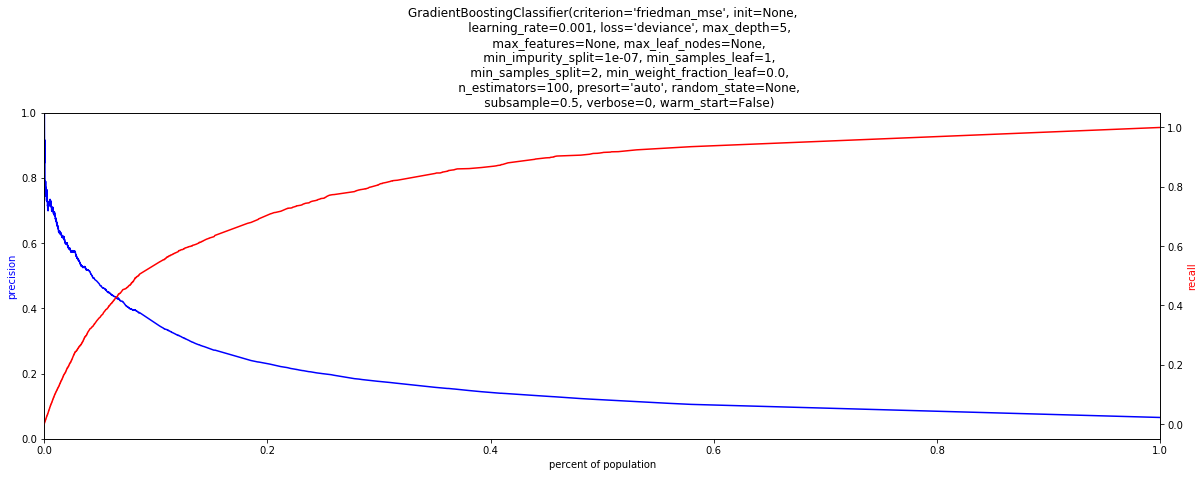

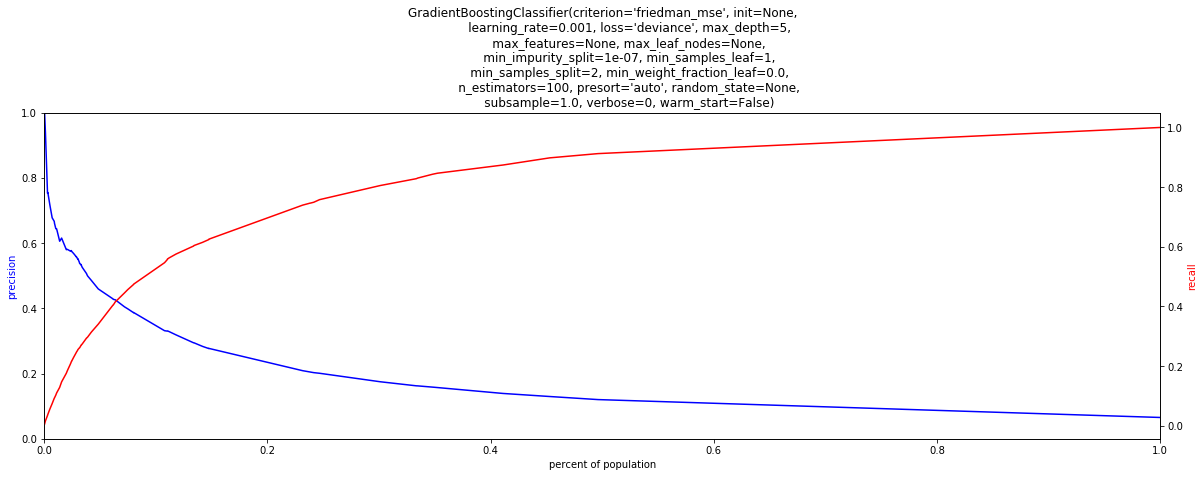

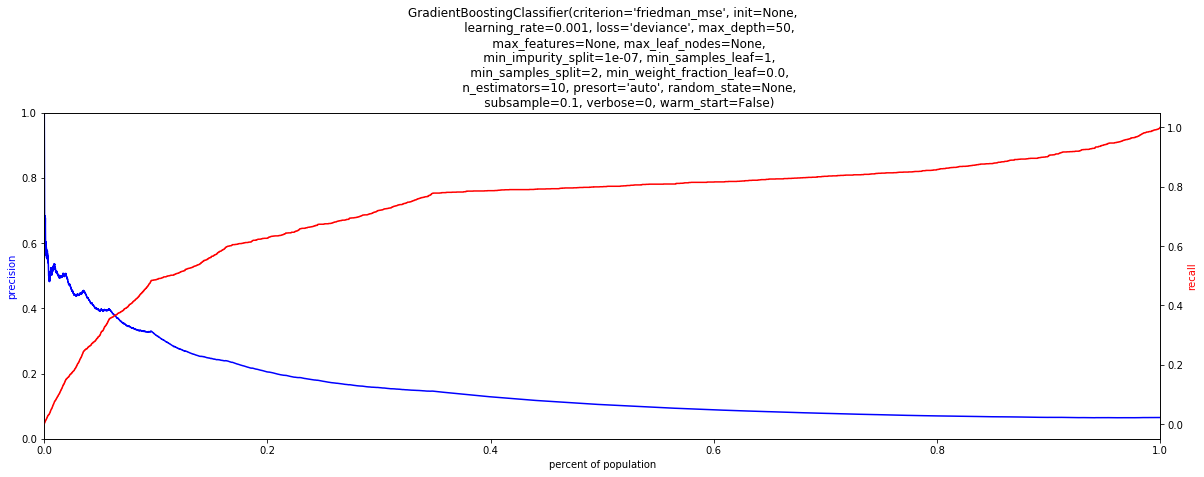

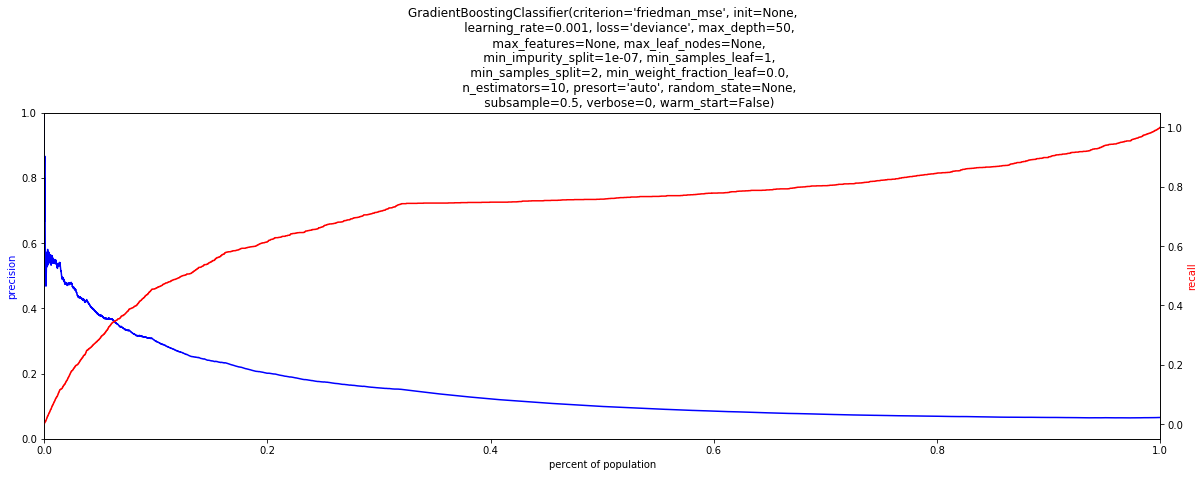

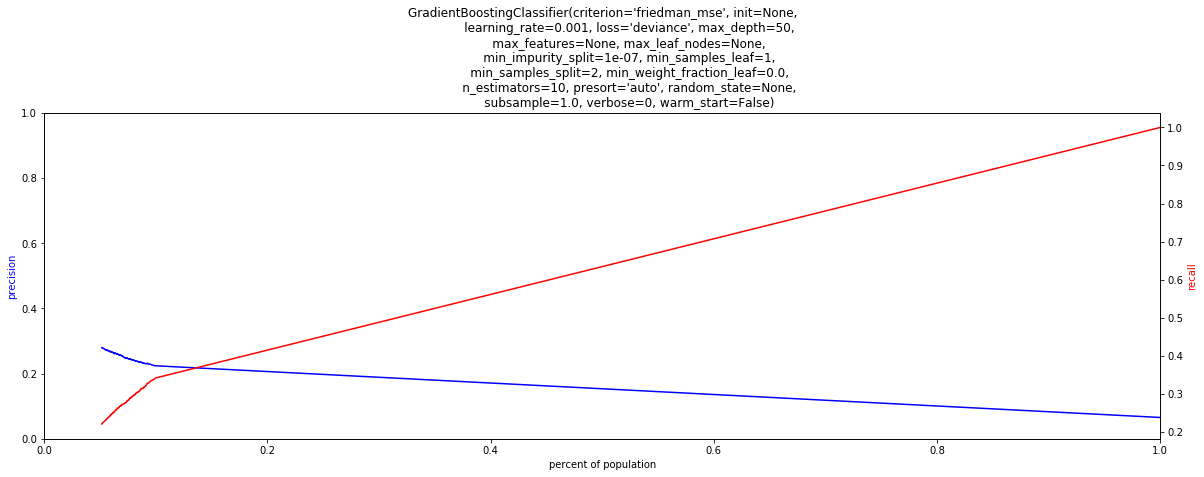

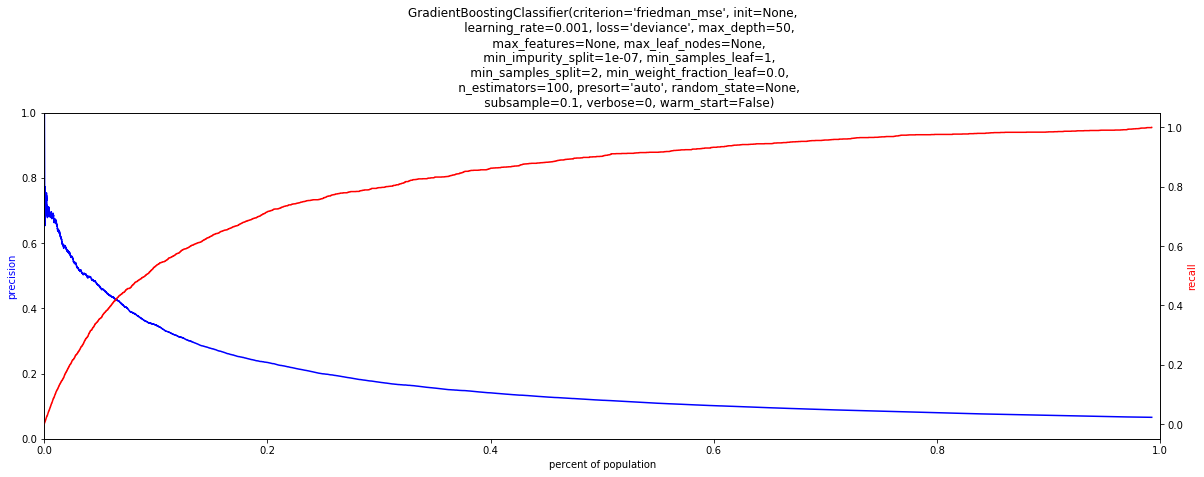

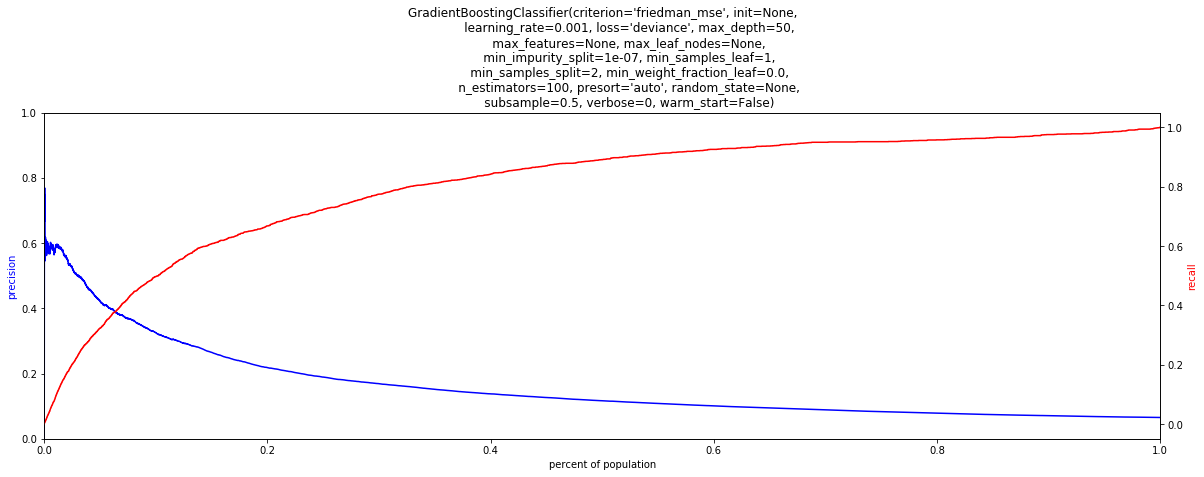

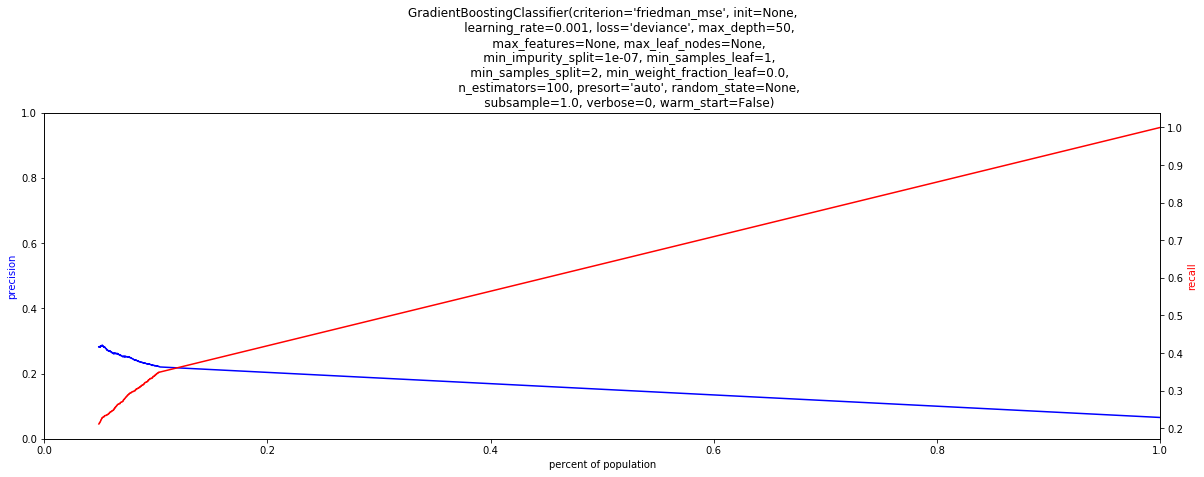

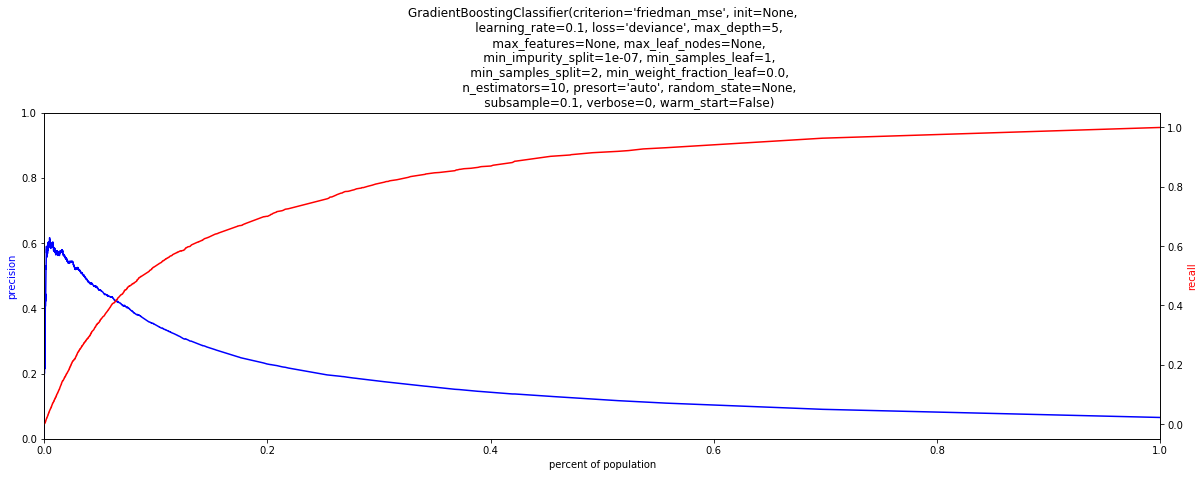

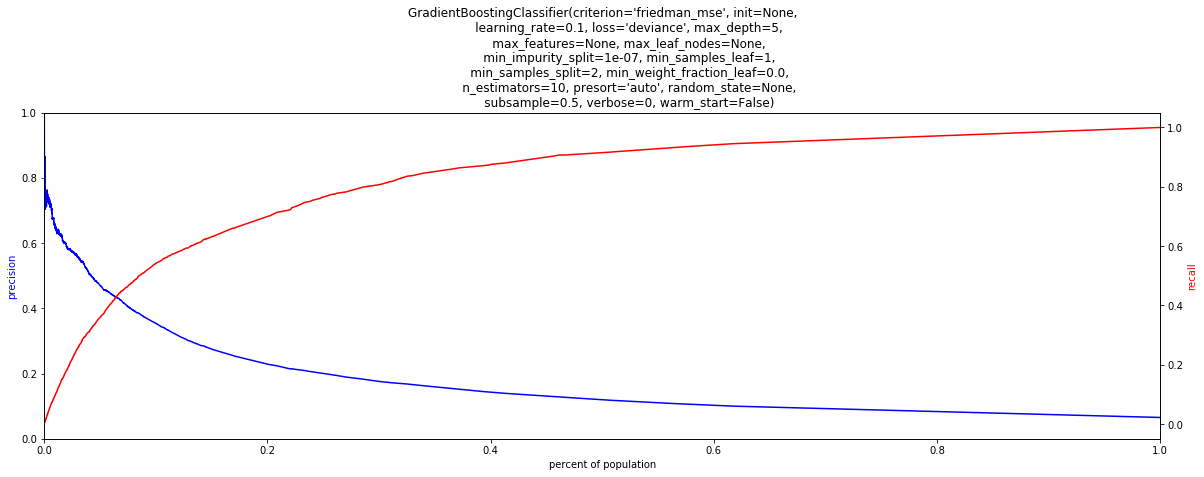

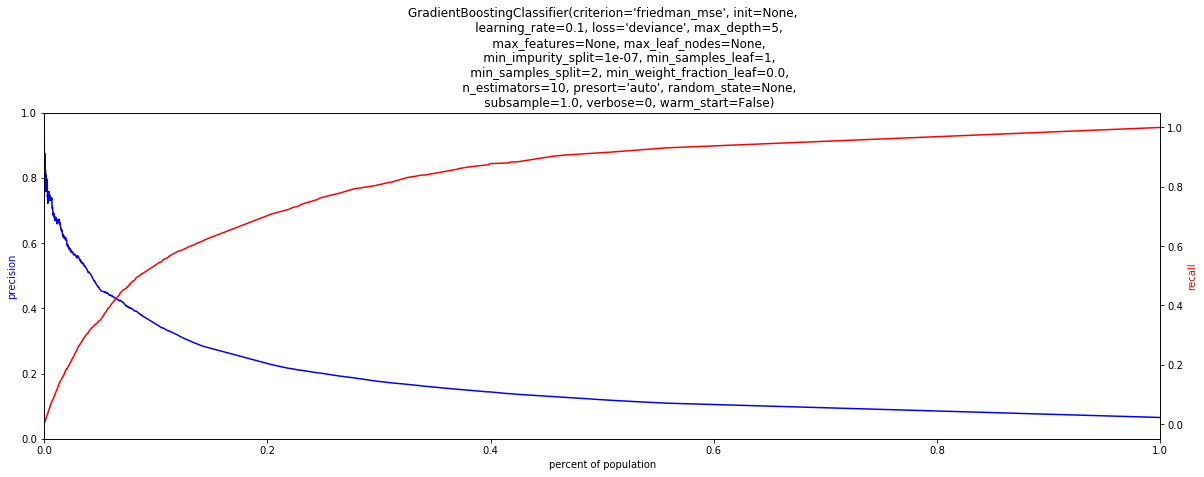

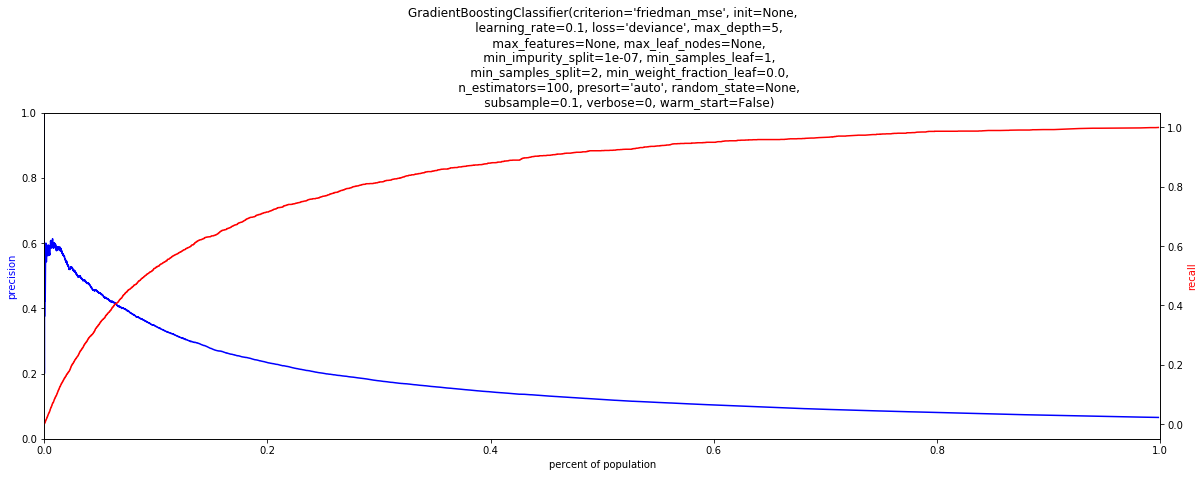

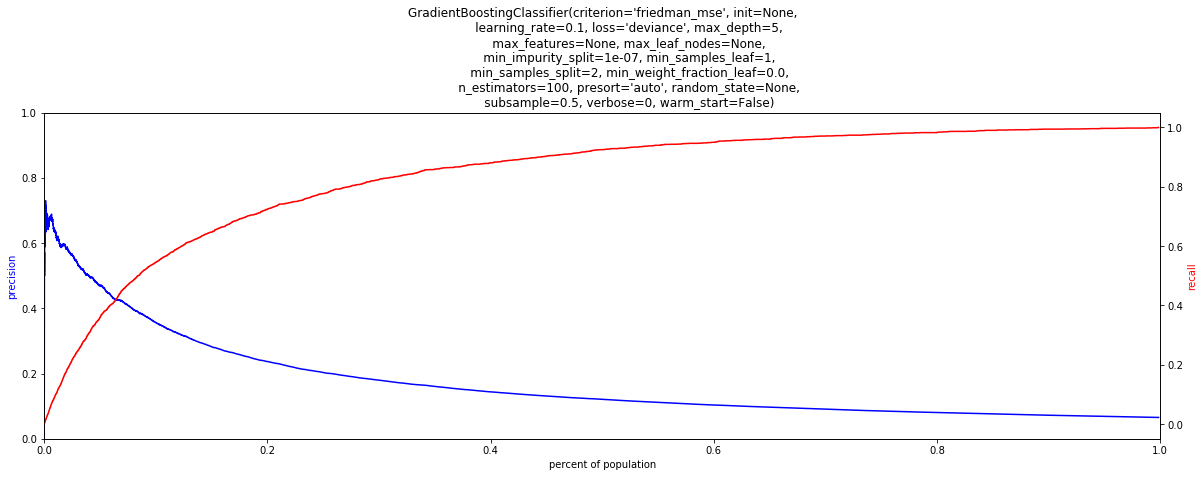

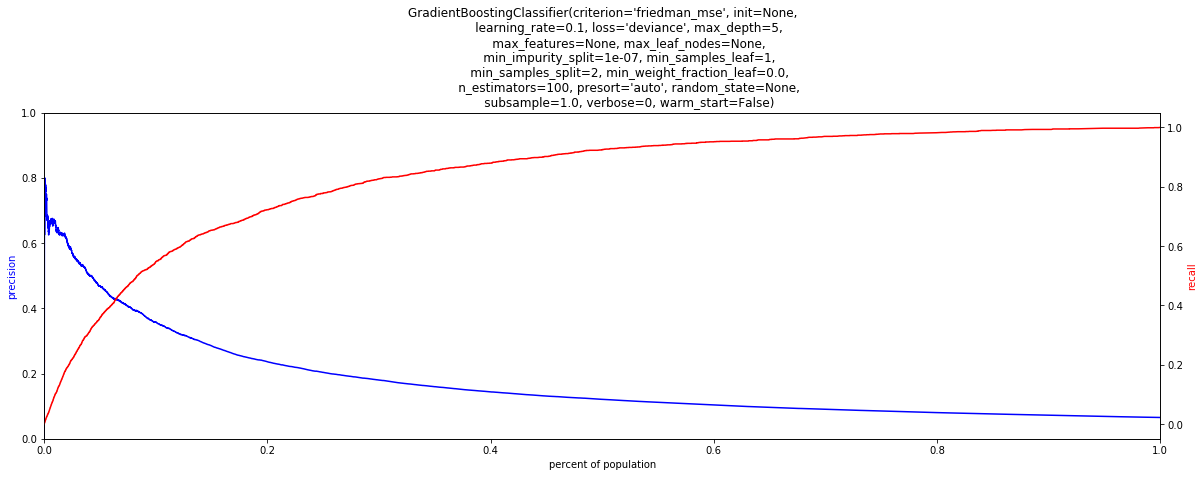

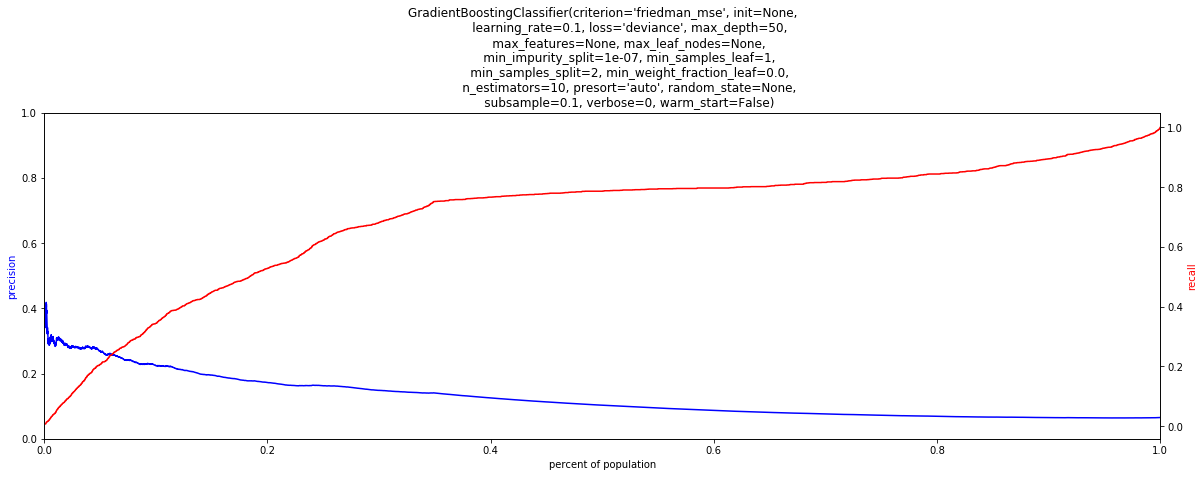

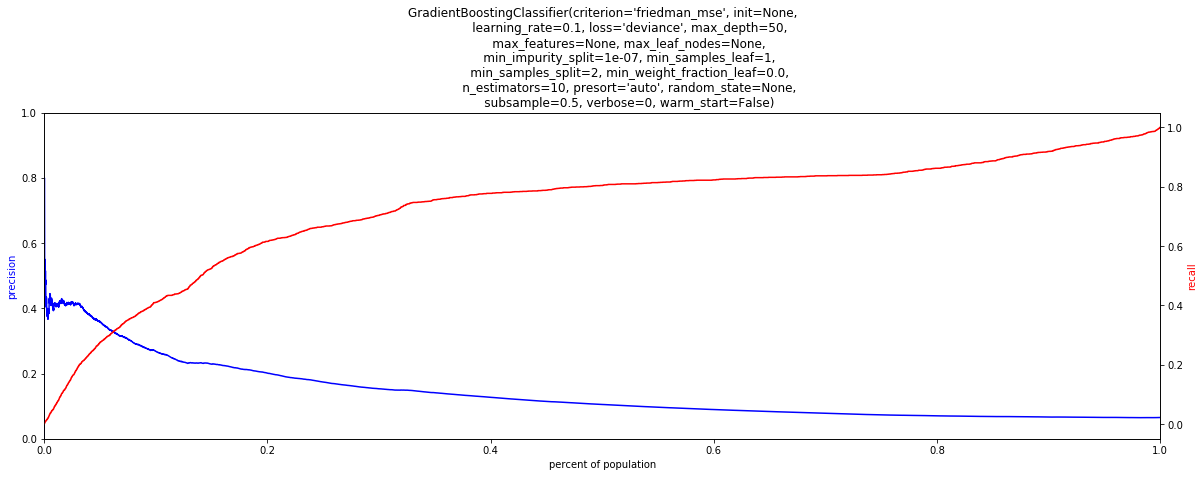

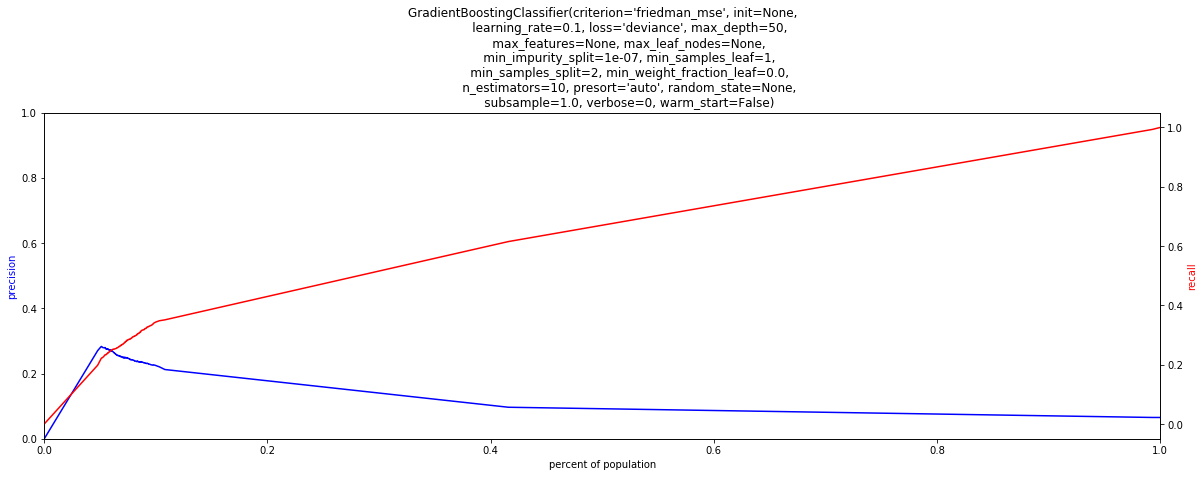

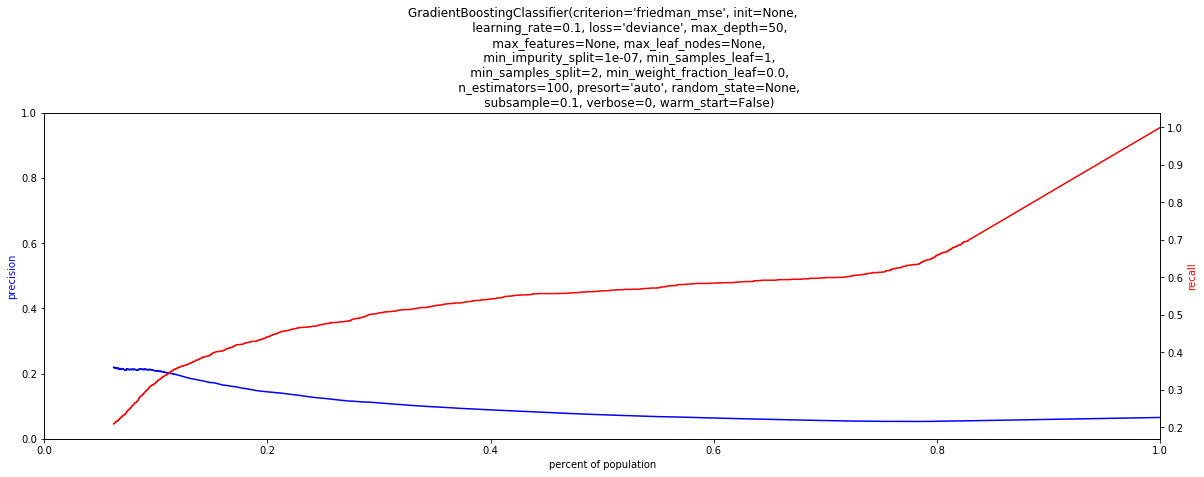

In [ ]:
#Ran for small random sample
start_time = time.time()
grid_size = 'medium'
clfs, grid = define_clfs_params(grid_size)
models_to_run=['RF','DT','KNN', 'ET', 'AB', 'GB', 'LR', 'NB']

result_df  = clf_loop(models_to_run, clfs, grid, X_train, X_test, y_train, y_test)
end_time = time.time()
total_time = end_time - start_time
print("Total time taken to run the models for medium undersampled data: ", total_time)


print("Best_classifier as per AUC: ", find_best_classifier_by_model(result_df, "AUC-ROC"))
print("Best_classifier as per Accuracy: ", find_best_classifier_by_model(result_df, "Accuracy"))

result_df.to_csv('results_medium_grid_undersample.csv', index=False)